# 핵심만 요약한 통계와 머신러닝 파이썬 코드북 - 조정임

# 1장. 탐색적 자료 분석

## 1-1. 공통

### 데이터불러오기

In [5]:
path = '/kaggle/input/adp-pythoncodebook1'

In [11]:
from pandas import read_csv
titanic = read_csv(path+'/1-1_titanic.csv')
print(titanic.head(2))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C  


In [12]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- 데이터 기본 정보 확인

In [13]:
print(titanic.info())
# feature 삭제
del_feat = ['PassengerId', 'Cabin']
titanic = titanic.drop(del_feat, axis = 1)

# 질적변수의 데이터 타입을 category 로 변경
qual = ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked']
quan = ['Age', 'SibSp', 'Parch', 'Fare']
for col in qual:
    titanic[col] = titanic[col].astype('category')
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass   

- 기술 통계

In [17]:
print(titanic.describe(include = 'all'))

        Survived  Pclass                 Name   Sex         Age       SibSp  \
count      891.0   891.0                  891   891  714.000000  891.000000   
unique       2.0     3.0                  891     2         NaN         NaN   
top          0.0     3.0  Abbing, Mr. Anthony  male         NaN         NaN   
freq       549.0   491.0                    1   577         NaN         NaN   
mean         NaN     NaN                  NaN   NaN   29.699118    0.523008   
std          NaN     NaN                  NaN   NaN   14.526497    1.102743   
min          NaN     NaN                  NaN   NaN    0.420000    0.000000   
25%          NaN     NaN                  NaN   NaN   20.125000    0.000000   
50%          NaN     NaN                  NaN   NaN   28.000000    0.000000   
75%          NaN     NaN                  NaN   NaN   38.000000    1.000000   
max          NaN     NaN                  NaN   NaN   80.000000    8.000000   

             Parch Ticket        Fare Embarked  
co

## 1-2. 질적변수

- 도수분포표, 상대도수분포표

In [19]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [20]:
from pandas import DataFrame
freq = DataFrame(titanic['Survived'].value_counts())
print(freq)

# 상대도수분포표 추가
freq['상대도수'] = freq['Survived'].apply(lambda x: x/freq['Survived'].sum())
freq = freq.rename(columns={'Survived':'도수'})
print(freq)

   Survived
0       549
1       342
    도수      상대도수
0  549  0.616162
1  342  0.383838


- 상관계수 : 스피어만 상관계수, 켄달의 타우

In [21]:
from scipy.stats import spearmanr, kendalltau
corr, p = spearmanr(titanic['Survived'], titanic['Pclass'])
print("스피어만 상관계수는 {:.3f}, p-value는 {:.3f}".format(corr, p))

corr, p = kendalltau(titanic['Survived'], titanic['Pclass'])
print("켄달타우 상관계수는 {:.3f}, p-value는 {:.3f}".format(corr, p))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


스피어만 상관계수는 -0.340, p-value는 0.000
켄달타우 상관계수는 -0.324, p-value는 0.000


- 질적변수 탐색 시각화

([<matplotlib.patches.Wedge at 0x7d27e8672a10>,
 [Text(-0.3925749350994583, 1.0275626113924428, '0'),
  Text(0.3925750313068116, -1.0275625746369201, '1')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.38%')])

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 47561 (\N{HANGUL SYLLABLE MAG}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  func(*arg

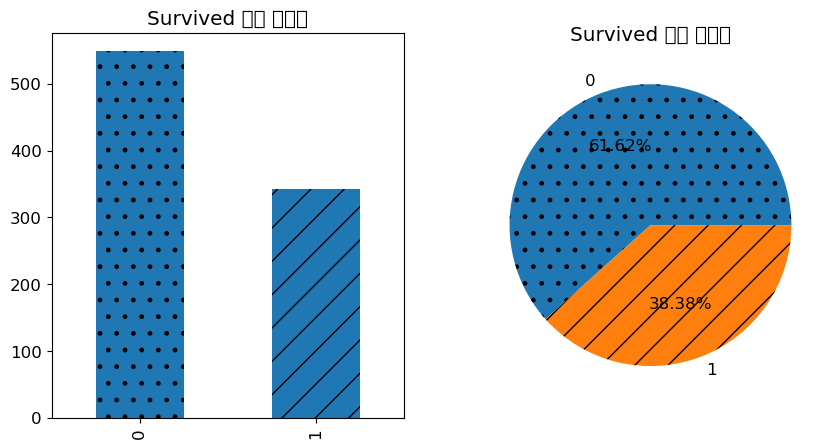

In [26]:
# plotting 환경 설정
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

# 막대 그래프
ax[0].set_title('Survived 막대 그래프')
freq['도수'].plot.bar(ax = ax[0], hatch = ['.', '/'])

# 파이그래프
ax[1].set_title('Survived 파이 그래프')
ax[1].pie(freq['도수'].values, labels = freq['도수'].index,
          autopct = '%.2f%%', hatch=['.','/'])


## 1-3. 양적변수

- 도수분포표, 상대도수분포표

In [ ]:
# 계급의 개수를 지정하여 도수분포표 생성
from pandas import cut
result1 = cut(titanic['Age'], bins = 5)
freq1 = DataFrame(result1. value_counts()).reset_index()
freq1 = freq1.rename(columns = {'index':'계급', 'Age':'도수'}).sort_values(by = '계급')
print(freq1)

In [ ]:
# 계급의 범위를 지정하여 도수분포표 생성
result2 = cut(titanic['Age'], bins = [0, 19, 39, 59, float('inf')])
freq2 = DataFrame(result2. value_counts()).reset_index()
freq2 = freq2.rename(columns = {'index':'계급', 'Age':'도수'}).sort_values(by = '계급')
print(freq2)

In [ ]:
# freq1의 상대 도수분포표 생성
freq1['상대도수'] = freq1['도수'].apply(lambda x:x / freq1['도수'].sum())
print(freq1)

- 계산적 대푯값
    - 산술평균(Arithmetic mean) : 주어진 수의 합을 개수로 나눔
    - 기하평균(Geometric mean) : 경제성장률 등 시간적으로 변화하는 비율의 대푯값
    - 조화평균(Harmonic mean) : 평균 속도 등 시간적으로 변화하는 속도의 대푯값
    - 절사평균(Trimmed mean) : 자료의 총 개수에서 일정비율 만큼 가장 큰 부분과 작은 부분을 제거한 후 산출한 평균
    - 평방평균(Quadratic mean) : 관측값을 제곱하여 산술평균을 구하고 제곱근을 취한 것으로 비정상적 관측치의 영향을 부각시킬 때 사용


In [ ]:
from scipy.stats.mstats import gmean, hmean, tmean
import numpy as np
print('Fare 산술평균: {:.2f}'.format(titanic['fare'].mean()))

example1 = [1.1, 1.3, 1.4,  1.5]
print('example1 기하평균: {:.2f}'.format(gmean(example1)))

example2 = [3, 6]
print('example2 조화평균: {:.2f}'.format(hmean(example1)))

example3 = [1, 3, 5, 9, 11, 1000]
print('example3 절사평균1: {:.2f}'.format(tmean(example3, (1, 100))))

limit_down = np.percentile(example3, 10)
limit_up = np.percentile(example3, 90)
print('example3 절사평균2: {:.2f}'.format(tmean(example3, (limit_down, limit_up))))

def QM(data):
    return np.sqrt(np.sum(np.array(data)**2))
example4 = [1,2,3,4,100]
example5 = [1, 2, 3, 4, 5]
print('example4 평방평균: {:.2f}'.format(QM(example4)))
print('example5 평방평균: {:.2f}'.format(QM(example5)))

- 위치적 대푯값

In [ ]:
import numpy as np
print('중위수: ', titanic['Fare'].median())
print('최빈값: ', titanic['Fare'].mode()[0])
print('1사분위수: ', titanic['Fare'].quantile(q=0.25))
print('2사분위수: ', titanic['Fare'].quantile(q=0.5)) # 중위수와 동일
print('3사분위수: ', titanic['Fare'].quantile(q=0.75))
print('10백분위수: ', np.percentile(titanic['Fare'], 10)) # 하위 10%

- 절대적 산포도

In [ ]:
print('범위: ', titanic['Fare'].max() - titanic['Fare'].min())

def IQR(data):
    return data.quantile(0.75) - data.quantile(0.25)
print('사분위범위: %.2f' %(IQR(titanic['Fare'])))

def MD(data):
    return np.mean(np.abs(np.array(data) - np.mean(data)))
print('평균편차: %.2f' %(MD(titanic['Fare'])))

print('사분편차: %.2f' %(IQR(titanic['Fare'])/2))

print('모분산: %.2f' %(titanic['Fare'].var(ddor = 0)))
print('표본분산: %.2f' %(titanic['Fare'].var(ddor = 1)))

print('모표준편차: %.2f' %(titanic['Fare'].std(ddor = 0)))
print('표본표준편차: %.2f' %(titanic['Fare'].std(ddor = 1)))

- 상대적 산포도
    - 사분위편차계수(CQD, Coefficient of Quartile deviation)
    - 평균편차계수(CMD, Coefficient of mean deviation)
    - 변동계수(CV, Coefficient of variance) : 자료 단위가 다르거나 평균 차이가 클 때 평균에 대한 표준편차의 상대적 크기를 비교하기 위해 사용함
        - 변동계수의 제곱은 상대분산

In [ ]:
print('사분위편차계수: %.2f' %(IQR(titanic['Fare'])/2/titanic['Fare'].median()))
print('평균편차계수: %.2f' %(MD(titanic['Fare'])/titanic['Fare'].mean()))
print('모집단 변동계수: %.2f' %(titanic['Fare'].std(ddof=0)/titanic['Fare'].mean()))
print('표본집단 변동계수: %.2f' %(titanic['Fare'].std(ddof=1)/titanic['Fare'].mean()))

- 왜도, 첨도

In [ ]:
# pandas
print('왜도 : %.3f, 첨도 : %.3f'%(titanic['Fare'].skew(), titanic['Fare'].kurt()))

#scipy
from scipy.stats import skew, kurtosis
ssF = skew(titanic['Fare'], bias = False)
skF = kurtosis(titanic['Fare'], bias = False)
ssT = skew(titanic['Fare'], bias = True)
skT = kurtosis(titanic['Fare'], bias = True)

print('왜도 : %.3f(%.3f), 첨도 : %.3f(%.3f)'%(ssF, ssT, skF, skT))

- 양적변수 탐색 시각화

In [ ]:
import stemgraphic
stemgraphic.stem_graphic(titanic['Age'])
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = 12, 4)
ax[0].hist(titanic['Age'])
ax[0].set_title('기본 히스토그램')

# bin number 설정
ax[1].hist(titanic['Age'], bins = 4)
ax[1].set_title('bins = 4 설정 히스토그램')

# bin edges 설정
ax[2].hist(titanic['Age'], bins = [i for i in range(0, 90, 10)])
ax[2].set_title('bins = 범위 설정 히스토그램')
plt.show()

In [ ]:
# 오자이브  : 누적도수 다각형의 각 계급 구간의 누적도수에 대응하는 기둥의 맨 위 중간점들을 직선으로 연결
# 함수 정의
def OGIVE(data, bins_option):
    from pandas import cut
    result1 = cut(data, bins = bins_option)
    freq1 = DataFrame(result1.value_counts()).reset_index().rename(columns = {'index':'계급', 'Age':'도수'}).sort_values(by = '계급')
    freq1['계급값'] = freq1['계급'].apply(lambda x:(x.left + x.right)/2)
    plt.plot(freq1['계급값'], freq1['누적도수'], marker = 'o')
    plt.xticks(freq1['계급값'])
    plt.ylabel('누적도수')
    plt.xlabel('계급값')
    plt.title('Ogive (bins: %s)' %bins_option)
    return freq1, plt.show()
freq.img = OGIVE(data = titanic['Age'], bins_option=5)

In [ ]:
# 상자그림
from matplotlib import pyplot as plt
titanic[['Age']].boxplot(vert = False, medianprops = {'color':'red'})
plt.title('Box plot')
plt.yticks(ticks=[1], labels = ['Age'])
plt.show()

In [ ]:
# 산점도
fig, ax = plt.subplots(1, 2, figsize = (8, 4))
plt.subplots_adjust(wspace = 0.3)

ax[0].scatter(titanic['Age'], titanic['Fare'])
ax[0].set_title('scatter plot (corr: %.2f, p: %.2f)') %(pearsonr(titanic['Age'], titanic['Fare']))
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Fare')

Xs = [1, 3, 5, 7, 9, 15, 20, 10]
Ys = [10, 20, 45, 76, 70, 100, 80, 90]
ax[1].scatter(Xs, Ys)
ax[1].set_title('scatter plot (corr: %.2f, p: %.2f)') %(pearsonr(Xs, Ys))
ax[1].set_xlabel('Xs')
ax[1].set_ylabel('Ys')

plot.show()

# 2장. 전처리

## 2-1. 결측치 처리

- 결측치 확인

In [ ]:
path = '/kaggle/input/pythondata'

In [ ]:
from pandas import read_csv
import numpy as np
wine = read_csv(path+'/2-1_wine.csv')
print("**원본데이터:\n", wine.isna().sum())

# 결측치가 없으므로 두 개의 컬럼 Alcolhol과 Ash에 임의로 결측치를 입력하기로 한다.
from numpy.random import randint
wine_m = wine.copy()

for col in ['Alcohol', 'Ash']:
    for i in range(20):
        random_idx = randint(0, len(wine), 1)
        wine_m.loc[random_idx, col] = np.nan

print("\n**결측치 생성 데이터:\n", wine_m.isna().sum())

In [ ]:
# plotting 환경 설정
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 5)
#plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(1, 2, figsize = (8, 4))
plt.subplots_adjust(wspace = 0.5)

import missingno as msno
msno.matrix(df = wine, figsize = (5,5), fontsize=12, ax=ax[0], sparkline=False)
ax[0].set_ylabel('원본 데이터')

msno.matrix(df = wine_m, figsize = (5,5), fontsize=12, ax=ax[1], sparkline=False)
ax[1].set_ylabel('결측치 생성 데이터')

plt.show()

- Zero imputation & Constant imputation

In [ ]:
# 대치 전 : wine_m
print(wine_m[['Alcohol', 'Ash']].head(10))

In [ ]:
# 0으로 대치 후 : wine_imp
wine_imp = wine_m.fillna(0)
print(wine_imp[['Alcohol', 'Ash']].head(10))

In [ ]:
# 1000으로 대치 후 : wine_imp
wine_imp = wine_m.fillna(1000)
print(wine_imp[['Alcohol', 'Ash']].head(10))

- 대표값으로 채우는 방법

In [ ]:
# 대표값으로 채우기 전 : wine_m
print(wine_m[['Alcohol', 'Ash']].head(10))

In [ ]:
# 대표값 mean으로 채운 후 : wine_imp1

from sklearn.impute import SimpleImputer
from pandas import DataFrame

# strategy = 'mean', 'median' or 'most_frequent'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
wine_imp1 = imputer.fit_transform(wine_m)
wine_imp1 = DataFrame(wine_imp1, columns = wine_m.columns)

Al_mean = wine_m['Alcohol'].mean()
As_mean = wine_m['Ash'].mean()

print('Alcohol mean:{:.5f}, Ash mean: {:.5f}'.format(Al_mean, As_mean))
print(wine_imp1[['Alcohol', 'Ash']].head(10))



-  단순확률대치법(Single stochastic imputation) : 유사한 데이터셋에서 랜덤하게 샘플링한 값으로 대치하는 방법
    - 1) Hot-deck : 현재 진행중인 연구에서 비슷한 성향을 갖는 데이터 중 랜덤 선택
    - 2) col-deck : 외부 출처, 혹은 이전의 비슷한 연구에서 대체할 자료를 가져옴

In [ ]:
# wine 데이터가 wine_m 데이터와 비슷한 성향을 가진 연구의 데이터라고 가정 -> hot-deck

# Hot-deck 대치 후 : wine_imp2
# Hot-deck 함수 정의
def HotDeck(data, reference):
    imp = data.copy()
    check = imp.isna().sum()
    for col, val in zip(check.index, check.values):
        if val == 0:
            continue
        else:
            imp[col] = imp[col].apply(lambda x:float(reference[col].sample(1).values) if str(x) == 'nan' else x)
    return imp

# wine 데이터가 wine_m 데이터와 비슷한 성향을 가진 데이터라고 가정 -> hot-deck
wine_imp2 = HotDeck(wine_m, wine)
wine_imp2.isna().sum()

- 다른 변수들로부터 모델링을 하여 결측값을 예측하는 방법
    - 대푯값 대치법보다 정확할 때가 많지만 전체 데이터를 메모리에 올려야 해서 메모리를 많이 요구하고 이상치에 민감함.
    - KNN 외에도 기타 회귀 및 분류 알고리즘을 통해 결측값을 예측하는 모델 활용가능

In [ ]:
# KNNImputer 대치 후: wine_imp3

from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3)
wine_imp3 = imputer.fit_transform(wine_m)
wine_imp3 = DataFrame(wine_imp3, columns = wine_m.columns)
wine_imp3.isna().sum()

- 보간법
     - 시계열 데이터와 같이 알려진 데이터 내에 있는 결측치를 대치할 때 사용
     - 선형 보간법, 이중 선형보간법, 포물설 보간법, 다항식(Polynomial) 보간법, 스플라인(Spline) 보간법이 있음

In [ ]:
# 선형보간법 후 : wine_imp4
wine_imp4 = wine_m.interpolate(method='linear')
wine_imp4.isna().sum()

- 실제값과 대치값의 비교

In [ ]:
# 결측치가 있는 행의 인덱스를 찾는 함수 정의
def find_missing_idx(data, column):
    return np.argwhere(np.array(data[[column]].isna().sum(axis=1)) > 0).ravel()

In [ ]:
# Alcohol freature 기준으로 대치값 비교
feature = 'Alcohol'
missing_idx = find_missing_idx(wine_m, feature)

report = DataFrame({'실제값': wine[feature], 'mean대치':wine_imp1[feature], 'Hotdeck': wine_imp2[feature],
                    'KNN대치': wine_imp3[feature], '선형보간': wine_imp4[feature]})

missing_report = report.iloc[missing_idx, :]
score_report = DataFrame(index = ['MAE', 'MSE'])

from sklearn.metrics import mean_absolute_error, mean_squared_error
for col in missing_report.columns:
    # MAE: 잔차의 절대값에 대한 평균
    mae = mean_squared_error(missing_report['실제값'],missing_report[col])
    # MSE: 잔차 제곱에 대한 평균
    mse = mean_squared_error(missing_report['실제값'],missing_report[col])
    score_report.loc['MAE', col] = mae
    score_report.loc['MSE', col] = mse
print(score_report)

In [ ]:
# Ash feature 기준으로 대치값 비교
feature = 'Ash'
missing_idx = find_missing_idx(wine_m, feature)
report = DataFrame({'실제값': wine[feature], 'mean대치':wine_imp1[feature], 'Hotdeck': wine_imp2[feature],
                    'KNN대치': wine_imp3[feature], '선형보간': wine_imp4[feature]})

missing_report = report.iloc[missing_idx, :]
score_report = DataFrame(index = ['MAE', 'MSE'])

from sklearn.metrics import mean_absolute_error, mean_squared_error
for col in missing_report.columns:
    # MAE: 잔차의 절대값에 대한 평균
    mae = mean_squared_error(missing_report['실제값'],missing_report[col])
    # MSE: 잔차 제곱에 대한 평균
    mse = mean_squared_error(missing_report['실제값'],missing_report[col])
    score_report.loc['MAE', col] = mae
    score_report.loc['MSE', col] = mse
print(score_report)

## 2-2. 이상치 처리
- 이상치 여부 진단
    - (1) ESD(Extreme studentized deviation): 평균-3x표준편차 < data < 평균+3x표준편차
    - (2) 기하평균-2.5x표준편차 < data < 기하평균+2.5x표준편차
    - (3) Q1-1.5xIQR < data < Q3+1.5xIQR
    - (4) 군집분석을 통한 이상치 진단 : DBSCAN 군집분석을 통해 -1로 분류되는 값을 이상치로 진단

- 절단

In [ ]:
# 이상치 절단 함수 정의
def del_outlier(df, columns, method = 'idr'):
    columns = np.array(columns).flatten().tolist()
    check_df = df.loc[:, columns]
    if method == 'iqr': # 이상치 판단 기준 - (3)번
        IQR = check_df.quantile(0.75) - check_df.quantile(0.25)
        top = check_df.quantile(0.75) + IQR * 1.5
        down = check_df.quantile(0.25) + IQR * 1.5
    elif method == 'esd': # 이상치 판단 기준 - (1)번
        std = check_df.std()
        mean = check_df.mean()
        top = mean + std * 3
        down = mean - std * 3
    prep_dfs = []
    for col in columns:
        out_id = check_df[(check_df[col] >= top[col]) | (check_df[col] <= down[col])][col].index
        check_df.drop(out_id, axis=0, inplace=True) # 이상치를 drop
        prep_dfs.append(check_df[[col]])
    if len(prep_dfs)==1:
        prep_dfs = prep_dfs[0]
    return prep_dfs

# 이상치 처리 전후 시각화 함수 정의
def before_after_boxplot(df1, df2, figsize=(10,5), fontsize=13):
    from matplotlib import pyplot as plt
    fig, axes = plt.subplots(1,2)
    plt.rcParams['figure.figsize'] = figsize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['axes.unicode_minus'] = False
    for data, ax, title in zip([df1, df2], axes, ['Before', 'After']):
        data.boxplot(ax=ax)
        ax.set_title("{} ({})".format(title, len(data)))
        margin = df1.std().values[0]/2
        ax.set_ylim(df1.min().values[0]-margin, df1.max().values[0]+margin)
    plt.show()

In [ ]:
prep_Alcal, prep_Ash = del_outlier(wine, ['Alcalinity_of_ash', 'Ash'], method = 'iqr')

# Alcalinity_of ash의 이상치 제거 전후
before = wine[['Alcalinity_of_ash']]
before_after_boxplot(before, prep_Alcal)

# Ash의 이상치 제거 전후
before = wine[['Ash']]
before_after_boxplot(before, prep_Ash)

# Ash의 두번째 이상치 제거 전후
before = prep_Ash
prep_Ash2 = del_outlier(prep_Ash, 'Ash')
before_after_boxplot(before, prep_Ash2)

- 조정

In [ ]:
# 이상치 조정 함수 정의
def win_outlier(df, columns, method = 'idr'):
    columns = np.array(columns).flatten().tolist()
    check_df = df.loc[:, columns]
    if method == 'iqr': # 이상치 판단 기준 - (3)번
        IQR = check_df.quantile(0.75) - check_df.quantile(0.25)
        top = check_df.quantile(0.75) + IQR * 1.5
        down = check_df.quantile(0.25) + IQR * 1.5
        print(down)
    elif method == 'esd': # 이상치 판단 기준 - (1)번
        std = check_df.std()
        mean = check_df.mean()
        top = mean + std * 3
        down = mean - std * 3
    print(down)
    for col in columns:
        check_df[col] = check_df[col].clip(down[col], top[col])
    return check_df


In [ ]:
preps = win_outlier(wine, ['Alcalinity_of_ash', 'Ash'])

# Alcalinity_of_ash의 이상치 조정 전후
before = wine[['Alcalinity_of_ash']]
before_after_boxplot(before, preps[['Alcalinity_of_ash']])

# Ash의 이상치 조정 전후
before = wine[['Ash']]
before_after_boxplot(before, preps[['Ash']])


- 클리핑

In [ ]:
# 이상치 클리핑 함수 정의
def clip_outlier(df, columns, downtop):
    columns = np.array(columns).flatten().tolist()
    check_df = df.loc[:, columns]
    for col, df in zip(columns, downtop):
        check_df[col] = check_df[col].clip(dt[0], df[1])
    return check_df

# 3장. 표본추출, 데이터 분할, 교차 검증

### 3-1. 표본추출

### 단순랜덤추출법
: 각 샘플에 번호를 부여하여 임의의 n개의 표본을 추출하는 방법

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
from pandas import DataFrame

data = load_iris()
iris_cols = list(data['feature_names']) + ['target']
iris = DataFrame(np.c_[data['data'], data['target']], columns=[col.replace(" (cm)", "") for col in iris_cols])
print(iris.head(3))

In [ ]:
import random
data_list = [1,2,3,4,5,'a','b','c']
random.sample(data_list, 4)

In [ ]:
np.random.choice(data_list, 4, replace=True) # replace는 복원추출 여부

In [ ]:
print("0~10 사이의 정수 중 3개의 난수 생성:", np.random.randint(0,10,3))
print("0~1 사이의 실수를 2*2 배열로 생성:\n", np.random.rand(2,2))

In [ ]:
# sample을 이용
print(iris.sample(n=3, replace=False))

In [ ]:
# frac 파라미터로 전체 데이터의 3%를 랜덤으로 추출할 수 있다.
print(iris.sample(frac=0.03))

In [ ]:
print(iris.sample(frac=0.03, weights='sepal length')) # sepal length에 가중치???

In [ ]:
print(iris.sample(3, axis=1).head(3))

### 계통추출법
: 매 n번째 샘플을 추출하는 방법

In [ ]:
def sys_sampling(data,n): # 모집단 데이터 프레임과 거기서 추출할 샘플 수 입력 필요
    N = len(data) # 모집단 요소 개수
    K = N//n # 구간 내 샘플 수
    index = data[:K].sample(1).index # 첫 구간에서 임의로 선택한 샘플 1개의 인덱스
    intoin = index-0 # 샘플 간 간격
    # index개씩 띄어서 각 구간에서 하나씩 샘플을 추출
    sys_df = DataFrame()
    while len(sys_df) < n:
        sys_df = sys_df.append(data.loc[index, :])
        index += K
    return sys_df

print(sys_sampling(iris, 8))

### 집락추출법
: 군집별로 단순랜덤추출법을 수행한 후, 모든 자료를 활용하거나 샘플링 하는 방법

### 층화추출법

In [ ]:
def strat_random_sampling(data, stratum, sampling_no, proportion=True):
    from pandas import DataFrame, concat
    if proportion == True: # 비례층화추출법: 원본 데이터 개수의 비율대로 추출
        levels = data[stratum].unique()
        total = data[stratum].value_counts().sum()
        prop_val = data[stratum].value_counts()/total
        no = prop_val * sampling_no
        result = DataFrame()
        for level in levels:
            temp_df = data[data[stratum]==level].sample(int(no[level]))
            result = concat([result, temp_df])
            
    else: # 불비례층화추출법: 임의로 정한 특정 비율대로 샘플링
        levels = list(proportion.keys())
        prop_val = np.array(list(proportion.values()))
        total = sum(prop_val)
        no = prop_val * sampling_no
        if total != 1 :
            raise Exception("proportion sum is supposed to be 1")
        else:
            result = DataFrame()
            for level in levels:
                temp_df = data[data[stratum]==level].sample(int(no[level]))
                result = concat([result, temp_df])
                
    return result

In [ ]:
# 원본 층별 데이터 개수 확인: 층별로 동일하게 50개씩 관측값을 갖는 데이터
iris['target'].value_counts()

In [ ]:
# 비례 층별 데이터 개수 확인: 층별로 동일하게 50개씩 관측값을 갖는 데이터
print(strat_random_sampling(iris, 'target', 9))

In [ ]:
# 비례 층별 데이터 개수 확인: 층별로 동일하게 50개씩 관측값을 갖는 데이터
print(strat_random_sampling(iris, 'target', 10, proportion={0:0.2, 1:0.5, 2:0.3}))

# 3-2. 데이터분할

### 일반적 데이터 분할 및 홀드아웃 방법
- 홀드아웃: 구축용과 시험용의 비율을 50:50으로 하는 것

In [ ]:
from sklearn.model_selection import train_test_split
X = iris.drop('target', axis=1)
y = iris.filter(['target'])

# 일반적 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("X_train(y_train): %d(%d), X_test(y_test): %d(%d)" %(len(X_train), len(y_train), len(X_test), len(y_test)))
print("X_train의 비율: %0.2f, X_test의 비율: %0.2f" %(len(X_train)/len(X), len(X_test)/len(X)), "\n")

# 홀드아웃 방법
# 일반적 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
print("X_train(y_train): %d(%d), X_test(y_test): %d(%d)" %(len(X_train), len(y_train), len(X_test), len(y_test)))
print("X_train의 비율: %0.2f, X_test의 비율: %0.2f" %(len(X_train)/len(X), len(X_test)/len(X)))

### Bootstrap
: 원본 데이터에서 학습 및 시험용 데이터를 랜덤 복원 추출하는 방법

In [ ]:
from collections import Counter

In [ ]:
def Bootstrap(X, y, test_size=0.3):
    train_size = 1-test_size
    train_X = X.sample(frac = train_size)
    sampled_train_id = train_X.index
    sampled_test_id = X.drop(train_X.index, axis=0).index
    train_y = y.iloc[sampled_train_id, :]
    test_X, test_y = X.iloc[sampled_test_id, :], y.iloc[sampled_test_id, :]
    return train_X, test_X, train_y, test_y

for i in range(3):
    X_train, X_test, y_train, y_test = Bootstrap(X,y)
    print(f"Sample {i} ==> train_index: {X_train.index[:3]}, test_index: {X_test.index[:3]}")
    print("\tX_train의 비율: %0.2f, X_test의 비율: %0.2f" %
         (len(X_train)/len(X), len(X_test)/len(X)))
    print("\ty_train의 타겟 구성:", Counter(y_train['target']))
    print("\ty_test의 타겟 구성:", Counter(y_test['target']), '\n')

### Shuffle Split
: 무작위 순열교차검증에 사용

In [ ]:
! pip install Counter

In [ ]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=3)
for i, (train_index, test_index) in enumerate(ss.split(X)):
    print(f"Sample {i} ==> train_index: {train_index[:3]}, test_index:{test_index[:3]}")
    X_train, X_test, y_train, y_test = X.iloc[train_index, :], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    print("\ty_train의 타겟 구성:", Counter(y_train['target']))
    print("\ty_test의 타겟 구성:", Counter(y_test['target']), "\n")

### K-fold 분할

In [ ]:
from sklearn.model_selection import KFold
from collections import Counter
# n_splits=fold 개수, shuffle=데이터 분할 전 shuffle 여부
kf = KFold(n_splits=4, shuffle=False)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Sample {i} ==> train_index: {train_index[:3]}, test_index: {test_index[:3]}")
    X_train, X_test, y_train, y_test = X.iloc[train_index, :], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    print("\tX_train의 비율: %0.2f , X_test의 비율: %0.2f" %
         (len(X_train)/len(X), len(X_test)/len(X)))
    print("\ty_train의 타겟 구성:", Counter(y_train['target']))
    print("\ty_test의 타겟 구성:", Counter(y_test['target']), "\n")

### Stratified K-fold 분할

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4)
# 분할 시 y를 고려해야 하기 때문에 split에 y를 입력해 주어야 한다.
for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    print(f"sample {i} ==> train_index: {train_index[:3]}, test_index:{test_index[:3]}")
    X_train, X_test, y_train, y_test = X.iloc[train_index, :],X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    print("\tX_train의 비율: %0.2f , X_test의 비율: %0.2f" %
         (len(X_train)/len(X), len(X_test)/len(X)))
    print("\ty_train의 타겟 구성:", Counter(y_train['target']))
    print("\ty_test의 타겟 구성:", Counter(y_test['target']), "\n")

### Group K-fold 분할

In [ ]:
# group이 있는 데이터를 생성한다.
## group은 0,1,2,3의 4종류가 있다.
iris2 = iris.copy()
iris2['group']=iris2['target'].apply(lambda x: int(np.random.randint(0,4,1)))
print(iris2.head(3))

In [ ]:
from sklearn.model_selection import GroupKFold
X = iris2.drop(['target', 'group'], axis=1)
y = iris2.filter(['target'])
group = iris2.filter(['group'])
gkf = GroupKFold(n_splits=4)
for i, (train_index, test_index) in enumerate(gkf.split(X,y,group)):
    print(f"Sample {i} ==> train_index: {train_index[:3]}, test_index:{test_index[:3]}")
    X_train, X_test, y_train, y_test = X.iloc[train_index, :], X.iloc[test_index], y.iloc[train_index], y.loc[test_index]
    print("\tX_train의 비율: %0.2f, X_test의 비율: %0.2f" %
         (len(X_train)/len(X), len(X_test)/len(X)))
    print("\ttrain의 타겟 구성:", Counter(y_train['target']))
    print("\ttest의 타겟 구성:", Counter(y_test['target']), "\n")
    print("\ttrain의 그룹 구성:", Counter(group.iloc[train_index]['group']))
    print("\ttest의 그룹 구성:", Counter(group.iloc[test_index]['group']))

## 3-3. 교차 검증

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression

X = iris.drop('target', axis=1)
y = iris['target']

# 학습에 사용할 알고리즘을 정의한다.
LOGREG = LogisticRegression(max_iter=300, C=0.1)

# 샘플 분할 방법을 정의한다. 숫자만 입력하여 KFold를 진행할 수도 있다.
SKF = StratifiedKFold(n_splits=4)

# 분할 샘플들로 교차 검증한다.
result = cross_validate(LOGREG, X, y, cv=SKF, return_train_score=True)
print(DataFrame(result))

#### 파라미터 후보들로 교차 검증

In [ ]:
from sklearn.model_selection import GridSearchCV

# 학습에 사용할 알고리즘을 정의한다.
LOGREG = LogisticRegression(max_iter=300)

# 학습에 사용할 알고리즘의 파라미터 후보군을 정의한다.
param_grid={'C': [0.01, 0.1, 1], 'solver':['lbfgs', 'liblinear']}

# 샘플 분할 방법을 정의한다. 숫자만 입력하여 KFold를 진행할 수도 있다.
SKF=StratifiedKFold(n_splits=2)

grid = GridSearchCV(LOGREG, param_grid, cv=SKF)
grid.fit(X,y)

print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))
print("최상의 매개변수: {}".format(grid.best_params_))
print(DataFrame(grid.cv_results_))

# 4장. 확률분포

## 4-1. 특수한 이산형 확률분포들

### 베르누이 분포
- 동등한 실험조건 하에서 실험 겨로가가 단지 두 가지의 가능한 결과만을 가질 때

In [ ]:
# 베르누이 분포
# 기대값과 분산 계획하기
p= 0.3 # 성공할 확률
q = 1-p # 실패할 확률
E = p # 기대값
V = p*q # 분산
print('[수기] 해당 분포의 기대값은 {:.3f}, 분산은 {:.3f}'.format(E,V))

from scipy.stats import bernoulli
E,V = bernoulli.stats(p)
print('[라이브러리] 해당 분포의 기대값은 {:.3f}, 분산은 {:.3f}'.format(E,V))

### 이항분포
- 어떤 실험에서 성공의 확률이 p인 베르누이 시행을 독립적으로 n번 반복 시행했을 때, <br>
성공의 횟수를 X라 하면 확률변수 X는 시행횟수 n과 성공의 확률 p를 모수로 갖는 이항분포를 갖는다

In [ ]:
# 이항분포
from scipy.stats import binom
import numpy as np
# combination 함수 정의하기
from numpy import math
fac = math.factorial
def combi(a,b):
    result = fac(a)/fac(b)/fac(a-b)
    return result

# 근로자가 내년에 회사에서 일하지 않을 확률이 0.1이라고 추정한 경우,
# 시간제 근로자 3명을 무작위로 뽑았을 때 그 중 한명이 금년에 회사를 떠날 확률은?
n = 3 # 근로자 샘플 개수
x = 1 # 떠날 샘플 개수 ** 확률변수 X
p = 0.1 # 떠날 확률

# 기대값과 분산 계산하기
E = n*p
V = n*p*(1-p)
print("[수기] 해당 분포의 기대값은 {:.3f}, 분산은 {:.3f}".format(E,V))
E2,V2 = binom.stats(n,p)
print("[라이브러리] 해당 분포의 기대값은 {:.3f}, 분산은 {:.3f}".format(E2, V2), '\n')

# 확률질량함수 계산하기
pmf = combi(n,x) * p**x * (1-p)**(n-x)
print("[수기] 해당 분포의 확률질량함수(pmf): %.3f}"%(pmf))
print("[라이브러리] 해당 분포의 확률질량함수(pmf):}", binom.pmf(x,n,p), '\n')

# 누적확률질량함수 계산하기: 1명 이하로 떠날 확률은?
cdf=0
for i in range(0, x+1): # 확률변수의 확률값들을 합합
    cdf += binom.pmf(i,n,p)
print("[수기] 해당 분포의 누적확률질량함수(cdf):", cdf)
print("[라이브러리] 해당 분포의 누적확률질량함수(cdf)", binom.cdf(x,n,p))

In [ ]:
# 이항분포의 정규분포 근사
from scipy.stats import norm
x=10
n=30
p=0.5

b_result = binom.pmf(x, n, p)
E = n*p
sigma = np.sqrt(E*(1-p))
zstat1 = (x-0.5-E)/sigma # 이항분포의 x에서 -0.5
zstat2 = (x+0.5-E)/sigma # 이항분포의 x에서 +0.5
n_result = norm.cdf(zstat2) - norm.cdf(zstat1)

print("이항분포로 계산하면 {:.3f} 정규분포로 계산하면 {:.3f}".format(b_result, n_result))
# 결과값이 근사한 것을 볼 수 있다.

# 이항분포의 포아송분포 근사
from scipy.stats import poisson
x=10
n=100
p=0.05
E=n*p

b_result=binom.pmf(x,n,p)
p_result=poisson.pmf(x,E)
print("이항분포로 계산하면 {:.3f} 포아송분포로 근사계산하면 {:.3f}".format(b_result, p_result))
# 결과값이 근사한 것을 볼 수 있다.

### 음이항분포
- 성공의 확률이 p인 베르누이 시행을 독립적으로 반복 시행할 때<br>
k번 성공할 때 까지의 시행횟수를 확률변수 x로 하는경우와 성공할 때까지의 실패횟수를 확률변수 x로 하는 경우 

In [ ]:
# 음이항분포
# A가 승리할 확률이 0.3이라면 5번째 경기에서 2번쨰로 이길 확률은?
from scipy.stats import nbinom

# combination 함수 정의하기
from numpy import math
fac = math.factorial
def combi(a,b):
    result = fac(a)/fac(b)/fac(a-b)
    return result

n = 5 # 총 시행횟수
k = 2 # 총 성공횟수
p = 0.3 # 성공확률
q = 1-p # 실패확률

case = 2
if case ==1: # 확률변수 X가 k번 성공할 때까지의 시행횟수 x인 경우
    x=n #** 확률변수
    E=k/p
    V=k*q / p**2
    pmf = combi(x-1, k-1) * p**k * q ** (x-k)
    E2, V2 = np.nan, np.nan ## 라이브러리 지원 안함
    pkg_pmf, pkg_cdf = np.nan, np.nan ## 라이브러리 지원 안함
    cdf=0
    for i in range(k, x+1): # 확률변수의 확률값들을 합함
        cdf += combi(i-1, k-1) * p**k * q**(i-k)
        
elif case ==2: # 확률변수 X가 k번 성공할 때까지의 실패횟수 x인 경우
    x = n-k # **확률변수
    E = k*q / p
    V = k*q / p**2
    pmf = combi(x+k-1, k-1) * p**k * q**(x)
    E2, V2 = nbinom.stats(k, p)
    pkg_pmf, pkg_cdf = nbinom.pmf(x, k, p), nbinom.cdf(x, k, p)
    cdf = 0
    for i in range(0, x+1): # 확률변수의 확률값들을 합함
        cdf += nbinom.pmf(i,k,p)
        
# 기대값과 분산 계산하기
print("[수기] 해당 분포의 기대값은 {:.3f}, 분산은 {:.3f}".format(E, V))
print("[라이브러리] 해당 분포의 기대값은 {:.3f}, 분산은 {:.3f}".format(E2, V2), '\n')

# 확률질량함수 계산하기
print("[수기] 확률질량함수(pmf):", pmf)
print("[라이브러리] 확률질량함수(pmf):", pkg_pmf, '\n')

# 누적확률질량함수 계산하기 : 2번째 이하로 이길 확률은?
print("[수기] 누적확률질량함수(cdf):", cdf)
print("[라이브러리] 누적확률질량함수(cdf):", pkg_cdf, '\n')


### 기하분포

In [ ]:
# 기하분포
# 하나의 주사위를 세번 던질 때 세번쨰 시행에서 앞면 숫자가 6이 나올 확률은?
from scipy.stats import geom
n = 3 # 총 시행횟수
p = 1/6 # 성공확률
q = 1-p # 실패확률

case = 1
if case ==1: # 확률변수 X가 처음으로 성공할 때까지의 시행횟수 x인 경우
    x = n # ** 확률변수
    E = 1 / p
    V = q / p**2
    pmf = q**(x-1) * p
    E2, V2 = geom.stats(p, moments='mv') # mean, variance
    pkg_pmf, pkg_cdf = geom.pmf(x,p), geom.cdf(x,p)
    cdf = 0
    for i in range(1, x+1): # 확률변수의 확률값들을 합함
        cdf += q**(i-1) * p
        
elif case ==2: # 확률변수 X가 처음으로 성공할 때까지의 실패횟수 x인 경우
    x = n - 1 # ** 확률변수
    E = q / p
    V = q / p**2
    pmf = q**x * p
    E2, V2 = np.nan, np.nan ## 라이브러리 지원 안함
    pkg_pmf, pkg_cdf, = np.nan, np.nan ## 라이브러리 지원 안함
    cdf = 0
    for i in range(0, x+1): # 확률변수의 확률값들을 합함
        cdf += q**i * p
        
# 기대값과 분산 계산하기
print("[수기] 해당 분포의 기대값은 {:.3f}, 분산은 {:.3f}".format(E, V))
print("[라이브러리] 해당 분포의 기대값은 {:.3f}, 분산은 {:.3f}".format(E2, V2), '\n')

# 확률질량함수 계산하기
print("[수기] 확률질량함수(pmf):", pmf)
print("[라이브러리] 확률질량함수(pmf):", pkg_pmf, '\n')

# 누적확률질량함수 계산하기 : 2번째 이하로 이길 확률은?
print("[수기] 누적확률질량함수(cdf):", cdf)
print("[라이브러리] 누적확률질량함수(cdf):", pkg_cdf, '\n')



### 초기하분포

In [ ]:
# 초기하분포
from scipy.stats import hypergeom
# combination 함수 정의하기
from numpy import math
fac = math.factorial
def combi(a, b):
    result = fac(a)/fac(b)/fac(a-b)
    return result

# 상자속에 빨간 공이 90개 파란 공이 10개 들어 있다. 임의로 1개씩 두 번 꺼내고 다시 넣지 않을 때
# 1개가 파란 공이 될 확률은?
N=100
k=10
n=2
x=1
P=k/N

# 기대값과 분산 계산하기
E = n*P
V = n*P*(1-P)*((N-n)/(N-1))
print("[수기] 해당 분포의 기대값은 {:.3f}, 분산은 {:.3f}".format(E, V))
E2, V2 = hypergeom.stats(N, k, n)
print("[라이브러리] 해당 분포의 기대값은 {:.3f}, 분산은 {:.3f}".format(E2, V2), '\n')

# 확률질량함수 계산하기
pmf = combi(k,x)*combi(N-k, n-x)/combi(N,n)
print("[수기] 확률질량함수(pmf): %.3f" %(pmf))
print("[라이브러리] 확률질량함수(pmf): %.3f" %(hypergeom.pmf(x,N,k,n)), '\n')

# 누적확률질량함수 계산하기 : 파란공을 1개 이하로 선택할 확률은?
cdf=0
for i in range(0,x+1): # 확률변수의 확률값들을 합함
    cdf += hypergeom.pmf(i,N,k,n)
print("[수기] 누적확률질량함수(cdf): %.3f" %cdf)
print("[라이브러리] 누적확률질량함수(cdf): %.3f" %(hypergeom.pmf(x,N,k,n)))


# 초기하 분포의 이항분포근사
from scipy.stats import norm
b_result = binom.pmf(x,n,k/N)
h_result = hypergeom.pmf(x,N,k,n)
print("초기하분포로 계산하면 {:.3f} 이항분포로 근사계산하면 {:.3f}".format(h_result, b_result))

### 포아송분포

In [ ]:
# 포아송분포
from scipy.stats import poisson

# 주말 저녁 시간 당 평균 6명이 응급실 올 경우, 어떤 주말 저녁 30분 내 4명이 도착할 확률은?
x = 4 # 구간 내 사건 횟수 ** 확률변수
lam = 3 # 구간 내 평균(=lambda)

# 기대값과 분산 계산하기
E = lam
V = lam
print("[수기] 해당 분포의 기대값은 {:.3f}, 분산은 {:.3f}".format(E, V))
E2, V2 = poisson.stats(lam, moments='mv')
print("[라이브러리] 해당 분포의 기대값은 {:.3f}, 분산은 {:.3f}".format(E2, V2), '\n')

# 확률질량함수 계산하기
pmf = lam**x * np.exp(-lam)/np.math.factorial(x)
print("[수기] 해당 분포의 확률질량함수(pmf): %.3f" %(pmf))
print("[라이브러리] 해당 분포의 확률질량함수(pmf): %.3f" %(poisson.pmf(x, lam)), '\n')

# 누적확률질량함수 계산하기: 4명 이하로 도착할 확률은?
cdf = 0
for i in range(0, x+1): # 확률변수의 확률값들을 합함
    cdf += poisson.pmf(i, lam)
print("[수기] 해당 분포의 누적확률질량함수(cdf): %.3f" %cdf)
print("[라이브러리] 해당 분포의 누적확률질량함수(cdf): %.3f" %(poisson.cdf(x, lam)))

In [ ]:
# 포아송분포의 정규분포 근사
from scipy.stats import norm
import numpy as np
x=10
lam=20
E=V=lam

sigma = np.sqrt(V) # 포아송분포의 표준편차
zstat1 = (x-0.5-lam)/sigma # 포아송분포의 x에서 -0.5
zstat2 = (x+0.5-lam)/sigma
n_result = norm.cdf(zstat2) - norm.cdf(zstat1)
p_result = poisson.pmf(x, lam)

print("포아송 분포로 계산하면 {:.3f} 정규분포로 계산하면 {:.3f}".format(p_result, n_result))

## 4-2. 특수한 연속형 확률분포들

### 균일분포

In [ ]:
# 균일분포
# 확률변수 X가 (5, 15)에서 균일분포를 따를 때 12와 15 사이의 확률은?
a=5 # 확률밀도으 범위
b=15 # 확률밀도함수의 범위
range_=[(12, 15)]
p=1/(b-a) # 확률밀도함수
cdf=0
for (x1, x2) in range_:
    cdf += (x2-x1) * p # 누적분포함수
    
E = (b+a)/2
V = (b-a)**2 / 12

print("[수기] 범위 내 누적확률은 {:.3f}".format(cdf))
print("[수기] 해당 분포의 기대값은 {:.3f}, 분산은 {:.3f}".format(E,V), "\n")

# 버스가 오전 7시부터 15분 간격으로 정류장을 출발한다. 한 승객이 이 정류장에 도착하는 시간은
# 7시에서 7시 30분 사이에 균등분포를 따른다고 할 때 이 승객이 버스를 5분 미만 기다릴 확률은?
a = 0 #확률밀도함수의 범위
b = 30 #확률밀도함수의 범위

# 승객이 버스를 5분 미만으로 기다릴 구간: 7시 10분~7시 15분, 7시 25분~7시 30분
range_ = [(10, 15), (25, 30)] # 구할 범위
p=1/(b-a) # 확률밀도함수
cdf=0
for (x1, x2) in range_:
    cdf += (x2-x1) * p #누적분포함수
    
E = (b+a)/2
V = (b-a)**2 / 12

print("[수기] 범위 내 누적확률은 {:.3f}".format(cdf))
print("[수기] 해당 분포의 기대값은 {:.3f}, 분산은 {:.3f}".format(E,V))

### 정규분포와 표준정규분포

In [ ]:
# 정규분포
# 확률변수 X가 정규분포 N(30, 64)를 따를 떄 26~46 구간의 확률은?

from scipy.stats import norm #표준정규분포
import numpy as np
E = 30 # 평균
V = 64
S = np.sqrt(V) # 표준편차
x1 = 26
x2 = 46
zstat1 = (x1-mu)/S # 표준화
zstat2 = (x2-mu)/S # 표준화
cdf = norm.cdf(zstat2) - norm.cdf(zstat1)
print("[라이브러리] 범위 내 누적확률은 {:.3f}".format(cdf))
print("[라이브러리] 해당 분포의 기대값은 {:.3f}, 분산은 {:.3f}".format(E, V), "\n")

### 지수분포

In [ ]:
# 지수분포
from scipy.stats import expon

# 자동차들 사이 시간 간격이 평균 3분인 지수확률 분포를 따르는 경우, 연속한 두대의 차량이 도착하는 시간이 2분 이내일 확률은?
lam = 1/3 # lambda: 단위시간동안 평균저긍로 발생한 사건 = 3분동안 1건, 1분동안 1/3건
x = 2 # 사건이 일어날 때까지 걸린 시간
E = 1/lam
V = 1/(lam**2)
# sclae에 1/lam을 입력해주어야 함
cdf = expon.cdf(x, scale=1/lam)
print("[라이브러리] 누적 확률은 {:.3f}".format(cdf))
print("[라이브러리] 해당 분포의 기대값은 {:.3f}, 분산은 {:.3f}".format(E, V))

### 감마분포

In [ ]:
# 감마분포
from scipy.stats import gamma

# 낚시를 하는데 어부가 물고기를 30분에 한 마리씩 잡는다. 어부가 4마리의 물고기를 잡을 때까지 걸리는 시간이
# 2시간에서 4시간 사이로 소요될 확률은?
lam = 2 # lambda: 30분에 한마리 = 1시간에 두마리 잡음
beta = 1/lam
alpha = 4 # 4마리의 물고기
E = alpha * beta
V = alpha * beta**2
range_ = (2,4)
# scale에 beta를 입력해주어야 함
cdf = gamma.cdf(range_[1], alpha, scale=beta) - gamma.cdf(range_[0], alpha, scale=beta)


print("[라이브러리] 누적 확률은 {:.3f}".format(cdf))
print("[라이브러리] 해당 분포의 기대값은 {:.3f}, 분산은 {:.3f}".format(E, V))

In [ ]:
# 배송시간이 alpha = 20, lambda = 1.6인 감마분포를 따를 때,
# 20개 철판을 배송할 때 걸리는 시간이 15분 이내인 확률은?
lam = 1.6 # lambda
beta = 1/lam
alpha = 20
E = alpha * beta
V = alpha * beta **2
range_ = (0,15)
# scale에 beta를 입력해주어야 함
cdf = gamma.cdf(range_[1], alpha, scale=beta) - gamma.cdf(range_[0], alpha, scale=beta)
print("[라이브러리] 누적 확률은 {:.3f}".format(cdf))
print("[라이브러리] 해당 분포의 기대값은 {:.3f}, 분산은 {:.3f}".format(E, V))

# 5장. 추정과 가설 검정

## 5-1. 일표본 (One-sample)

- 모평균의 추정과 가설 검정: Z분포, t분포

In [ ]:
## 모표준편차를 아는 경우의 추정
#모평균의 추정
x = 31100 #표본평균
n = 36 #표본크기
sigma = 4500 #모표준편차
conf_a = 0.05 #구간추정을 위한 유의수준(significant level)

import numpy as np
from scipy.stats import norm #표준정규분포 Z를 사용
SE= sigma / np.sqrt(n) #표준오차(standard error)
conf_z = norm.ppf(1-conf_a/2) #신뢰구간(confidence interval)을 구하기 위한 Z통계량
ME= conf_z * SE #오차의 한계 = 허용오차 (margin of error)

print("[추정]")
print(" 점 추정량: {:.3f}".format(x))
print(" 구간 추정량: {:.3f}~{:.3f}".format(x-ME, x+ME))
print(" 오차의 한계: {:.3f}\n".format(ME))

#오차의 한계에 따른 표본 규모
# (위의 조건에 이어서) 오차의 한계가 500 이하일 확률이 0.95가 되도록 모집단 평균의 추정치를 원하는 경우, 표본 규모는 얼마가 되어야 하는가?
ME=500
conf_a = 1-0.95 #유의수준(significant level) =1- 신뢰수준(confidence level)
conf_z = norm.ppf(conf_a/2)
ssize = conf_z**2 * sigma**2 / ME**2
print("[표본 규모]")
print(" 유의수준 {:.2f}에서 오차의 한계를 {} 이하로 하려면: 표본 크기 {:.1f} 이상\n".format(conf_a, ME, ssize))

# 모평균의 가설 검정
# HO: mu = mu0, # H1: mu != muo
mu0 = 30000 #귀무가설의 모평균
test_a =0.05 #가설검정을 위한 유의수준

SE = sigma / np.sqrt(n) #standard error
zstat = (x- mu0)/SE #검정통계량
conf_z = norm.ppf(1-conf_a/2) #신뢰구간을 구하기 위한 z값
ME = conf_z* SE #오차의 한계
#단측 (one)/양측(two)검정에 따른 유의확률과 입계값
ways = "two" #"two', "one-right', 'one-left' #대립가설기준
if ways == "two":
    sp = (1-norm.cdf(np. abs(zstat)))*2 #significance probability
    cv = norm.ppf(1-test_a/2) #critical value
    cv = "+/-{:.3f}" .format(cv)
elif ways == 'one-right':
    sp = 1-norm.cdf(zstat)
    cv= norm.ppf(1-test_a)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = norm.cdf(zstat)
    cv = norm.ppf(test_a)
    cv = "{:.3f}".format(cv)

print("[검정]") # 귀무가설 채택!
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, zstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))
print(" 신뢰구간: {:.3f}~{:.3f}, 검정하고자 하는 값: {:.3f}\n".format(x-ME,x+ME, mu0))

In [ ]:
##  모표준편차를 모르는 는우
# 모평균의 추정
x = 650 #표본평균
n = 16 #표본크기
s = 55  #표본 표준편차
con_f= 0.05 #구간추정을 위한 유의수준
df= n-1

from scipy.stats import t
SE = s / np.sqrt(n) #standard error
conf_t= t.ppf(1-conf_a/2, df) #critical value
ME = conf_t* SE #오차의 한계 = 허용오차 (margin of eror)

print("[추정]")
print(" 점 추정량: {:.3f}".format(x))
print(" 구간 추정량: {:.3f}~{:.3f}".format(x-ME,x+ME ))
print(" 오차의 한계: {:.3f}\n".format(ME))

# 오차의 한계에 따른 표본 규모
# (위의 조건에 이어서) 오차의 한계가 20 이하일 확률이 0.95가 되도록 모집단 평균의 추정치를 원하는 경우, 표본 규모는 얼마가 되어야 하는가?

ME2 =20
conf_a2 = 1-0.95
conf_t2 = t.ppf(conf_a2/2, df)
ssize = conf_t2**2 * s**2 / ME2**2
print("[표본 규모]")
print(" 유의수준 {:.2f}에서 오차의 한계를 {:.2f} 이하로 하려면: 표본 크기 {:.1f} 이상\n".format(conf_a2, ME2, ssize))

# 모평균의 가설 검정 (= one-sample t-test)
# HO: mu = mu0, # H1: mu > muo
mu0 = 600 #귀무가설의 모평균
test_a = 0.05 # 가설검정을 위한 유의수준

SE = s / np.sqrt(n) #standard error
tstat = (x - mu0)/SE #검정통계량
conf_t = t.ppf(1-conf_a/2, df) #신뢰구간을 구하기 위한 2간
ME = conf_t * SE # 오차의 한계
# 단측(one)/양측(two)검정에 따른 유의확를과 임계값
ways = 'one-right' #"tmo', 'one-right(m>mu0)', 'one-left(m<mu0)
if ways =="two":
    sp = (1-t.cdf(np.abs(tstat), df))*2
    cv = t.ppf(1-test_a/2, df)
    cv="+/-{:.3f}".format(cv)
elif ways == 'one-right':
    sp= 1-t.cdf(tstat, df)
    cv = t.ppf(1-test_a, df)
    cv= "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = t.cdf(tstat, df)
    cv = t.ppf(test_a, df)
    cv = "{:.3f}". format(cv)

print("[검정]") # 대립가설 채택!
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, tstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))
print(" 신뢰구간: {:.3f}~{:.3f}, 검정하고자 하는 값: {:.3f}\n" .format(x-ME, x+ME, mu0))

- 1종 오류와 2종 오류

In [ ]:
# 모표준편차를 알 매 1종 오류, 2종 오류 문제
### 생산 공정이 N(100, 16)인 정규분포인데 다른 원료로 추출한 샘플 10개의 평균이 97.6이다. 이 원료 사용 시 공정평균이 종래보다 3kg만큼 작을 때 이것을 적어도 확률 90%로 검출하는데 필요한 표본 크기는? (신뢰도 95%)

from scipy.stats import norm
import numpy as np

m0 = 100 #귀무가설의 평균, 모평균
m1 = 100-3 #대립가설 평균, 표본평균
sigma = 4
conf_a=0.05 # 유의수준
conf_b = 0.1 # 1-b는 검정력
conf_za = norm.ppf(conf_a) # 임계값 확인
conf_zb = norm.ppf(1-conf_b) # 임계값 확인
ssize = ((np.abs(conf_za) + np.abs(conf_zb)) / ((m1-m0)/sigma) )**2
# (모집단의 유의수준alpha의 임계값 = 비교집단의 유의수준beta의 임계값)을 계산하면 된다.

if m1 -m0<0:
    data1 = m1 + conf_zb * sigma/np.sqrt(ssize) #샘플집단으로 계산
    data2 = m0 + conf_za * sigma/np.sqrt(ssize) #모집단으로 계산
else:
    data1 = m1 - conf_zb * sigma/np.sqrt(ssize) #샘플집단으로 계산
    data2 = m0 - conf_za * sigma/np.sqrt(ssize) #모집단으로 계산
print("1종 오류 확를 {:.2f}, 2종 오류 확를 {:.2f}이려면 표본 크기는 {:.1f} 이상이어야 함 (이 때 데이터 값은 {:.1f}(={:.1f})".format(conf_a, conf_b, ssize, data1, data2))

In [ ]:
### 학교 시험성적 평균이 300점이고 표준편차가 24 점이다. 무작위로 64명을 선발해서 시험을 치렸을때 평균이 310점이고 표준편차는 20점이다. 샘플 집단이 모집단과 다름에도 불구하고 같다고 판단할 확률(2종 오류의 확률)은? (모집단의 유의수준은 0.01)
### 모집단의 0.01 기각역 지점에 해당하는 값을 기준으로 샘플 집단의 기각역의 너비를 구하면 됨

m0=300 #모평균
sigma = 24 #모표준편차
s= 20 # 표본표준편차
n=64 #샘플 크기
m1 =310 #샘플평균
test_a = 0.01 #a는 유의수준, 1-a는 신뢰수준

SE = sigma / np.sqrt(n) #standard error
test_za = np.abs(norm.ppf(test_a)) # 모집단의 오른쪽 임계값

if m1 -m0 <0:
    data = m0 - test_za * SE #모집단 임계값의 데이터값 계산
    test_zb =(data-m1)/(s/np.sqrt(n)) #샘플집단 기준으로 data 정규화
    test_b =1- norm.cdf(test_zb) # 정규화한 값으로 2종오류 beta의 학률 계산
else:
    data = m0 + test_za * SE #모집단 임계값의 데이터값 계산
    test_zb =(data-m1)/(s/np.sqrt(n)) #샘플집단 기준으로 data 정규화
    test_b = norm.cdf(test_zb)# 정규화한 값으로 2종오류 beta의 확률 계산
print("1종 오류의 경계값 데이터는 {:.3f}, 2종 오류 확률은 {:.3f}, 검정력은 {:.3f}".format (data, test_b, 1-test_b))

- 모비율의 추정과 가설 검정:  Z분포

In [ ]:
#모비율의 추청
n=500 #표본 크기
p=220/500 #표본 비율
conf_a =0.05

from scipy.stats import norm
SE = np.sqrt(p*(1-p)/n) #표본비율로 SE 계산
conf_z = norm.ppf(1-conf_a/2)
ME= conf_z* SE

print("[추정]")
print(" 점 추정량: {:.3f}".format(p))
print(" 구간 추정량: {:.3f}~{:.3f}".format(p-ME, p+ME))
print(" 오차의 한계: {:.3f}\n".format(ME))

# 표본규모 계산: 모비율 P를 아는 경우에는 p를 사용, 아니면 표본비울 p로 계산, 두 정보 모두 없다면 p-0.5로 계산
# (위의 조건에 이어서) 오차의 한계가 0.03 이하일 확률이 0.99가 되도록 모집단 비율의 추정치를 원하는 경우, 표본 규모는 얼마가 되어야 하는가?
ME2 = 0.03
conf_a2 = 1-0.99 #유의수준 = 1-신뢰도
conf_z2 = norm.ppf(1-conf_a2/2)
ssize = conf_z2**2 * p* (1-p) / ME2**2
print("[표본 규모]")
print(" 유의수준 {:.2f}에서 오차의 한계를 {:.2f} 이하로 하려면: 표본 크기 {:.1f} 이상\n".format(conf_a2, ME2, ssize))

# 모비율의 가설검정
# H0: P= P0, H1: P != P0
P0 =0.5 #귀무가설의 모비율
test_a=0.05

SE2 = np.sqrt(P0+(1-P0)/n) #귀무가설의 모비율로 SE 계산
zstat = (p- P0)/SE2 #검정통계량
conf_z = norm.ppf(1-conf_a/2) #신뢰구간을 구하기 위한 2값
ME2 = conf_z * SE2 #오차의 한계

#단측(one)/양측(two)검정에 따른 유의확률과 임계값
ways = 'two' #'two', 'one-right(P>P0)', 'one-left(P<P0)' #대립가설기준
if ways == "two":
    sp = (1-norm.cdf(np.abs(zstat)))*2
    cv = norm.ppf(1-test_a/2)
    cv = "+/- {:.3f}".format(cv)
elif ways == 'one-right':
    sp = 1-norm.cdf(zstat)
    cv = norm.pf(1-test_a)
    cv= "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = norm.cdf(zstat)
    cv = norm.ppf(test_a)
    cv = "{:.3f}".format(cv)
print("[검정]") # 귀무가설 채택!
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, zstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))
print(" 신뢰구간: {:.3f}~{:.3f}, 검정하고자 하는 값: {:.3f}\n".format(p-ME2,p+ME2, P0))
## 추정 시의 SE와 가설 검정 시의 SE2는 구하는 방식이 다르기 때문에 신뢰구간에 있어서 값이 근소한 차이를 보이는데 위의 경우 셋째자리까지 반올림을 해서 값의 차이가 보이지 않는다.

- 모분산의 추정과 가설 검정: 카이제곱분포

In [ ]:
### 모평균을 모르는 경우
# 모분산의 추정
n= 10 #표본 크기
v= 3.4 #표본 분산
df = n-1 # 자유도 (degree of freedom)
conf_a = 0.05

from scipy.stats import chi2
conf_c1 = chi2.ppf(1-conf_a/2, df)
conf_c2 = chi2.ppf(conf_a/2, df)
CR1 = df * v / conf_c1 #confidence range
CR2 = df * v / conf_c2 #confidence range

print("[추정]")
print(" 점 추정량: {:.3f}".format(v))
print(" 구간 추정량: {:.3f}~{:.3f}\n".format(CR1, CR2))

# 가설검정 (왼쪽 검정)
# H0: sigma^2 = v0, H1: sigma^2 < vo
v0 =3.6 #귀무가설의 모분산
test_a= 0.05

conf_c1 = chi2.ppf(1-conf_a/2, df)
conf_c2 = chi2.ppf(conf_a/2, df)
CR1 = df*v/ conf_c1
CR2 = df*v / conf_c2

cstat = df*v/v0 #카이제곱통계량

# 단측(one)/양측(tw0) 검정에 따른 유의확를과 임계값

ways = 'one-left' #'two', 'one-right(sigma^2>v0)','one-left(sigma^2<v0)' #대립가설기준
if ways == 'two':
    if v - v0 < 0:
        sp = (chi2.cdf(cstat, df))*2
    else:
        sp =(1-chi2.cdf(cstat, df))*2
    cv1 = chi2.ppf(test_a/2, df)
    cv2 = chi2.ppf(1-test_a/2, df)
    cv = "{:.3f}와 {:.3f}".format(cv1, cv2)
elif ways == 'one-right':
    sp = 1-chi2.cdf(cstat, df)
    cv = chi2.ppf(1-test_a, df)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = chi2.cdf(cstat, df)
    cv = chi2.ppf(test_a, df)
    cv = "{:.3f}". format(cv)
print("[검정]") # 귀무가설 채택!
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, cstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}". format(test_a, sp))
print(" 신뢰구간: {:.3f}~{:.3f}, 검정하고자 하는 값: {:.3f}\n".format(CR1, CR2, v0))

## 5-2. 이표본(Two-sample)

- 독립표본 모평균 차이의 추정과 가설 검정: Z분포, t분포

In [ ]:
# 표본의 크기가 30이상이고 모집단의 분산을 아는 경우
# 독립표본 모평균 차이의 추정
from scipy.stats import norm
x1 =78 #1번 모집단의 표본평균
x2 = 70 #2번 모집단의 표본평균
sigma1 =4.8 #1번 모표준편차
sigma2 = 3.1 #2번 모표준편차
n1 =16 #1번 표본 크기
n2 = 25 #2번 표본 크기
conf_a= 0.05

d0 =0 # 귀무가설의 두 모평균의 차이
d=x1- x2 # 두 모평균의 차이에 대한 점추정 값
SE = np.sqrt(sigma1**2/n1 + sigma2**2/n2) #Standard error
zstat = (x1-x2 - d0)/SE
conf_z = norm.ppf(1-conf_a/2) #t분포 활용
ME = conf_z * SE

print("[추정]")
print(" 점 추정량: {:.3f}".format(d))
print(" 구간 추정량: {:.3f}~{:.3f}".format(d-ME, d+ME))
print(" 오차의 한계: {:.3f}\n".format (ME))

# 독립표본 모평균 차이의 가설검정
# H0: 모평균의 차 = D0, H1: 모평균의 차 != D0
test_a =0.05

d0=0
d=x1-x2
df = n1+n2-2
SE = np.sqrt(sigma1**2/n1 + sigma2**2/n2)
zstat = (x1-x2-d0)/SE
test_z = norm.ppf(1-test_a/2)
ME = test_z * SE

#단측(one)/양측 (two)검정에 따른 유의확률과 임계값
ways ='two' #'two', 'one-right(H1: 모평균의 차>00)', 'one-left(H1: 모평균의 차<D0)
if ways == 'two':
    sp= (1-norm.cdf(np.abs(zstat)))*2
    cv = norm.ppf(1-test_a/2)
    cv = "+/- {:.3f}".format(cv)
elif ways == 'one-right ':
    sp = 1-norm.cdf(zstat)
    cv = norm.ppf(-test_a)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = norm.cdf(zstat)
    cv= norm.ppf(test_a)
    cv = "{:.3f}".format(cv)

print("[검정]") # 대립가설 채택!
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, zstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))
print(" 신뢰구간: {:.3f}~{:.3f}, 검정하고자 하는 값: {:.3f}\n".format(d-ME, d+ME, d0))

In [ ]:
### 표본의 크기가 30 미만이고 모집단의 분산을 모르지만 갈다는 것을 알고 있을 때
# 독립표본 모평균 차이의 추정
from scipy.stats import t
import numpy as np
x1 =85 #1번 모집단의 표본평균
x2 = 81 #2번 모집단의 표본평균
s1 =4 #1번 표본표준편차
s2 =5 #2번 표본표준편차
n1= 12 #1번 표본 크기
n2= 10 #2번 표본 크기
conf_a= 0.05

d0=0
d = x1 - x2
df = n1+n2-2 #자유도
pv = (s1**2*(n1-1) + s2**2*(n2-1)) / df #합동 분산 (pooled variance)
SE = np.sqrt(pv) * np.sqrt(1/n1 + 1/n2) #Standard error
tstat = (x1-x2-d0)/SE
conf_t = t.ppf(1-conf_a/2, df) # t분포 활용
ME = conf_t * SE

print("[추정]")
print(" 점 추정량: {:.3f}".format(d) )
print(" 구간 추정량: {:.3f}~{:.3f}". format(d-ME, d+ME))
print(" 오차의 한계: {:.3f}".format(ME))
print(" 합동분산: {:.3f}\n". format(pv))

# 독립표본 모평균 차이의 가설검정
# H0: 모평균의 차 = D0, H1: 모평균의 차 != D0
test_a = 0.05

d0 = 0
d = x1- x2
df = n1 + n2-2
pv = (s1**2*(n1-1) + s2**2*(n2-1)) / df
SE = np.sqrt(pv) * np.sqrt(1/n1 + 1/n2)
tstat = (x1-x2-d0)/SE
test_t = t.ppf(1-test_a/2, df)
ME = test_t * SE

#단측(one)/양측(two)검정에 따른 유의확를과 임계값
ways = 'two' #' two', 'one-right(H1: 모평균의 차>D0)', 'one-left(H1: 모평균의 차<D0)'
if ways == 'two':
    sp = (1-t.cdf(np.abs(tstat), df))*2
    cv = t.ppf(1-test_a/2, df)
    cv = "+/- {:.3f}".format(cv)
elif ways =='one-right':
    sp =1-t.cdf(tstat, df)
    cv=t.ppf(1-test_a, df)
    cv = "{:.3f}".format(cv)
elif ways =='one-left':
    sp= t.cdf(tstat, df)
    cv =t.ppf(test_a, df)
    cv = "{:.3f}".format(cv)

print("[검정]") # 대립가설 채택!
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, tstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))
print(" 신뢰구간: {:.3f}~{:.3f}, 검정하고자 하는 값: {:.3f}\n".format(d-ME, d+ME, d0))

In [ ]:
import numpy as np

In [ ]:
### 표본의 크기가 30 미만이고 모집단의 분산을 모르지만 다르다는 것을 알고 있을 경우
# 독립표본 모평균 차이의 추정
from scipy.stats import t
x1= 85 #1번 모집단의 표본평균
x2 = 81 #2번 모집단의 표본평균
s1 =4 #1번 표본표준편차
s2 =5 #2번 표본표준편차
n1 = 12 #1번 표본 크기
n2 = 10 #2번 표본 크기
conf_a= 0.05

d0 = 0
d = x1 - x2
df= ((s1**2)/n1 + (s2**2)/n2)**2 / (1/(n1-1)*((s1**2)/n1)**2 + 1/(n2-1)*((s2**2)/n2)**2)
SE = np.sqrt(s1**2/n1 + s2**2/n2)
tstat = (x1-x2-d0)/SE
conf_t = t.ppf(1-conf_a/2, df)
ME = conf_t * SE

print("[추정]")
print(" 점 추정량: {:.3f}".format(d))
print(" 구간 추정량: {:.3f}~{:.3f}".format(d-ME, d+ME))
print(" 오차의 한계: {:.3f}".format(ME))
print(" 자유도: {:.2f}\n".format(df))

# 독립표본 모평균 차이의 가설검정
# H0: 모평균의 차 = D0, H1: 모평균의 차 != 00
test_a= 0.05

d0=0
d=x1-x2

df = ((s1**2)/n1 + (s2**2)/n2)**2 / (1/(n1-1)*((s1**2)/n1)**2 + 1/(n2-1)*((s2**2)/n2)**2)
SE = np.sqrt(s1**2/n1 + s2**2/n2)
tstat = (x1-x2-d0)/SE
test_t = t.ppf(1-test_a/2, df)
ME = test_t * SE

#단측(one)/양측 (two)검정에 따른 유의확률과 임계값
ways = 'two' #'two', 'one-right(H1: 모평균의 차>D0)', 'one-left(H1: 모평균의 차<D0 )'
if ways == 'two':
    sp = (1-t.cdf(np.abs(tstat), df))*2
    cv = t.ppf(1-test_a/2, df)
    cv = "+/- {:.3f}".format(cv)
elif ways == 'one-right':
    sp= 1-t.cdf(tstat, df)
    cv= t.ppf(1-test_a, df)
    cv="{:.3f}".format(cv)
elif ways == 'one-left':
    sp = t.cdf(tstat, df)
    cv = t.ppf(test_a, df)
    cv = "{:.3f}".format(cv)

print("[검정]") # 귀무가설 채택!
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, tstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))
print(" 신뢰구간: {:.3f}~{:.3f}, 검정하고자 하는 값: {:.3f}\n".format(d-ME, d+ME, d0))

In [ ]:
from scipy.stats import ttest_ind
X1 = [1,3,5,7,9]
X2 = [9,11,13,15]
tstat, p = ttest_ind(X1, X2, equal_var = True) #모집단의 분산이 동일한지 여부
print("[라이브러리 검정] equal_ var = True")
print(" 검정통계량: {:.3f}, 유의확를: {:.3f}". format(tstat, p)) #대립가설 채택

tstat, p = ttest_ind(X1, X2, equal_var = False) #모집단의 분산이 동일한지 여부
print("[라이브러리 검정] equal_ var = False")
print(" 검정통계량: {:.3f}, 유의확률: {:.3f}".format(tstat, p)) # 대립가설 채택

# 위의 가설검정은 scipy 라이브러리를 통해서도 계산 가능하며 모집단의 분산이 통일한지 여부에 따라 검정통계량에서 약간의 차이를 보인다.

- 대응표본 모평균 차이의 추정과 가설 검정: Z분포, t분포

In [ ]:
### 표본의 크기가 30미만인 경우
# 대응표본 모평균 차이의 추정

from scipy.stats import t
import numpy as np
X1 = np.array([75, 83, 96, 77, 81, 90, 82, 67, 94, 85, 78, 82, 96, 80, 87, 81])
X2 = np.array([80, 90, 92, 75, 86, 90, 81, 70, 89, 88, 82, 79, 91, 90, 78, 89])
n= len(x1)
df=n-1
conf_a = 0.05

d0 = 0
d=x1 -x2 #두 데이터의 차이
d_mean = np.mean(d) #두 데이터 차이의 평균
d_std = np.sqrt(1/df *sum((d-d_mean)**2)) #두 데이터 차이의 표준편차
SE= d_std / np.sqrt(n)
tstat = (d_mean - d0) / SE

conf_t = t.ppf(1-conf_a/2, df)
ME = conf_t * SE

print("[추정]")
print(" 점 추정량: {:.3f}".format(d_mean))
print(" 구간 추정량: {:.3f}~{:.3f}".format(d_mean-ME, d_mean+ME))
print(" 오차의 한계: {:.3f}\n".format(ME))

# 대응표본 모평균 차이의 가설검정
# H0: 모평균의 차 = D0, H1: 모평균의 차 != D0
test_a = 0.05

d0 =0
d=x1-x2
d_mean = np.mean(d)
d_std = np.sqrt(1/df * sum((d-d_mean)**2))
SE= d_std / np.sqrt(n)
tstat = (d_mean - d0) / SE
test_t = t.ppf(1-test_a/2, df)
ME = test_t * SE

#단측(one)/양측 (two)검정에 따른 유의확률과 임계값
ways = 'two' #'two', 'one-right(H1: 모평균의 차>D0)', 'one-left(H1: 모평균의 차<D0 )'
if ways == 'two':
    sp = (1-t.cdf(np.abs(tstat), df))*2
    cv = t.ppf(1-test_a/2, df)
    cv = "+/- {:.3f}".format(cv)
elif ways == 'one-right':
    sp= 1-t.cdf(tstat, df)
    cv= t.ppf(1-test_a, df)
    cv="{:.3f}".format(cv)
elif ways == 'one-left':
    sp = t.cdf(tstat, df)
    cv = t.ppf(test_a, df)
    cv = "{:.3f}".format(cv)

print("[검정]") # 귀무가설 채택!
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, tstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))
print(" 신뢰구간: {:.3f}~{:.3f}, 검정하고자 하는 값: {:.3f}\n".format(d_mean-ME, d_mean+ME, d0))

from scipy.stats import ttest_rel
tstat, p = ttest_rel(x1, x2, alternative='two-sided')
print("[라이브러리 검정]")
print(" 검정통계량: {:.3f}, 유의확률: {:.3f}".format(tstat, p)) #귀무가설 채택!

In [ ]:
### 표본의 크기가 30이상인 경우
# 대응표본 모평균 차이의 추정
from scipy.stats import norm
import numpy as np
## H0: d_mean = 0, H1: d mean !=0
x1 = np.random.randint(80, 100, 40) # 0~100 사이의 숫자를 랜덤으로 40개 추출
x2 = np.random.randint(80, 100, 40) # 50~100 사이의 숫자를 랜덤으로 40개 추출
n= len(x1)
df=n-1
conf_a= 0.05

d0=0
d=x1-x2 #두 데이터의 차이
d_mean = np.mean(d) #두 데이터 차이의 평균
d_std = np.sqrt(1/df * sum((d-d_mean)**2)) #두 데이터 차이의 표준편차
SE = d_std / np.sqrt(n)
zstat = (d_mean - d0) / SE
conf_z = norm.ppf(1-conf_a/2)
ME = conf_z * SE


print("[추정]")
print(" 점 추정량: {:.3f}".format(d_mean))
print(" 구간 추정량: {:.3f}~{:.3f}".format(d_mean-ME, d_mean+ME))
print(" 오차의 한계: {:.3f}\n".format(ME))

# 대응표본 모평균 차이의 가설검정
# H0: 모평균의 차 = D0, H1: 모평균의 차 != D0
test_a = 0.05

d0 =0
d=x1-x2
d_mean = np.mean(d)
d_std = np.sqrt(1/df * sum((d-d_mean)**2))
SE= d_std / np.sqrt(n)
zstat = (d_mean - d0) / SE
test_z = norm.ppf(1-conf_a/2)
ME = test_z * SE

#단측(one)/양측 (two)검정에 따른 유의확률과 임계값
ways = 'two' #'two', 'one-right(H1: 모평균의 차>D0)', 'one-left(H1: 모평균의 차<D0 )'
if ways == 'two':
    sp = (1-norm.cdf(np.abs(zstat)))*2
    cv = norm.ppf(1-test_a/2)
    cv = "+/- {:.3f}".format(cv)
elif ways == 'one-right':
    sp= 1-norm.cdf(zstat)
    cv= norm.ppf(1-test_a)
    cv="{:.3f}".format(cv)
elif ways == 'one-left':
    sp = norm.cdf(zstat)
    cv = norm.ppf(test_a)
    cv = "{:.3f}".format(cv)

print("[검정]") # 귀무가설 채택!
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, zstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))
print(" 신뢰구간: {:.3f}~{:.3f}, 검정하고자 하는 값: {:.3f}\n".format(d_mean-ME, d_mean+ME, d0))

from scipy.stats import ttest_rel
tstat, p = ttest_rel(x1, x2, alternative='two-sided')
print("[라이브러리 검정]")
print(" 검정통계량: {:.3f}, 유의확률: {:.3f}".format(tstat, p)) #귀무가설 채택!

## 표본의 크기가 30이상인 경우, t분포 대신 z분포를 사용할 수 있다.
 #[검정]은 z분포를 사용한 결과고 [라이브러리 검정]은 t분포를 사용한 결과이기 때문에
 # 검정 통계량은 동일하지만 유의확률은 약간의 차이가 있다.

- 독립표본 모비율 차이의 추정과 가설 검정: Z분포

In [ ]:
import numpy as np

In [ ]:
# 독립표본 모비율 차이의 추정
n1 = 250 # 캠페인 후의 인지도 (관심 있는 대상)
p1 = 120/250
n2 = 150 # 캠페인 전의 인지도
p2 = 60/150

conf_a = 0.05

from scipy.stats import norm
d = p1 - p2
conf_z = norm.ppf(1-conf_a/2)
SE1 = np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2) # 대표본 근사 분산을 사용한 SE
ME1 = conf_z * SE1

print("[추정]")
print(" 점 추정량: {:.3f}".format(d)) ############d 여기 확인하기
print(" 구간 추정량: {:.3f}~{:.3f}".format(d-ME1, d+ME1))
print(" 오차의 한계: {:.3f}\n".format(ME1))

# 독립표본 모비율 차이의 가설 검정
# H0: 모비율의 차 = D0, H1: 모비율의 차 > D0 * 캠페인 후의 인지도가 증가했는지 여부를 검정한다.
test_a = 0.05
d0 =0

pe = (n1*p1+n2*p2) / (n1+n2) # pooled estimate
SE2= np.sqrt( pe*(1-pe)*(1/n1+1/n2)) # 합동 분산을 사용한 SE
zstat = d / SE2 # 검정통계량
conf_z = norm.ppf(1-conf_a/2) # 신뢰구간을 구하기 위한 Z 값
ME2 = conf_z * SE2 # 오차의 한계


# 단측(one)/양측 (two)검정에 따른 유의확률과 임계값
ways = 'one-right' #'one-right(H1: 모비율의 차>D0)', 'one-left(H1: 모비율의 차<D0 )'
if ways == 'two':
    sp = (1-norm.cdf(np.abs(zstat)))*2
    cv = norm.ppf(1-test_a/2)
    cv = "+/- {:.3f}".format(cv)
elif ways == 'one-right':
    sp= 1-norm.cdf(zstat)
    cv= norm.ppf(1-test_a)
    cv="{:.3f}".format(cv)
elif ways == 'one-left':
    sp = norm.cdf(zstat)
    cv = norm.ppf(test_a)
    cv = "{:.3f}".format(cv)

print("[검정]") # 귀무가설 채택!
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, zstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))
print(" 신뢰구간: {:.3f}~{:.3f}, 검정하고자 하는 값: {:.3f}\n".format(d-ME2, d+ME2, d0))

##  추정 시에는 대표본 근사 분산을, 가설검정 시에는 합동 분산을 사용하기 때문에 신뢰구간에서 근소한 차이를 보인다.

- 대응표본 모분산 비의 추정과 가설 검정: F분포

In [ ]:
# 모분산 비의 추정
import numpy as np
from scipy.stats import f
sample1 = [272, 255, 278, 282, 296, 312, 356, 296, 302, 312]
sample2 = [276, 280, 369, 285, 303, 317, 290, 250,313, 307]
n1 = len(sample1)
n2 = len(sample2)
df1 = n1-1
df2 = n2-1
v1 = np.std(sample1, ddof = 1)**2 # 표본분산1
v2 = np.std(sample2, ddof = 1)**2 # 표본분산2
conf_a = 0.05
test_a = 0.05

fstat = v1/v2
f1 = f.ppf(conf_a/2, df1, df2)
f2 = f.ppf(1-conf_a/2, df1, df2)
CR1 = f1*fstat
CR2 = f2*fstat
print("[추정]")
print(" 점 추정량: {:.3f}".format(fstat))
print(" 구간 추정량: {:.3f}~{:.3f}".format(CR1, CR2))

# 모분산 비의 가설 검정
v0 = 1

# H0: 모분산1 = 모분산2, H1: 모분산1 < 모분산2
# 단측(one)/양측 (two)검정에 따른 유의확률과 임계값
ways = 'one-left' #'one-right(모분산1 > 모분산2)', 'one-left(H1: 모분산1 < 모분산2 )' # 대립가설기준
if ways == 'two':
    if v1-v2 <0:
        sp = (f.cdf(fstat, df1, df2))*2
    else:
        sp = (1-f.cdf(fstat, df1, df2))*2
    cv1 = f.ppf(test_a/2, df1, df2)
    cv2 = f.ppf(1-test_a/2, df1, df2) # 오른쪽 기준으로 함
    cv="{:.3f}와 {:.3f}".format(cv1, cv2)
elif ways == 'one-right':
    sp = 1-f.cdf(fstat, df1, df2)
    cv = f.ppf(1-test_a, df1, df2)
    cv="{:.3f}".format(cv)
elif ways == 'one-left':
    sp = f.cdf(fstat, df1, df2)
    cv = f.ppf(test_a, df1, df2)
    cv = "{:.3f}".format(cv)

print("[검정]") # 귀무가설 채택!
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, fstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))
print(" 신뢰구간: {:.3f}~{:.3f}, 검정하고자 하는 값: {:.3f}\n".format(CR1, CR2, v0))


## 5-3. 분산분석의 가정

1. 정규성
2. 등분산성
3. 독립성

#### 정규성 검정

In [ ]:
#데이터 불러오기
from scipy.stats import norm
data = norm.rvs(size=100, random_state=0) # 정규성을 만족하는 크기 100의 표본 생성

# 데이터의 정규성 검정
from scipy.stats import shapiro, anderson, jarque_bera, kstest, zscore, probplot
# H0: 표본 모집단이 정규성을 만족한다. H1: 표본 모집단이 정규성을 만족하지 않는다.

# shapiro: 검정통계량, p-value를 반환
sstat, p = shapiro(data)
print('shapiro: {:.3f} (p {:.3f}) '.format(sstat, p))

# darling anderson: 검정통계량, 임계치, 유의수준을 반환
sstat, cv, sl = anderson(data, dist='norm')
print('anderson: {:.3f} (critical value {:.3f}, significant level {:.2f})'.format(sstat, cv[2], sl[2]*0.01))

#kstest(콜모고로프 스미르노프): 검정통계량, p-value를 반환
kstat, p = kstest(data, cdf = norm. cdf)
print ('kstest_normal: {:.3f} (p {: .3f})'.format(kstat, p))

#jarque bera: 검정통계량, p-value, 왜도(skew), 청도(kurtosis)를 반환
jstat, p = jarque_bera(data)
print('jarque_bera: {:.3f} (p {:.3f}) \n'.format(jstat, p))

#QQ Plot and histogram
from matplotlib import pyplot as plt
zdata = zscore (data)
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

# QQ plot: 데이터들이 대각선에 붙어 있을 수록 정규성을 만족하는 것으로 본다.
(osm, odr), (slope,intercept, r) = probplot(zdata, plot=ax[0])
ax[0].set_title('00 plot')

# histogram
ax[1].hist(data)
ax[1].set_title('histogram')
plt.show()

## 모든 검정에서 정규성을 만족하는 것으로 나왔다.

#### k표본 등분산 검정(Levene)

In [ ]:
# 표본 수가 동일한 Levene 검정
import numpy as np
from pandas import DataFrame
data = DataFrame({'fac1': [48, 54, 57, 54, 62], 'fac2':[73, 63, 66, 64, 74], 'fac3':[51,63,61,54,56]})
test_a = 0.05
# HO: 모든 그룹들의 모분산은 동일하다, H1: 그룹들 중 적어도 한 그룹의 모분산이 동일하지 않다.

# 수기 검정
n1 = len(data['fac1'])
n2 = len(data['fac2'])
n3 = len(data['fac3'])
N = n1+n2+n3 # 총표본수
k= data.shape[1]#시료 그룹의 수 (수준수)
df1 = k-1 #모집단 자유도
df2 = N-k #오차 자유도
df3 = N-1 #전체 자유도

means = np.array(data.mean(axis=0)) #모집단별 평균, 각 수준의 평균
zij1 = np.abs(data['fac1']-means[0])
zij2 = np.abs(data['fac2']-means[1])
zij3 = np.abs(data['fac3']-means[2])
zi1 = zij1.mean()
zi2 = zij2.mean()
zi3 = zij3.mean()
z = (zij1.sum()+zij2.sum()+zij3.sum())/(len(zij1)+len(zij2)+len(zij3))
# z = 전체 zij의 평균

F = (N-k) / (k-1) * ( n1* (zi1-z)**2 + n2* (zi2-z)**2 + n3* (zi3-2) **2) / sum((zij1-zi1)**2 + (zij2-zi2)**2 + (zij3-zi3)**2 )

from scipy.stats import f
cv = f.ppf(1-test_a, df1, df2) #cv보다 크면 기각
sp = 1-f. cdf (F, df1, df2)

print("[수기 검정]")
print("오른쪽 검정의 임계값: {:.3f}, 검정통계량:{:.3f}".format(cv, F))
print("유의수준: {:.3f}, 유의확률: {:.3f}\n".format(test_a, sp))

# 라이브러리 검정: 표본 수가 같든지 다르든지 상관이 없다.
from scipy.stats import levene
lstat, p = levene(data['fac1'], data['fac2'], data['fac3'], center= 'mean')
print("[라이브러리 검정]")
print(" stat {:.3f}, p-value {:.3f}\n".format(lstat, p)) #귀무가설 채택

In [ ]:
# 집단 간 표본 수가 다른 Levene 검정
from pandas import DataFrame
data = [[36,41, 42, 49], [40,48,39,45,44], [35,37,42,34,32]]
test_a = 0.05

means = [] #모집단(수준)별 평균
N = 0 #표분 전체 개수
k_sample_n = [] #모집단(수준) 별 표본개수
for d in data:
    means.append(np.mean(d))
    N += len(d)
    k_sample_n.append(len(d))
k_sample_n = np.array(k_sample_n)
test_a = 0.05

# 수기 검정
k = len(k_sample_n) #수준의 수
n1 = k_sample_n[0]
n2 = k_sample_n[1]
n3 = k_sample_n[2]
df3 = N-1 #전체 자유도
df1 = k-1 #모집단 자유
df2 = N-k #오차 자유도

zij1 = np.abs(data[0]-means[0])
zij2 = np.abs(data[1]-means[1])
zij3 = np.abs(data[2]-means[2])
zi1 = zij1.mean()
zi2 = zij2.mean()
zi3 = zij3.mean()
z = (zij1.sum()+zij2.sum())+zij3.sum()/(len(zij1)+len(zij2)+ len(zij3))
# z = 전체 zij의 평균

F = (N-k) / (k-1) * (n1* (zi1-z) *2 + n2* (zi2-2) **2 + n3+ (zi3-2)**2) / (
sum((zij1-zi1)**2) + sum((zij2-zi2)**2) + sum((zij3-zi3)**2))
from scipy. stats import f
cv = f.ppf(1-test_a, df1, df2) #cv보다 크면 기각
sp = 1-f.cdf(F, df1, df2)

print("[수기 검정]")
print("오른쪽 검정의 임계값: {:.3f}, 검정통계량: {:.3f}".format(cv, F))
print("유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

# 라이브러리 검정
from scipy.stats import levene
lstat, p = levene(data[0], data[1], data[2], center='mean')
print("[라이브러리 검정]")
print(" stat {:.3f}, p-value {:.3f}\n".format(lstat, p)) #귀무가설 채택

#### K표본 등분산 검정(Bartlett)

In [ ]:
#라이브러리 검정: 표본 수가 같든지 다르든지 상관이 없다.
from scipy.stats import bartlett
# 정규성 샘플 생성
datal = norm.rvs(size=50, random_state=0)
data2 = norm.rvs(size=50, random_state=1)
data3 = norm.rvs(size=50, random_state=2)

bstat, p = bartlett(datal, data2, data3)
print("[라이브러리 검정]")
print("stat {:.3f}, p-value {:.3f}\n".format(bstat, p))

## 5-4. 분산분석: F분포

#### 등분산인 one-Way ANOVA

In [ ]:
# 등분산인 one-Way ANOVA(수준 별 샘플 사이즈가 동일한 완전 확률화계획법)
## 각 수준의 모집단이 정규분포를 따르고 분산이 동일하다고 가정한다.
data = DataFrame({'A0' : [76,80,78,79,83,74],
                  'A1' : [82,75,83,78,85,80],                  
                  'A2' : [79,87,88,86,84,82],
                  'A3': [81,74,76,78,73,70]})

print("[데이터 확인]\n", data, "\n")

test_a = 0.05

means = np.array(data.mean(axis=0)) #모집단(수준)별 평균
mu = np.mean(data.values) #전체 평균
Vs = np.array(data.std(axis=0, ddof=1)**2) #모집단(수준)별 분산
n = len(data.values. flatten()) # 표본, 전체 개수
k = data.shape[0] #모집단 별 표본개수
level = data.shape[1] # 모집단(수준)의 개수
dfr= level-1 #모집단(수준) 자유도
dfe = n - dfr -1 #오차 자유도

print("[수기 검정]")
print(" 수준별 평균\n", means)
print(" 수준별 표본의 분산\n", Vs)
print(" 자유도 {}, {}".format(dfr, dfe))

# H0: 모든 모집단의 평균이 동일하다
# H1: 모든 모집단 평균이 동일한 것은 아니다
SSTR = (k* (means - mu)**2).sum() # 처리제곱: 처리 평균들과 전체 평균의 제곱합
SSE = ((k-1) * Vs).sum() # 오차제곱: 처리분산들과 오차 자유도를 곱한 합
SST = ((data.values - mu)**2).sum() # SSTR + SSE
MSR = SSTR/dfr
MSE = SSE/dfe
F = MSR / MSE
print (" SSTR: {:.3f}, SSE: {:.3f}, SST: {:.3f}".format(SSTR, SSE, SST))
print (" MSR: {:.3f}, MSE: {:.3f}, F: {:.3f}\n".format(MSR, MSE, F))

from scipy.stats import f
cv = f.ppf(1-test_a, dfr, dfe)
sp = 1-f.cdf(F, dfr, dfe)

print(" 오른쪽 검정의 임계값: {:.3f}, 검정통계량:{:.3f})".format(cv, F))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}\n".format(test_a, sp))

# 라이브러리
print("[라이브러리 검정]")
from statsmodels.stats.oneway import anova_oneway
oa = anova_oneway(data=data.melt()['value'],groups=data.melt()['variable'],use_var = 'equal')
print(" stat: {:.3f}, p-value: {:.3f}\n".format(oa.statistic, oa.pvalue))

In [ ]:
# 사후 검정 (정규성 0, 등분산 0, 샘플 사이즈 동일 0 - Tukey HSD)
print("[라이브러리 검정]")
from statsmodels.sandbox.stats.multicomp import MultiComparison
from scipy.stats import ttest_ind
org_data = data.melt()
mc = MultiComparison(data=org_data['value'],
groups=org_data['variable']).tukeyhsd(alpha=0.05)
print(mc)
mc.plot_simultaneous()
plt.show()

## 사후 검정 결과, A0-A2, A2-A3 간의 모평균의 차이가 있는 것으로 확인하였다.
## meandiff는 각 그룹간 모평균 차의 점추정량이고, lower~upper는 모평균 차의 신뢰구간을 나타낸다.
## p-adj는 조정된 p-value로서 유의수준 0.05보다 적은 경우 reject True로 판명되어 귀무가설을 귀각하게 된다.

In [ ]:
# one-way ANOVA(수준 별 샘플 사이즈가 다른 완전확률화계획법)
## 각 수준의 모집단이 정규분포를 따르고 분산이 동일하다고 가정한다.
data= [[81,75,69,90,72,83],[65,80,73,79,81,69],[72,67,62,76,80],[89,94,79,88]]
data_df = DataFrame(data, index=['A%d' %i for i in range(len(data))]).T
data_1d = sum(data, []) # id list로 정렬
test_a = 0.05

print("[데이터 확인]\n", data_df, "\n")

means = [] #모집단(수준)별 평균
Vs = [] #모집단(수준)별 분산
n = 0 #표본 전체 개수
k = [] #모집단(수준) 별 표본개수
for d in data:
    means.append(np.mean(d))
    Vs.append(np.std(d, ddof=1)**2)
    n += len(d)
    k.append(len(d))
mu = np.mean(data_1d) #전체 평균
Vs = np.array(Vs)
k = np.array(k)
dfr= len(k)-1 #모집단 자유도
dfe= n - 1 - dfr #오차 자유도

print("[수기 검정]")
print(" 수준 별 평균\n", means)
print(" 수준 별 표본의 분산\n", Vs)
print(" 자유도 {}, {}".format(dfr, dfe))

# H0: 모든 모집단의 평균이 동일하다
# H1: 모든 모집단 평균이 동일한 것은 아니다
SSTR = (k * (means - mu)**2).sum() #처리제곱: 처리 평균들과 전체 평균의 오차제곱합
SSE = ((k-1) * Vs).sum() #오차제곱: 처리분산들과 오차 자유도를 곱한 합
SST = ((data_1d - mu)**2).sum() #SSTR + SSE
MSR = SSTR/dfr
MSE = SSE/dfe
F = MSR / MSE
print(" SSTR: {:.3f}, SSE: {:.3f}, SST: {:.3f}".format(SSTR, SSE, SST))
print(" MSR: {:.3f}, MSE: {:.3f}, F:{:.3f}\n".format(MSR, MSE, F))

from scipy.stats import f
cv = f.ppf(1-test_a, dfr, dfe)
sp = 1-f.cdf(F, dfr, dfe)
print("오른쪽 검정의 임계값: {:.3f}, 검정통계량: {:.3f}".format(cv, F))
print("유의수준:{:.3f}, 유의확률: {:.3f}\n".format(test_a, sp))

# 라이브러리
print("[라이브러리 검정]")
from scipy.stats import f_oneway
oa = f_oneway(*data) # *는 리스트 바갈 괄호를 없앤다. 리스트 압축 해제 기능!
# 위와 동일: 0a = f_oneway(data[e], data[1], datal2l, datal3l
print(" stat: {:.3f}, p-value: {:.3f}\n".format(oa.statistic, oa.pvalue))

In [ ]:
# 사후 검정 (정규성 0, 등분산 0, 샘플 사이즈 동일 X - Bonferroni)
print("[라이브러리 검정]")
from statsmodels.sandbox.stats.multicomp import MultiComparison
from scipy.stats import ttest_ind
org_data = data_df.melt().dropna()
mc = MultiComparison(data = org_data['value'],
groups=org_data['variable']).allpairtest(testfunc = ttest_ind, method='bonf')
print(mc[0])
## 사후검정 결과, 모든 집단의 모평균 차이가 없는 것으로 나타났다.

#### 이분산인 one-way ANOVA

In [ ]:
# 파라미터 use_var를 다르게 설정함으로써 다양한 분산분석이 가능하다.
#'equal':standard anova, 'unequal': Welch anova, 'bf': Brown-Forsythe
data = DataFrame({'Al': [76, 80, 78, 79, 83, 74], 'А2': [82, 75, 83, 78, 85, 80], 'A3':[79,87,88,86,84,82], 
                 'A4':[81,74,76,78,73,70]})

print("[데이터 확인]\n", data, "\n")

test_a = 0.05

# Welch's one-way ANOVA
from statsmodels.stats.oneway import anova_oneway
print("[라이브러리 검정]")
print(" [Welch's one-way ANOVA]")
welch = anova_oneway(data=data.melt()['value'], groups=data.melt()['variable'],use_var ='unequal')
print(" stat: {:.3f}, p: {:.3f}\n".format(welch.statistic, welch.pvalue))

# Brown-Forsythe one-way ANOVA
print(" [Brown-Forsythe one-way ANOVA]")
bf = anova_oneway(data=data.melt()['value'],
                  groups=data.melt()['variable'],use_var = 'bf')

print(" stat: {:.3f}, p: {:.3f}\n".format(bf.statistic, bf.pvalue))

## 두 검정 결과 모두, 대립가설(유의수준 0.05 기준)을 채택하였다.

In [ ]:
!pip install pingouin

In [ ]:
# 사후 검정(정규성 0, 등분산 X - GamesHowell)
print('[라이브러리 검정]')
from pingouin import pairwise_gameshowell
org_data = data.melt()
gw = pairwise_gameshowell(dv= 'value', between= 'variable', data=org_data)
print(gw)
## 사후 검정 결과, A1~A3, A3~A4간의 모평균의 차이가 있는 것으로 확인하였다.

#### 등분산인 two-way ANOVA (모수인자-모수인자)

In [ ]:
# 반복이 없는 이원배치 분산분석:
# 반복이 없으므로 교호작용 효과는 검출할 수 없다.
from pandas import DataFrame, crosstab
data = DataFrame({"A": [1,2,3,1,2,3,1,2,3,1,2,3],
"B": [1,1,1,2,2,2,3,3,3,4,4,4],
"Y": [4,3,5,5,7,6,7,8,9,8,10,12]})

print("[데이터 확인]\n",crosstab(data['A'], data['B'], values=data['Y'],aggfunc=list), "\n")
n = len(data['Y'])
a = len(data['A'].value_counts()) # 인자 A의 수준 개수
b = len(data['B'].value_counts()) # 인자 B의 수준 개수
dfa = a-1
dfb = b-1
dfe = dfa*dfb

y_mean = data['Y'].mean() #전체 데이터의 평균
yi_mean = data.groupby('A').mean()['Y'].values # 열평균, 인자 A별 평균
yj_mean = data.groupby('B').mean()['Y'].values # 행평균, 인자 B별 평균
SST = sum((data['Y'] - y_mean)**2)
SSA = sum((yi_mean - y_mean)**2) * b
SSB = sum((yj_mean - y_mean)**2) * a
SSE = 0 #오차 제곱합
yij_data= data['Y'].values.reshape(-1,a) # 재배열한 raw data
for i in range(a): #인자A
    for j in range(b): #인자B
        SSE += (yij_data[j,i] - yi_mean[i]- yj_mean[j] + y_mean)**2
        
MSA = SSA / dfa
MSB = SSB / dfb
MSE = SSE / dfe

from pandas import DataFrame
atable1 = DataFrame({"요인":['A','B','E'], "SS":[SSA,SSB,SSE], "df":[dfa, dfb, dfe], 
                     "MS":[MSA,MSB,MSE],"F":[MSA/MSE, MSB/MSE, '없음']})

from scipy.stats import f
print("[수기 검정]")
print("ANOVA Table: \n", atable1, "\n")
print(" A 주효과 검정: {:.3f}, p-value {:.3f}".format(MSA/MSE, 1-f.cdf(MSA/MSE, dfa, dfe)))
print(" B 주효과 검정: {:.3f}, p-value {:.3f}\n\n".format(MSB/MSE, 1-f.cdf(MSB/MSE, dfb, dfe)))

print("[라이브러리 검정]")
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols("Y~C(A)+C(B)", data = data).fit()
atable2 = anova_lm(model)
print(atable2, "\n")

# A 그룹간의 차이는 없고, B 그룹간의 차이가 있는 것으로 나타났다.

In [ ]:
# 반복이 있는 이원배치 분산분석
from pandas import DataFrame, crosstab
data = DataFrame({"A":[1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3],
                 "B":[1,1,1,1,1,1,1,1,1, 2,2,2,2,2,2,2,2,2, 3,3,3,3,3,3,3,3,3, 4,4,4,4,4,4,4,4,4],
                 "Y":[64,66,70,72,81,64,74,51,65,65,63,58,57,43,52,47,58,67,59,68,65,66,71,59,58,45,42,58,50,49,57,61,53,53,59,38]})

print("[데이터 확인]\n", crosstab(data['A'], data['B'],values = data['Y'],aggfunc=list),"\n")

n = len(data['Y'])
a = len(data['A'].value_counts()) #인자 A의 수준 개수
b = len(data['B'].value_counts()) #인자 B의 수준 개수
r = data.groupby(['A','B']).count().iloc[0,0] #동일한 인자 A, B 조건에서 반복된
dfa = a-1
dfb = b-1
dfab = dfa*dfb
dfe = n - a*b

y_mean = data['Y'].mean() #전체 데이터의 평균
yi_mean = data.groupby('A').mean()['Y'].values #열평균, 인자 시별 평균
yj_mean = data.groupby('B').mean()['Y'].values #행평균, 인자 8별 평균
yij_mean = data.groupby(['B', 'A']).mean().values.flatten().reshape(-1, a) # 인자 A-B 조합별 데이터 평균

SST = sum((data['Y'] - y_mean)**2) #전체 제곱합
SSA = sum((yi_mean-y_mean)**2) * b * r #A 처리제곱합
SSB = sum((yj_mean-y_mean)**2) * a * r #8 처리제곱합
ssab = 0 #아직 미완성
for i in range(a): #9|Z/A(E)
    for j in range(b): #2|7/B(&/)
        ssab += (yij_mean[j, i] - yi_mean[i] - yj_mean[j] + y_mean) **2
SSAB = ssab * r # 교호작용 제곱합
SSE = 0 #오차 제곱합
yij_data= data['Y'].values.reshape(-1,a,r) # 재배열한 raw data
for i in range(a): #9|7/A
    for j in range(b): #9/7/B
        SSE += sum((yij_data[j, i] - yij_mean[j, i])**2)

MSA = SSA / dfa
MSB = SSB / dfb
MSAB = SSAB / dfab
MSE = SSE / dfe

from pandas import DataFrame
atable1 = DataFrame({"요인":['A','B','AxB','E'], "SS":[SSA,SSB,SSAB,SSE], "df":[dfa, dfb, dfab, dfe], "MS":[MSA, MSB, MSAB, MSE],
                     "F":[MSA/MSE, MSB/MSE, MSAB/MSE, '없음']})

from scipy.stats import f
print("[수기 검정]")
print("ANOVA Table: \n", atable1.round(1), "\n")
print(" A-B 교호작용 검정: {:.3f}, p-value {:.3f}".format(MSAB/MSE, 1-f.cdf (MSAB/MSE, dfab, dfe)))
print("통계적으로 유의하지 않으므로 이를 E에 풀링하고 A, B의 주효과를 확인해야 한다. \n")

pooled_SSE = SSAB+SSE
pooled_dfe = dfab+dfe
pooled_MSE = pooled_SSE / pooled_dfe

atable2 = DataFrame({"요인": ['A', 'B', 'E'], "SS":[SSA, SSB, pooled_SSE], "DF":[dfa, dfb, pooled_dfe], 
                     "MS": [MSA, MSB, pooled_MSE], "F": [MSA/pooled_MSE, MSB/pooled_MSE,'없음']})
print("pooling 후, ANOVA Table: \n", atable2.round(1), "\n")
print(" A 주효과 검정: {:.3f}, p-value {:.3f}".format(MSA/pooled_MSE, 1-f.cdf (MSA/pooled_MSE, dfa, pooled_dfe)))
print(" B 주효과 검정: {:.3f}, p-value {:.3f}\n\n".format(MSB/pooled_MSE, 1-f.cdf(MSB/pooled_MSE, dfb, pooled_dfe)))

print("[라이브러리 검정]")
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols("Y~C(A) +C(B) +C(A): C(B)", data = data).fit()
atable3 = anova_lm(model)
print (atable3, "\n")

model = ols("Y~C(A) +C(B)", data = data).fit()
atable4 = anova_lm(model)
print(atable4)
# 유의수준 0.05 기준, A의 수준별 모평균 차이는 통계적으로 유의하지 않지만, B는 통계적으로 유의한 것으로 나타났다.
# 이에 B의 수준별 사후검정을 할 필요가 있다.

#### 등분산인 two-way ANOVA (모수인자-변량인자)

In [ ]:
# 반복이 없는 경우: 난괴법 혹은 확률화블럭계획법(RBD, randomized block design)
# '반복이 없는 이원배치 분산분석'과 동일한 방법으로 진행한다.
from pandas import DataFrame, crosstab
data = DataFrame({"A": [1,2,3, 1,2,3, 1, 2,3,1,2,3],
"B": [1,1,1,2,2,2,3,3,3,4,4,4],
"Y": [4,3,5,5,7,6,7,8,9,8,10,12]})

print("[데이터 확인]\n", crosstab(data['A'], data['B'],values = data['Y'],aggfunc=list), "\n")

n = len(data['Y'])
a = len(data['A'].value_counts()) #모수인자 A의 수준 개수
b = len(data['B'].value_counts()) #변량인자 B(=Block)의 수준 개
dfa = a-1
dfb = b-1
dfe = dfa*dfb

y_mean = data['Y'].mean()
yi_mean = data.groupby('A').mean()['Y'].values
yj_mean = data.groupby('B').mean()['Y'].values

SST = sum((data['Y'] - y_mean)**2)
SSA = sum((yi_mean - y_mean)**2) * b
SSB = sum((yj_mean - y_mean)**2) * a
SSE = 0 #오차 제곱합
yij_data= data['Y'].values.reshape(-1,a) #7/9/5t raw data
for i in range(a): #9|7/A
    for j in range(b): #인자요
        SSE += (yij_data[j,i] - yi_mean[i] - yj_mean[j] + y_mean) **2

MSA = SSA / dfa
MSB = SSB / dfb
MSE = SSE / dfe

from pandas import DataFrame
atable1 = DataFrame({"요인":['A', 'B', 'E'], "SS":[SSA, SSB, SSE], "DF":[dfa, dfb,dfe], "MS":[MSA, MSB, MSE], "F":[MSA/MSE, MSB/MSE, '없음']})

from scipy.stats import f
print("[수기 검정]")
print("ANOVA Table:\n", atable1, "\n")
print(" A 주효과 검정: {:.3f}, p-value {:.3f}".format(MSA/MSE, 1-f.cdf(MSA/MSE, dfa, dfe)))
print(" B 변량의 분산 추정: {:.3f}\n\n".format((MSB-MSE) /a))

print("[라이브러리 검정]")
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols("Y~C(A)+C(B)", data = data).fit()
atable2 = anova_lm(model)
print (atable2, "\n")

# 모수인자 A 주효과 검정 결과 귀무가설을 채택하였고, 변량인자 B는 모분산을 추

In [ ]:
# 반복이 있는 경우 이원배치 혼합모형 (mixed model)
## A가 모수인자, B가 변량인자
from pandas import DataFrame, crosstab
data = DataFrame({"A":[1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3],
                 "B":[1,1,1,1,1,1,1,1,1, 2,2,2,2,2,2,2,2,2, 3,3,3,3,3,3,3,3,3, 4,4,4,4,4,4,4,4,4],
                 "Y":[64,66,70,72,81,64,74,51,65,65,63,58,57,43,52,47,58,67,59,68,65,66,71,59,58,45,42,58,50,49,57,61,53,53,59,38]})


print("[데이터 확인]\n", crosstab(data['A'], data['B'], values = data['Y'], aggfunc=list), "\n")

n = len(data['Y'])
a = len(data['A'].value_counts()) #인자 A의 수준 개수
b = len(data['B'].value_counts()) #인자 B의 수준 개수
r = data.groupby(['A', 'B']).count().iloc[0,0] #동일한 인자 A,B 조건에서 반복된 실험 횟수
dfa = a-1
dfb = b-1
dfab = dfa*dfb
dfe = n - a*b

y_mean = data['Y'].mean() #전체 데이터의 평균
yi_mean = data.groupby('A').mean()['Y'].values #열평균, 인자 4별 평균
yj_mean = data.groupby('B').mean()['Y'].values #행평균, 인자 8별 평균
yij_mean = data.groupby(['B', 'A']).mean().values.flatten().reshape(-1,a) # 인자 A-B 조합별 데이터 평균

SST = sum((data['Y'] - y_mean)**2) #전체 제곱합
SSA = sum( (yi_mean - y_mean)**2) * b * r #A 처리제곱합
SSB = sum((yj_mean - y_mean)**2) * a * r #8 처리제곱합
ssab = 0 #아직 미완성

for i in range (a): #인자A(열)
    for j in range(b): #인자B(행)
        ssab += (yij_mean[j, i] - yi_mean[i] - yj_mean[j] + y_mean)**2
SSAB = ssab * r# 교호작용 제곱합
SSE = 0#오차 제곱합

yij_data= data['Y'].values.reshape(-1,a,r) # 재배열한 raw data
for i in range(a): # 인자A
    for j in range(b): # 인자B
        SSE += sum((yij_data[j,i] - yij_mean[j, i])**2)
MSA = SSA / dfa
MSB = SSB / dfb
MSAB = SSAB / dfab
MSE = SSE / dfe

from pandas import DataFrame
# 모수인자 A의 통계량을 계산할 때 MSA/MSAB를 사용한다.
atable1 = DataFrame({"요인" : ['A','B', 'AXB', 'E'], "SS": [SSA, SSB, SSAB, SSE],
"DF": [dfa, dfb, dfab, dfe], "MS": [MSA, MSB, MSAB, MSE], "F": [MSA/MSAB, MSB/MSE,MSAB/MSE,'없음']})

from scipy.stats import f
print("[수기 검정]")
print("ANOVA Table: In", atable1.round(1), "In")
print(" A-B 교호작용 검정: {:.3f}, p-value {:.3f}".format(MSAB/MSE, 1-f.cdf (MSAB/MSE, dfab, dfe)))
print(" B 변량의 분산 추정 : {:.3f} \n\n".format((MSB-MSE) / (a*r)))
print(" 통계적으로 유의하지 않으므로 이를 E에 풀링하고 A의 주효과를 확인해야 한다.\n")

pooled_SSE = SSAB+SSE
pooled_dfe = dfab+dfe
pooled_MSE = pooled_SSE / pooled_dfe

atable2 = DataFrame({"요인": ['A','B', 'E'], "SS": [SSA, SSB, pooled_SSE], "DF":
[dfa, dfb, pooled_dfe], "MS": [MSA, MSB, pooled_MSE], "F": [MSA/pooled_MSE,
MSB/pooled_MSE, ' 없음' ]})
print("pooling 후, ANOVA Table: \n", atable2.round(1), "\n")
print(" A 주효과 검정: {:.3f}, p-value {:.3f}".format(MSA/pooled_MSE, 1-f.cdf(MSA/pooled_MSE, dfa, pooled_dfe)))

# 6장. 비모수 검정

## 6-1. 카이제곱검정: 카이제곱분포

### 적합성 검정
: 다항모집단 비율의 차이    

[가설 설정]
- H0: 구해진 도수분포의 도수와 이론 도수가 차이가 없다.
- H1: 구해진 도수분포의 도수와 이론 도수가 차이가 있다.


In [ ]:
#세 후보자의 지지도(빈도=범주형)가 다르다고 할 수 있는지 표본을 통해 확인
#적합성 검정
#갑 지지자 60명 백분율 40%, 을 지지자 50명 백분율 33.3%, 병 지지자 40명 백분율 25.7%
import numpy as np
from scipy.stats import chi2
data = np.array([60, 50, 40])

print("[데이터 확인]\n", data, "\n")

m0 = data.mean() #10
test_a =0.05

df = len(data)-1
chistat= sum((data - m0)**2 / m0)
sp = 1-chi2.cdf(chistat, df) #오른족 검정
cv = chi2.ppf(1-test_a, df)

#가설 검정 (우측 검정)
# H0: 세 후보자(독립변수)의 지지도(종속변수)는 동일하다, 
# H1: 세 후보자의 지지도는 차이가 있다.
print("[수기 검정]")
print(" 오른쪽 검정의 임계값: {:.3f}, 검정통계량: {:.3f}".format(cv, chistat))
print(" 유의수준: {:.3f}, 유의확를: {:.3f}\n".format(test_a, sp))

print("[라이브러리 검정]")
from scipy.stats import chisquare, chi2
stat, p = chisquare(data, m0)
print(" 검정통계량 {:.3f}, p-value {:.3f}".format(stat, p))
# 검정 결과 귀무가설을 재택하여 세 후보자의 지지도는 동일한 것으로 나타났다


 ### 독립성 검정(교차분석)
 : 한 모집단 내 여러 수준의 차이    
 
[가설 설정]
- H0: 두 인자는 독립이다.(연관이 없다.)
- H1: 두 인자는 독립이 아니다.(연관이 있다.)

In [ ]:
# 독립성 검정
# 성별 변량과 안경 착용여부 변량이 서로 독립인지 관련이 있는지 유의수준 5% 검정
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, chi2
table = pd.DataFrame({"성별":['남자', '여자'], '안경0' :[10,30], '안경x':[40, 20]}).set_index('성별')
test_a = 0.05
print("[데이터 확인]\n", table, "\n")

# H0: 성별과 안경 착용여부는 서로 독립이다.
# H1: 성별과 안경 착용여부는 서로 연관이 있다.
print("[수기 검정]")
ttl = table.sum().sum()
exp = []
r= table.sum(axis=1).values
c = table.sum(axis=0).values
for R in r:
    for C in c:
        exp.append(R*C/ttl)

print("기대값\n", np.array(exp).reshape(table.shape))
obs = table.values.ravel()
print("관찰값\n", np.array(obs ).reshape(table.shape))

chistat = np.sum((obs - exp)**2 / exp)
df = (table.shape[0]-1)*(table.shape[1]-1)
sp = 1-chi2.cdf(chistat, df)
cv = chi2.ppf(1-test_a, df)

print(" 오른쪽 검정의 임계값: {:.3f}, 검정통계량: {:.3f}".format(cv, chistat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}\n". format(test_a, sp))

#라이브러리
print("[라이브러리 검정]")
#correction = False로 해야 수동 계산이랑 동일하게 나옴
chi2, p, df, expec = chi2_contingency(table, correction=False)
print(" 검정통계량 {:.3f}, p-value {:.3f} \n 기대값: \n{}".format(chi2, p, expec))

# 검정 결과, 대립가설을 채택하며 성별과 안경 사용 여부는 연관이 있다는 결론을 얻었다.

In [ ]:
# [참고] Fisher's exact test
from pandas import DataFrame
table = DataFrame([[10, 2], [3, 5]], index=['A', 'B'], columns=['승', '패'])
print("[데이터 확인]\n", table, "\n")

# H0: A와 B의 실력은 차이가 없다
# H1: A의 실력이 더 좋다.
print("[라이브러리 검정]")
from scipy.stats import fisher_exact
stats, p = fisher_exact(table, alternative='greater') #greater
print("검정통계량 {:.3f}, p-value {:.3f}\n".format(stats, p))

# 검정 결과, 귀무가설을 채택하며 A와 8의 실력은 차이가 없다는 결론을 얻였다.

 ### 동질성 검정
 : 여러 (부)모집단 간 여러 수준에 대한 차이
 
[가설 설정]
- H0: 모든 집단의 분포가 차이가 없다.(동일하다.)
- H1: 적어도 한 집단은 분포 상 서로 차이가 있다.(동일하지 않다.)

In [ ]:
# 동질성 검정: 프로그램 A, B, c에 대해 연령총별 시청자들의 선호가 다른지 유의수준 5%로 검정
table = DataFrame({"TV":['A', 'B', 'C'], '청년' :[120, 30, 50], '중년':[10, 75,15], '장년':[10,30, 60]}).set_index('TV')
test_a = 0.05
print("[데이터 확인]\n", table, "\n")

print("[수기 검정]")
ttl = table.sum().sum()
exp=[]
r= table. sum(axis=1).values
c= table.sum(axis=0).values
for R in r:
    for C in c:
        exp.append(R*C/ttl)
        
print(" 기대값\n", np.array(exp).reshape(table.shape))
obs = table.values.ravel()
print(" 관찰값\n", np.array(obs).reshape(table.shape))

from scipy.stats import chi2
chistat = np.sum((obs - exp)**2 / exp)
df = (table.shape[0]-1)*(table.shape[1]-1)
sp = 1- chi2.cdf(chistat, df)
cv = chi2.ppf(1-test_a, df)

print(" 오른쪽 검정의 임계값: {:.3f}, 검정통계량: {:.3f}".format(cv, chistat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}\n".format(test_a, sp))

print("[라이브러리 검정]")
#correction = False로 해야 수동 계산이랑 동일하게 나옴
from scipy.stats import chi2_contingency
chi2, p, df, expec = chi2_contingency(table, correction=False)
print(" 검정통계량 {:.3f}, p-value {:.3f} \n 기대값: \n{}".format(chi2, p, expec))

# 검정 결과, 대립가설을 채택하며 프로그램애 대한 연령층 별 시청자들의 선호가 다르다는 결론을 얻었다

## 6-2. Run 검정: Run 검정표, Z분포

### 일표본 Run 검정
 
[가설 설정]
- H0: 샘플이 무작위와 차이가 없다.(무작위로 추출되었다)
- H1: 샘플이 무작위와 차이가 있다.(무작위로 추출되지 않았다)

In [ ]:
 # 범주형 데이터의 경우
from collections import Counter
import numpy as np
from scipy.stats import norm

# run을 세는 함수 정의
def count_run(data):
    count_run = 1
    for i, element in enumerate(data[:-1]):
        if element == data[i+1]:
            continue
        else:
            count_run +=1
    return count_run

data = ['a', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'a', 'b', 'a', 'a', 'b' 'b', 'a', 'a', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'b']
data2 = list(map(lambda x: 0 if x =='a' else 1, data))
a= Counter(data2)[0]
b= Counter(data2)[1]
print(f"[데이터 확인]\n{Counter(data2)}\n")

print("[수기 검정]")
nk = len(Counter(data2)) #부호의 개수
n1 =a #a 개수
n2=b #b 개수
#n1, n2이 충분히 클 때 평균이 avg, 분산이 var인 점근적 정규분포를 따른다
run = count_run(data2) #Run의 개수

avg = 2*n1*n2/(n1+n2)+1
var = 2*n1*n2*(2*n1*n2-n1-n2)/((n1+n2)**2)/(n1+n2-1)

#런의 총개수에 따라서 h의 값을 정함
if run < 2*n1*n2/(n1+n2)+0.5:
    h=0.5
else:
    h=-0.5

#n1, n2의 크기에 따라서 z통계량 공식을 정함
if n1 <= 20 or n2 <=20:
    Z= (run-avg+h) / np.sqrt(var) #소표본인 경우
else:
    Z= (run-avg) / np.sqrt(var) #대표본인 경우
sp = (1-norm.cdf(np.abs(Z)))*2

print(" 기대값: {:.3f}, 분산: {:.3f}, z검정통계량: {:.3f}, p-value: {:.3f}\n".format(avg, var, Z, sp))

print("[라이브러리 검정]")
# 라이브러리 검정을 위해 데이터를 숫자로 변환시켜 주어야 한다.
from statsmodels.sandbox.stats.runs import runstest_1samp
zstat, pval = runstest_1samp(data2)
print(" 검정통계량 {:.3f}, p-value {:.3f}\n". format(zstat, pval))
# 검정 결과, 귀무가설을 채택하며 샘플이 무작위로 추출되었다는 결론을 얻었다.

### 이표본 Run 검정

 
[가설 설정]
- H0: 두 데이터는 같은 분포에서 왔다.
- H1: 두 데이터는 다른 분포에서 왔다.

In [ ]:
# 수치형 데이터의 경우
# run을 세는 함수 정의
def count_run(data):
    count_run = 1
    for i, element in enumerate(data[:-1]):
        if element == data[i+1]:
            continue
        else:
            count_run += 1
    return count_run

data1 = [23, 42, 36, 27, 48, 52, 35, 31]
data2 = [43, 56, 38, 20, 46, 51, 36]

# 라이브러리 검정을 위해 데이터 타입을 float으로 변환시켜 주어야 한다.
data1 = list(map(lambda x: float(x), datal))
data2 = list(map(lambda x: float(x), data2))
print(f"[데이터 확인 ]\n{Counter(data1)}, {Counter(data2)}\n")

print("[수기 검정]")
data = data1 + data2
median = np.median(data)
data3 = [1 if i >= median else 0 for i in data] # 중앙값을 기준으로 이진화 함

nk=2 #원소 종류 수 (부호의 개수)
n1 = Counter(data3)[0]
n2 = Counter(data3)[1]
run = count_run(data3) #Run의 총 개수

avg = 2*n1*n2/(n1+n2)+1
var = 2*n1*n2*(2*n1*n2-n1-n2)/((n1+n2)**2)/(n1+n2-1)
               
#런의 총개수에 따라서 h의 값을 정합
if run < 2*n1*n2/(n1+n2)+0.5:
    h=0.5
else:
    h=-0.5
    
# n1, n2의 크기에 따라서 z통계량 공식을 정함
if nl <= 20 or n2 <= 20:
    Z= (run-avg+h) / np.sqrt(var) #소표본인 경우
else:
    Z= (run-avg) / np.sqrt(var) #대표본인 경우
sp = (1-norm.cdf(np.abs(Z)))*2

print(" 기대값: {:.3f}, 분산: {:.3f}, z검정통계량: {:.3f}, p-value: {:.3f}\n". format(avg, var, Z, sp))

print("[라이브러리 검정]")
from statsmodels.sandbox.stats.runs import runstest_2samp
zstat, pval = runstest_2samp(datal, data2)
print(" 검정통계량 {:.3f}, p-value {:.3f}\n" .format(zstat, pval))

# 검정 결과, 귀무가설을 채택하며 두 데이터가 같은 분포에서 왔다는 결론을 얻었다.

## 6-3. 이항변수 데이터 검정: 카이제곱분포

### 맥니머 검정
: 이항변수인 두 변수의 대응관계(paired)가 있는 데이터 분포의 차이를 검정할 때 사용

[가설 설정]
- H0: 두 변수의 데이터 분포는 차이가 없다.
- H1: 두 변수의 데이터 분포는 차이가 있다.

In [ ]:
# 80명을 모집해 프로모션 이벤트를 열고, 이벤트 전후로 상품에 홍미가 있는지를 설문조사하여 얻은 결과가 다음과 같다. 
# 흥미를 갖다가 사라진 사람보다 흥미를 갖지않다가 갖게 된 사람이 더 많았다. 
# 이것이 우연인지 이벤트의 효과인지를 유의수준 0.05로 검정하라.

# 변화가 있는 b와 c에 주목하고 변화가 없는 대각선 값은 무시한다.
# H0: 흥미가 없다가 있게 된 경우와 있다가 없게 된 경우는 1/2확률로 배분된다
# H1: 흥미가 없다가 있게 된 경우와 있다가 없게 된 경우는 같은 확률로 배분되지 않는다.
from pandas import DataFrame
table = DataFrame([[9, 12], [24, 35]], index=['전_있음', '전_없음'], columns=['후_있음', '후 _없음'])
print(f"[데이터 확인]\n{table}\n")

print("[수기 검정]")
from scipy.stats import chi2
b = table.values[0][1]
c= table.values[1][0]
stat = (b-c)**2 / (b+c)
alpha= 0.05
df= 1
pval =1 - chi2.cdf(stat, df)
print(" 검정통계량 {:.3f}, p-value {:.3f}\n".format(stat, pval))

from statsmodels.stats.contingency_tables import mcnemar
# 파라미터 exact 갔이 True이면 이항분포, false이면 카이제곱분포를 사용한다.
print("[라이브러리 검정]")
mc = mcnemar(table.values, exact=False, correction = False)
print(" 검정통계량 {:.3f}, p-value {:.3f}\n".format(mc.statistic, mc.pvalue))
# 검정 결과, 대립가설을 채택하며 이벤트의 효과가 있었다는 결론을 얻었다.

### 코크란Q 검정
: 이항변수인 세 변수 이상의 대응관계가 있는 데이터분포의 차이를 검정할 때 사용함. (대응관계가 있는 일원배치 분산분석의 비모수 버전)

[가설 설정]
- H0: 각 변수의 데이터 분포는 차이가 없다
- H1: 적어도 한쌍의 변수의 데이터 분포는 차이가 있다.


In [ ]:
# 연예인 3명에 대한 호감도 데이터를 얻기 위해 8명에게 설문조사를 실시했다. 연예인에 대한 호감도 비울에 차이가 있는가?
# H0: 모든 연예인에 대한 호감도 비울이 차이가 없다 (모든 연예인의 호감도가 같다)
# H1: 적어도 한 쌍의 연예인은 호감도 비율이 차이가 있다 (적어도 한 쌍의 연예인은 호감도가 다르다)
from pandas import DataFrame
import numpy as np
from scipy.stats import chi2

table = DataFrame([[0,1,0,1,8,0,0,0], [1,1,0,1,0,0,1,1], [0,1,1,1,1,1,1,1]], index= ['가수1', '가수2', '가수3'], columns=[1,2,3,4,5,6,7,8]).T #범주를 columns으로 해야 함

print(f"[데이터 확인]\n{table}\n")
print("[수기 검정]")
n = table.shape[0] #표본 개수
k = table.shape[1] #범주 개수
df=k-1
k_sums= np.array(table.sum())
n_sums = np.array(table.sum(axis=1))
Q1 = k * sum(k_sums**2) - sum(k_sums)**2
Q2 = k * sum(n_sums) - sum(n_sums**2)
stat = df * Q2 / Q1
pval = 1- chi2.cdf(stat, df)
print(" 검정통계량 {:.3f}, p-value {:.3f}\n".format(stat, pval))

print("[라이브러리 검정]")
from statsmodels.stats.contingency_tables import cochrans_q
ccq = cochrans_q(table)
print(" 검정통계량 {:.3f}, p-value {:.3f}\n".format(ccq.statistic, ccq.pvalue))
# 검정 결과, 대립가설을 채택하며 적어도 한 쌍의 연에인의 호감도는 다르다는 결론을 얻었다.

In [ ]:
# 연에인 모든 쌍의 맥니머 검정을 통해 가수1-가수3의 호감도에 차이가 있음을 확인하였다.
from itertools import combinations
col_comp= list(combinations(table.columns, 2))

from pandas import crosstab
from statsmodels.stats.contingency_tables import mcnemar
for s1, s2 in col_comp:
    ct = crosstab(table.loc[:, s1], table.loc[:, s2])

mc= mcnemar(ct.values, exact=False, correction = False)
stat, p= mc.statistic, mc.pvalue
msg= "{}-{}: 검정통계량 {:.3f}, p-value {:.3f}".format(s1, s2, stat, p)
if p<0.05:
    print (msg +"***")
else:
    print(msg)

## 6-4. 부호, 순위 데이터 검정

 ### 일표본 부호 검정
 : 이항분포, Z분포

In [ ]:
# 테이터의 중앙값으로 알려진 m = 200 일 때 가설 검정
# H0: 데이터의 중앙값은 200 차이가 없다.  H1: 데이터의 중앙값은 200과 차이가 있다.

print("[수기 검정]")
import numpy as np
data = np.array([203, 204, 197, 195, 201, 205, 198, 199, 194, 207]) # 데이터
M0 = 200 #귀무가설의 중앙값
                 
# 검정통계량 계산하기
from pandas import DataFrame
df = DataFrame(data-M0, columns=['d'])
df = df.query("d !=8") # 중앙값과의 차이가 0이 아닌 데이터만 유효하다고 본다.
plus = len(df.query("d > 0")) #통계량
minus = len(df.query("d < 0"))
n = len(df) #유효데이터 개수
print(" 유효한 데이터 개수: {}, plus 개수(=검정통계량): {}\n".format(n, plus))

# plus 부호의 개수, 측 검정통계량 B는 B(n, p=0.5)인 이항분포를 따른다.
from scipy.stats import binom
p = 0.5
result = DataFrame()
for i in range(0,n+1):
    result.loc[i, 'x']=i
    result.loc[i, 'prob'] = binom.pmf(i, n, p)
result['value'] = result['x'] * result['prob']
print("[이항분포 기반] 확률분포표:\n", result)
                                            
# 기대값과 분산
mean = result.sum()['value']
var = sum((result['x']-mean)**2 *result['prob'])
print(" 기대값: {:.3f}, 분산:{:.3f} (= {:.3f}, {:.3f})".format (mean, var, n*p, n*p*(1-p)))

# 검정통계량과 임계치
test_a= 0.05 #유의수준 5%, 양측검정
start = int(binom.ppf(test_a/2, n, p))
end = int(binom.ppf(1-test_a/2, n, p))
print(" 검정통계량: {}, 임계치: {}, {}".format(plus, start, end))
                                       
# 점추정량과 신뢰구간
sorted_d = df.sort_values(by='d').values.ravel()
if n%2 ==1: #표본개수가 홀수일 때의 계산식
    i=int((n+1)/2)
    d= sorted_d[i]
    print(" 점추정량: %.3f" %(M0+d) )
else: #표본개수가 짝수일 때의 계산식
    i1 = int(n/2)
    i2 = int(n/2+1)
    d1 = sorted_d[i1]
    d2 = sorted_d[i2]
    print(" 점추정량: %.3f" %((2*M0 + d1+d2)/2))

# alpha에 따른 채택역의 검정통계량 2개를 가지고 구함
print(" 신뢰구간: {:.3f}, {:.3f}\n".format(M0+sorted_d[start+1], M0+sorted_d[n-start]))

# 정규분포 근사로 확률을 계산하기 위해 검정통계량을 정규화한다
from scipy.stats import norm
mean2 =n/2
var2 =n/4
s= np.sqrt(var2)
zstat = (plus-mean2)/s #plus를 대입
ways = 'two' #'two', 'one-right ', 'one-left' #대립가설기준
if ways == 'two':
    sp = (1-norm.cdf(np.abs(zstat)))*2 #significance probability
    cv = norm.ppf(1-test_a/2) #critical value
    cv = "+/-{:.3f}".format(cv)
elif ways == 'one-right':
    sp = 1-norm.cdf(zstat)
    cv = norm.ppf(1-test_a)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = norm.cdf(zstat)
    cv = norm.ppf(test_a)
    cv = "{:.3f}".format(cv)
                                            
print("[정규분포 기반] 기대값: {:.3f}, 분산: {:.3f}".format(mean2, var2))
print(" 검정통계량: {:.3f}, 임계치: {}".format(zstat, cv))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}". format(test_a, sp))
# 검정 결과, 귀무가설을 채택하며 데이터의 중앙값은 200과 차이가 없다는 결론을 얻었다.                                      

 ### 이표본 부호 검정
 : 이항분포, Z분포

In [ ]:
#A, B의 5점 척도 만족도 조사로부터 A의 만족도가 더 높다고 할 수 있는지 검정
#H0: A와 B의 만족도는 차이가 없다, H1: A의 만족도가 더 높다

print("[수기 검정]")
data1 =  np.array([4,3,5,2,1,3,4,3]) #A
data2 =  np.array([3,2,3,1,2,2,2,2]) #B

M0=0
df = DataFrame(data1-data2, columns=['d'])
df = df.query("d !=0")
plus = len(df.query("d > 0"))
minus = len(df.query("d < 0"))
n= len(df)
print(" 유효한 데이터 개수: {}, plus 개수(=검정통계량): {}\n".format(n, plus))

# Plus 부호의 개수 X는 (n, p=0.5)인 이항분포를 따른다.
from scipy.stats import binom
p=0.5
result = DataFrame()
for i in range(0,n+1):
    result.loc[i, 'x']=i
    result.loc[i, 'prob'] = binom.pmf(i, n, p)
result['value'] = result['x'] * result['prob']
print("[이항분포 기반] 확률분포표:\n", result)
                                            
# 기대값과 분산
mean = result.sum()['value']
var = sum((result['x']-mean)**2 *result['prob'])
print(" 기대값: {:.3f}, 분산:{:.3f} (= {:.3f}, {:.3f})".format (mean, var, n*p, n*p*(1-p)))

# 검정통계량과 임계치
test_a= 0.05 #유의수준 5%, 양측검정
start = int(binom.ppf(test_a/2, n, p))
end = int(binom.ppf(1-test_a/2, n, p))
print(" 검정통계량: {}, 임계치: {}, {}".format(plus, start, end))
                                       
# 점추정량과 신뢰구간
sorted_d = df.sort_values(by='d').values.ravel()
if n%2 ==1: #표본개수가 홀수일 때의 계산식
    i=int((n+1)/2)
    d= sorted_d[i]
    print(" 점추정량: %.3f" %(M0+d) )
else: #표본개수가 짝수일 때의 계산식
    i1 = int(n/2)
    i2 = int(n/2+1)
    d1 = sorted_d[i1]
    d2 = sorted_d[i2]
    print(" 점추정량: %.3f" %((2*M0 + d1+d2)/2))

# alpha에 따른 채택역의 검정통계량 2개를 가지고 구함
print(" 신뢰구간: {:.3f}, {:.3f}\n".format(M0+sorted_d[start+1], M0+sorted_d[n-start]))

# 정규분포 근사로 확률을 계산하기 위해 검정통계량을 정규화한다
from scipy.stats import norm
mean2 =n/2
var2 =n/4
s= np.sqrt(var2)
zstat = (plus-mean2)/s #plus를 대입
ways = 'two' #'two', 'one-right ', 'one-left' #대립가설기준
if ways == 'two':
    sp = (1-norm.cdf(np.abs(zstat)))*2 #significance probability
    cv = norm.ppf(1-test_a/2) #critical value
    cv = "+/-{:.3f}".format(cv)
elif ways == 'one-right':
    sp = 1-norm.cdf(zstat)
    cv = norm.ppf(1-test_a)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = norm.cdf(zstat)
    cv = norm.ppf(test_a)
    cv = "{:.3f}".format(cv)
                                            
print("[정규분포 기반] 기대값: {:.3f}, 분산: {:.3f}".format(mean2, var2))
print(" 검정통계량: {:.3f}, 임계치: {}".format(zstat, cv))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}". format(test_a, sp))
# 검정 결과, 대립가설을 채택하며 A의 만족도가 더 높다고 할 수 있다.

 ### 일표본 윌콕슨 부호순위 검정
 : 윌콕슨 부호순위 검정표, Z분포

In [ ]:
# 데이터의 중앙값으로 알려진 M0 = 200 일 때 가설 검정
# H0: 데이터의 중앙값은 200과 차이가 없다, H1: 데이터의 중앙값은 200과 차이가 있다.

print("[수기 검정]")
data = np.array([203, 284,197, 195,201, 205,198, 199, 194,207]) #데이터
M0 = 200 #중앙값

d = data-M0
table = DataFrame(d, columns=['d'])
table = table.query("d !=0") #d=0인 데이터 제외
n= len(table)
table['sign'] = np.sign(table['d'])
table['abs_d'] = table['d'].abs()
table['rank'] = table['abs_d'].rank(method='average')
print(" 부호순위 계산표:\n{}\n".format(table))

plus = table.query("sign==1")['rank'].sum()
minus = table.query("sign==-1")['rank' ].sum()
stat = np.minimum(plus, minus) #부호의 개수가 더 적은 것을 검정통계량으로 사용
print("[월콕슨 부호순위 분포 기반]")
print(" 유효한 데이터 개수: {}, 검정통계량: {}\n".format(n, stat))

print("[라이브러리 검정]")
from scipy.stats import wilcoxon
stat, p = wilcoxon([M0 for i in range(len(data))], data)
print(" 검정통계량 {:.3f}, p-value {:.3f})\n".format(stat, p))

#정규 근사
wstat = np.minimum(plus, minus) #작은쪽을 검정통계량으로 삼음
mean = n*(n+1)/4
var = n*(n+1)*(2*n+1)/24
s = np.sqrt(var)
zstat = (wstat - mean)/s
ways = 'two' #'two', 'one-right ', 'one-left' #대립가설기준
if ways == 'two':
    sp = (1-norm.cdf(np.abs(zstat)))*2 #significance probability
    cv = norm.ppf(1-test_a/2) #critical value
    cv = "+/-{:.3f}".format(cv)
elif ways == 'one-right':
    sp = 1-norm.cdf(zstat)
    cv = norm.ppf(1-test_a)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = norm.cdf(zstat)
    cv = norm.ppf(test_a)
    cv = "{:.3f}".format(cv)
                                            
print("[정규분포 기반] 기대값: {:.3f}, 분산: {:.3f}".format(mean, var))
print(" 검정통계량: {:.3f}, 임계치: {}".format(zstat, cv))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}". format(test_a, sp))
# 검정 결과, 귀무가설을 채택하여 중앙값은 208과 차이가 없다는 결론을 얻었다

 ### 이표본 윌콕슨 부호순위 검정
 : 윌콕슨 부호순위 검정표, Z분포

In [ ]:
# 동일한 피험자 8명에게 맥박을 2번 측정하였을 때
# H0: 1번째 측정값과 2번째 측정과은 차이가 없다, H1: 1번째 측정값과 2번째 측정값은 차이가 있다
print("[수기 검정]")
datal = np.array([79,96,85,69,88, 75,83, 88])
data2 = np.array([70, 88,73, 74, 75,79, 77, 81])
d = datal - data2
table = DataFrame(d, columns-['d'])
table = table.query("d !=8") #d=0인 데이터 제외
n= len(table)
table['sign'] = np.sign(table['d'])
table['abs_d'] = table['d'].abs()
table['rank'] = table['abs_d'].rank(method='average')
print(" 부호순위 계산표:\n{}\n".format(table))

plus = table.query("sign==1")['rank'].sum()
minus = table.query("sign==-1")['rank' ].sum()
stat = np.minimum(plus, minus) #부호의 개수가 더 적은 것을 검정통계량으로 사용
print("[월콕슨 부호순위 분포 기반]")
print(" 유효한 데이터 개수: {}, 검정통계량: {}\n".format(n, stat))

print("[라이브러리 검정]")
from scipy.stats import wilcoxon
stat, p = wilcoxon(data1, data2, zero_method='wilcox')
print(" 검정통계량 {:.3f}, p-value {:.3f})\n".format(stat, p))

#정규 근사
wstat = np.minimum(plus, minus) #작은쪽을 검정통계량으로 삼음
mean = n*(n+1)/4
var = n*(n+1)*(2*n+1)/24
s = np.sqrt(var)
zstat = (wstat - mean)/s
ways = 'two' #'two', 'one-right ', 'one-left' #대립가설기준
if ways == 'two':
    sp = (1-norm.cdf(np.abs(zstat)))*2 #significance probability
    cv = norm.ppf(1-test_a/2) #critical value
    cv = "+/-{:.3f}".format(cv)
elif ways == 'one-right':
    sp = 1-norm.cdf(zstat)
    cv = norm.ppf(1-test_a)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = norm.cdf(zstat)
    cv = norm.ppf(test_a)
    cv = "{:.3f}".format(cv)
                                            
print("[정규분포 기반] 기대값: {:.3f}, 분산: {:.3f}".format(mean, var))
print(" 검정통계량: {:.3f}, 임계치: {}".format(zstat, cv))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}". format(test_a, sp))
# 검정 결과, 대립가설을 채택하여 두 측정값은 차이가 있다는 결론을 얻었다

 ### 윌콕슨 순위합 검정(만 위트니 U검정)
 : 윌콕슨 순위합 검정표, Z분포

In [ ]:
#팀 별 영업 성적이 차이가 있는지 검정
# H: 성적 차이가 없다. 두 A, 8 중앙값의 차이는 0이다
# 서1: 성적 차이가 있다. 두 A, 8 중앙값의 차이는 0이 아니다.

data1 = [87, 75,65,95,90, 81,93]
data2 = [57, 85,90,83,87, 71]
nl = len(data1)
n2 = len(data2)
M1 = np.median(data1) #각 데이터의 중앙값
M2 = np.median(data2)

print("[수기 검정]")
from pandas import DataFrame, concat
table1 = DataFrame(data1, columns=['data'])
table1['M'] = M1
table2 = DataFrame(data2, columns=['data'])
table2['M'] = M2
table = concat([table1, table2])
table['rank'] = table['data'].rank(method='average')
print(" 순위합 계산표:\n{}\n".format(table))

W1 = table.query("M==@M1")['rank'].sum() #순위합 검정통계량1
W2 = table.query("M==@M2")['rank' ].sum() #순위합 검정통계량2
U1 = W1 - n1*(n1+1)/2 #만위트니 검정통계량
U2= W2 - n2*(n2+1)/2 #만위트니 검정통계량
print(" 자료의 개수: {}, {}".format(n1, n2))
print(" 순위합 검정통계량: {} or {}".format(W1, W2))
print(" 만위트니 검정통계량 {} or {}\n".format(U1, U2))

print("[라이브러리 검정]")
from scipy.stats import ranksums, mannwhitneyu
zstats, p = ranksums(data1, data2) #default: alternative='two-sided'
print(" 순위합 정규근사 검정통계량: {:.3f}, p-value: {:.3f}".format(zstats, p))
mstat, p = mannwhitneyu(data1, data2, alternative='two-sided')
print(" 만위트니 검정통계량: {:.3f}, p-value: {:.3f}\n".format(mstat, p))
mean = nl*n2/2
var = nl*n2*(n1+n2+1)/12
s= np.sqrt(var)
                                        
Z1 = (U1 - mean)/s #만위트니 검정통계량으로 정규화된 검정통계량  =============>책에서는 mu로 되어있음 183p
Z2 = (U2 - mean)/s #만위트니 검정통계량으로 정규화된 검정통계량 =============>책에서는 mu로 되어있음 183p
test_a = 0.05
zstat = Z1 #21과 22는 부호만 다르고 같은 값임
ways = 'two' #'two', 'one-right ', 'one-left' #대립가설기준
if ways == 'two':
    sp = (1-norm.cdf(np.abs(zstat)))*2 #significance probability
    cv = norm.ppf(1-test_a/2) #critical value
    cv = "+/-{:.3f}".format(cv)
elif ways == 'one-right':
    sp = 1-norm.cdf(zstat)
    cv = norm.ppf(1-test_a)
    cv = "{:.3f}".format(cv)
elif ways == 'one-left':
    sp = norm.cdf(zstat)
    cv = norm.ppf(test_a)
    cv = "{:.3f}".format(cv)
                                            
print("[정규분포 기반] 기대값: {:.3f}, 분산: {:.3f}".format(mean, var))
print(" 검정통계량: {:.3f}, 임계치: {}".format(zstat, cv))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}". format(test_a, sp))
# 검정 결과, 귀무가설을 채택하며 팀별 영업 성적이 차이가 없다는 결론을 얻었다.

### 6-5. k표본 순위 데이터 검정

### 크러스컬 월리스 검정
: 크러스컬 월리스 검정표, 카이제곱분포

In [ ]:
# A,B,C 세 사람의 모의고사 성적을 통해 성취도의 차이가 있는지 검정
# H0: 세 사람의 성취도는 차이가 없다.
# H1: 적어도 한 쌍의 사람들의 성취도는 차이가 있다.
table = DataFrame([[69,67,65,59,66], [56,63,55,40], [71, 72, 70, 75]], index = ['A', 'B','C'])

print(f"[데이터 확인]\n{table}\n")

print("[수기 검정]")
ranktable = DataFrame(table.values.ravel()).rank(ascending=False).values.reshape(table.shape)
print(f" 순위 계산표:\n{ranktable}")

N = [] #범주별 데이터 개수
R = [] #범주별 순위합
                   
for i in range(len(table)):
    row = table.iloc[i, :] #데이터프레임일 때 행 추출
    rank = ranktable[i, :] #배열일때 행 추출
    ni = 0
    ri = 0
    for d, r in zip(row, rank):
        if np.isnan(d) == False: #nan값을 제외한 범주별 데이터 개수
            ni += 1
            ri += r #범주별 순위합 구하기
    N.append(ni)
    R.append(ri)

# 리스트를 array로 변환
N = np.array(N)
R = np.array(R)
df= len(N) -1 #자유도, 범주의 개수-1

# 가설 검정 (우측 검정)
n= sum(N)
H = 12/(n*(n+1)) * sum(R**2/N) -3*(n+1) # 검정통계량 H
pval = 1-chi2.cdf(H, df)
print(' 검정통계량: {:.3f}, p-value: {:.3f}\n' .format(H, pval))

from scipy.stats import kruskal
print("[라이브러리 검정]")
# nan_policy='omit': nan값은 제거하고 자동 계산
stat, p = kruskal(table.values[0], table.values[1], table.values[2], nan_policy='omit')
# 아래 방식으로도 적용 가능
#  stat, p = kruskal([v for v in table. valves[0] if str(v) != 'nan'],
#                    [v for v in table. valves[1] if str(v) != 'nan'],
#                    [v for v in table.values[2] if str(v) != 'nan'])
print(" 검정통계량 {:.3f}, p-value {:.3f}".format(stat, p))
# 검정 결과, 대립가설을 채택하며 적어도 한 쌍의 사람들의 성취도는 차이가 있다는 결론을 엄었다.

In [ ]:
# 모든 조합 별 월콕슨 순위합 검정에서는 A-C의 조합에서 유의한 차이가 있는 것으로 나타났다.
from itertools import combinations
col_comp= list(combinations(table.index, 2))

from pandas import crosstab
from scipy.stats import ranksums
for s1, s2 in col_comp:
    stat, p = ranksums(table.loc[s1, :], table.loc[s2, :])
    msg = "{}-{}: 검정통계량 {:.3f}, p-value {:.3f}".format(s1, s2, stat, p)
    if p<0.05:
        print(msg + "***")
    else:
        print(msg)

### 프리드먼 검정
:프리드먼 검정표, 카이제곱분포

In [ ]:
# 운전자 A, B, C, D의 운전 점수에 차이가 있는지 검정
# H0: 네 운전자의 운전 점수는 차이가 없다.
# H1: 적어도 한 쌍의 운전자의 운전 점수는 차이가 있다.
from scipy.stats import friedmanchisquare
table = DataFrame([[4,2,5], [3,5,2], [5,4,4], [1,1,3]], index=['A', 'B', 'C', 'D'])
print(f"[데이터 확인]\n{table}\n")

print("[수기 검정]")
srtable = table.rank(ascending=False)
print(f" 순위 계산표:\n{srtable}")

R = srtable.sum(axis=1).values #행 범주별 순위합
n = table.shape[1] #열 범주별 데이터 개수: n이 3으로 소표본!
k= table.shape[0] #행 범주 개수
df = k-1 #행 범주 개수가 자유도

# 가설 검정 (우측 검정)
Q = 12/(n*k*(k+1)) * sum(R**2) -3*n*(k+1) #검정통계량 Q
pval = 1-chi2.cdf(Q, df)
print(' 검정통계량: {:.3f}, p-value: {:.3f}\n'.format(Q, pval))

print("[라이브러리 검정]")
stat, p = friedmanchisquare(table.values[0], table.values[1], table.values[2], table.values [3])
print(" 검정통계량 {:.3f}, p-value {:.3f}".format(stat, p))

## 검정결과, 귀무가설을 채택하여 모든 운전자의 운전 점수는 차이가 없다는 결론을 얻었다.


In [ ]:
# 모든 조합 별 월콕슨 부호순위 검정에서도 모든 쌍에서 유의한 차이가 없는 것으로 나타났다.
from itertools import combinations
col_comp= list(combinations(table.index, 2))
                                                                 
from pandas import crosstab
from scipy.stats import wilcoxon
for s1, s2 in col_comp:
    stat, p= wilcoxon(table. loc[s1, :], table.loc[s2, :], zero_method="wilcox")
    msg = "{}-{}: 검정통계량 {:.3f}, p-value {:.3f}". format(s1, s2, stat, p)
    if p < 0.05:
        print(msg + "***")
    else:
        print(msg)

# 7장. 공분산과 상관계수

## 7-1. 공분산

In [ ]:
print("[수기 계산]")
import numpy as np
X = np.array([4,6,6,8,8,9,9,10,12,12])
Y = np.array([39,42,45,47,50,50,52,55,57,60])
Xm = np.mean(X)
Ym = np.mean(Y)
n = len(X)

# 공분산을 계산사는 방법
cov1 = (np.sum(X*Y) - n*Xm*Ym) / (n-1)
cov2 = sum((X - Xm)*(Y - Ym)) / (n-1)
print(" {:.2f}, {:.2f}\n".format(cov1, cov2))

print("[라이브러리 계산]")
cov3 = np.cov(X, Y)[0][1] # numpy는 공분산 행렬을 반환해줌
print(" {:.2f}".format(cov3))

## 7-2. 상관계수

### 피어슨 상관계수
- 연속형 변수로 측정된 변수들 사이의 선형관계를 나타냄.
- z분포를 사용하여 모상관계수의 신뢰구간을 추정할 수 있음
- t분포 or z분포를 사용하여 모상관계수가 0인지 아닌지 여부 검정(무상관검정)
- 표본상관계수 -> 표본공분산, 표본편차 사용
- 모집단의 상관계수 -> 모공분산, 모표준편차 사용

In [ ]:
# 피어슨 상관계수(=표본상관계수)
print("[수기 계산]")
X = np.array([4,6,6,8,8,9,9,10,12,12])
Y = np.array([39,42,45,47,50,50,52,55,57,60])
Xm = np.mean(X)
Ym = np.mean(Y)
n = len(X)

# 표본상관계수를 구하는 두 가지 방법
corr1 = (np.sum(X*Y) - n*Xm*Ym) / np.sqrt(sum((X-Xm)**2) * sum((Y-Ym)**2))

Sx = np.sqrt(sum((X - Xm)**2) / (n-1)) # X표본표준편차
Sy = np.sqrt(sum((Y - Ym)**2) / (n-1)) # Y표본표준편차

corr2 = cov1 / (Sx*Sy) # 공분산을 X, Y의 표본표준편차들로 나누어서 구함.
print(" {:.2f}, {:.2f}\n".format(corr1, corr2))

print("라이브러리 계산")
from scipy.stats import pearsonr
corr3 = np.corrcoef(X, Y)[0][1]
corr4, pval = pearsonr(X, Y) # 피어슨 상관계수와 유의확률을 반환해줌.
print(" {:.2f}, {:.2f}\n".format(corr3, corr4))

In [ ]:
## 모상관계수의 추정과 검정
from scipy.stats import norm
# 모상관계수의 신뢰구간 계산 : Z분포 사용
conf_a = 0.05
alpha = 1.96
conf_z = norm.ppf(1-alpha/2) #or 1.96

r1 = corr1 # 위에서 계산한 표본상관계수 corr1
n = len(X) # 표본의 개수
a = 1/2 * np.log((1+r1)/(1-r1)) - conf_z/np.sqrt(n-3)
b = 1/2 * np.log((1+r1)/(1-r1)) + conf_z/np.sqrt(n-3)
conf1 = (np.exp(2*a)-1) / (np.exp(2*a)+1) # = np.tanh(a)
conf2 = (np.exp(2*b)-1) / (np.exp(2*b)+1) # = np.tanh(b)

print("[추정]")
print(" 점 추정량: {:.3f}".format(r1))
print(" 구간 추정량: {:.3f}~{:.3f}\n".format(conf1, conf2))

# 가설 검정: t분포를 사용하며, 표본이 충분히 큰 경우에는 Z분포를 사용
# H0: 모상관계수는 0이다, H1: 모상관계수는 0이 아니다.
from scipy.stats import t, norm
r0 = 0 # 귀무가설의 모상관계수
r1 = corr1 # 위에서 계산한 표본상관계수 corr1
n = len(X) # 표본의 계수
df = n-2 # 자유도
tstat = np.sqrt(df) * (r1- r0) / np.sqrt(1-r1 ** 2) # 검정통계량 t
# zstat = 1/2 * np.log((1+r1)/(1-r1)) # 검정통계량 Z
test_a = 0.05
sp = (1-t.cdf(np.abs(tstat), df))*2 # 양측검정
cv = t.ppf(1-test_a/2, df)
cv = "+/- {:.3f}".format(cv)

print("[검정]") # 귀무가설 채택!
print(" 임계값: {}, 검정통계량: {:.3f}".format(cv, tstat))
print(" 유의수준: {:.3f}, 유의확률: {:.3f}".format(test_a, sp))

print("[라이브러리 검정]")
from scipy.stats import pearsonr
corr, p = pearsonr(X, Y)
print(" 상관계수: {:.3f}, p-value: {:.3f}".format(corr, p))

## 검정 결과, 대립가설을 채택하여 모상관계수가 0이 아니기 때문에 구해진 상관계수는 통계적으로 유의함.

### 스피어만 순위상관계수(비모수적 상관분석)
- 수치형 관측치의 분포가 극단적인 분포를 보이는 경우
- 서열척도(순위)로 되어있는 경우


In [ ]:
## 표본 내 같은 순위가 없는 경우
from pandas import DataFrame
X = np.array([1,2,3,4,5,6,7,8,9,10])
Y = np.array([4,3,5,2,6,1,10,7,8,9])

print("[수기 계산]")
rtable = DataFrame({"X":X, "Y":Y})
rtable['Xr'] = rtable['X'].rank(ascending = False)
rtable['Yr'] = rtable['Y'].rank(ascending = False)
corr1 = 1 - 6 * sum((rtable['Xr']-rtable['Yr'])**2)/len(X)/(len(X)**2-1)
print(" 표본 내 동일한 데이터가 없는 경우 {:.3f}\n".format(corr1))

print("[라이브러리 계산]")
from scipy.stats import spearmanr
corr2, p = spearmanr(X, Y)
print(" 표본 내 동일한 데이터가 없는 경우 {:.3f}, p-value: {:.3f}\n".format(corr2, p))

In [ ]:
## 표본 내 같은 순위가 있는 경우
X2 = np.array([10,9,9,8,8,8])
Y2 = np.array([6,7,8,8,7,6.5])

print("[수기 계산]")
rtable = DataFrame({"X2":X2, "Y2":Y2})
rtable['X2r'] = rtable['X2'].rank(ascending = False)
rtable['Y2r'] = rtable['Y2'].rank(ascending = False)

# C: 같은 순위에 포함된 데이터 개수
# Clist: C들이 포함된 리스트
Cxlist = DataFrame(rtable['X2r'].value_counts()).query("X2r>=2").values.ravel()
Cylist = DataFrame(rtable['Y2r'].value_counts()).query("Y2r>=2").values.ravel()

# Cx와 Cy 구하기
Cx = 0
Cy = 0
for cx, cy in zip(Cxlist, Cylist):
    Cx += cx*(cx**2-1)
    Cy += cy*(cy**2-1)

# Tx와 Ty 구하기
Tx = 1/12 * (len(X2)*(len(X2)**2-1) - Cx)
Ty = 1/12 * (len(Y2)*(len(Y2)**2-1) - Cy)

corr3 = (Tx+Ty-sum((rtable['X2r']-rtable['Y2r'])**2)) / (2* np.sqrt(Tx*Ty))
print(" 표본 내 동일한 데이터가 있는 경우 {:.3f}\n".format(corr3))

print("[라이브러리 계산]")
from scipy.stats import spearmanr
corr4, p = spearmanr(X2, Y2)
print(" 표본 내 동일한 데이터가 있는 경우 {:.3f}, p-value: {:.3f}\n".format(corr4, p))
# 검정 결과 , 귀무가설 채택하여 모상관계수가 0과 차이가 없기 때문에 구해진 상관계수는 통계적으로 유의하다고 보기 어렵다.

### 켄달의 타우
- 수치형 관측치의 분포가 극단적인 분포를 보이는 경우
- 서열척도(순위)로 되어있는 경우

In [ ]:
## 표본 내 같은 순위가 없는 경우
def combi(x, y):
    from math import factorial as fact
    return fact(x)/fact(x-y)/fact(y)

X = np.array([80,70,60,50,95,85,77,55,65])
Y = np.array([6,3,2,1,8,9,7,4,5])

print(["수기 계산"])
One= 0
mOne = 0
for i in range(0, len(X)):
    for j in range(i, len(X)):
        if (X[i]-X[j])*(Y[i]-Y[j]) > 0:
            One += 1
        elif (X[i]-X[j])*(Y[i]-Y[j]) < 0:
            mOne += 1

corr1 = (1*One - 1*mOne) / combi(len(X), 2)
print(" 표본 내 동일한 데이터가 없는 경우 {:.3f}\n".format(corr1))

print("[라이브러리 계산]")
from scipy.stats import kendalltau
corr2, p = kendalltau(X, Y)
print(" 표본 내 동일한 데이터가 없는 경우 {:.3f}, p-value: {:.3f}\n".format(corr2, p))


In [ ]:
## 표본 내 같은 순위가 있는 경우
def combi(x, y):
    from math import factorial as fact
    return fact(x)/fact(x-y)/fact(y)

X2 = np.array([10,9,9,8,8,8])
Y2 = np.array([6,7,8,8,7,6.5])

print(["수기 계산"])
One= 0
mOne = 0
for i in range(0, len(X2)):
    for j in range(i, len(X2)):
        if (X2[i]-X2[j])*(Y2[i]-Y2[j]) > 0:
            One += 1
        elif (X2[i]-X2[j])*(Y2[i]-Y2[j]) < 0:
            mOne += 1
            
# Cx, Cy: 같은 순위에 포함된 데이터 개수
rtable = DataFrame({"X2":X2, "Y2":Y2})
rtable['X2r'] = rtable['X2'].rank(ascending = False)
rtable['Y2r'] = rtable['Y2'].rank(ascending = False)

# C: 같은 순위에 포함된 데이터 개수
# Clist: C들이 포함된 리스트
Cxlist = DataFrame(rtable['X2r'].value_counts()).query("X2r>=2").values.ravel()
Cylist = DataFrame(rtable['Y2r'].value_counts()).query("Y2r>=2").values.ravel()

# Cx와 Cy 구하기
Cx = 0
Cy = 0
for cx, cy in zip(Cxlist, Cylist):
    Cx += 1/2*cx*(cx-1)
    Cy += 1/2*cy*(cy-1)

# Tx와 Ty 구하기
Tx = combi(len(X2), 2) - Cx
Ty = combi(len(Y2), 2) - Cy
            
corr3 = (1*One - 1*mOne) / np.sqrt(Tx*Ty)
print(" 표본 내 동일한 데이터가 있는 경우 {:.3f}\n".format(corr3))

print("[라이브러리 계산]")
from scipy.stats import kendalltau
corr4, p = kendalltau(X2, Y2)
print(" 표본 내 동일한 데이터가 있는 경우 {:.3f}, p-value: {:.3f}\n".format(corr4, p))


### 크라메르의 연관계수
- 명목척도로 된 범주형 데이터 간 연관성을 나타냄

In [ ]:
print(["수기 계산"])
from pandas import DataFrame
import numpy as np
table = DataFrame({"성별":['남자', '여자'], '안경O':[10, 30], '안경X':[40, 20]}).set_index('성별')
n = table.sum().sum() # 전체 데이터 개수
exp = []
r = table.sum(axis=1).values
c = table.sum(axis=0).values
for R in r:
    for C in c:
        exp.append(R*C/n)
obs = table.values.ravel()
chistat = np.sum((obs - exp)**2 / exp)
k, l = table.shape[0], table.shape[1] # 각 변수의 범주의 개수
V = np.sqrt(chistat/(np.minimum(k, l)-1)/n)
print(" 연관계수: {:.3f}\n".format(V))

print("[라이브러리 계산]")
from scipy.stats.contingency import association
V2 = association(table.values, method='cramer')
print(" 연관계수: {:.3f}\n".format(V2))


### 자기 상관계수
- 시계열 데이터에서 서로 다른 시점간 상관관계를 나타냄

In [ ]:
# 시계열 데이터 불러오기
from pandas import read_csv, Series
import numpy as np
from statsmodels.tsa.stattools import acf
ts = read_csv(path + '/7-2_bitcoin.csv', index_col=0).head(300)
ts = ts.filter(['Close']) # bitcoin 종가만 저장
ts = ts.interpolate(method = 'linear') # 결측치 선형 보간
ts = ts.values.ravel() # 시계열 값만 도출
nlags=3 # 3시차까지
# 데이터에 결측이 있으면 ACF가 nan으로 나오므로 결측치 처리가 선행되어야 함.

from pandas import DataFrame
from scipy.stats import norm
print("[수기 계산]")
def autocorr_by_hand1(x, lag): # 표본상관계수 계산식으로 계산
    y1 = x[:(len(x)-lag)] #Y_(t-k)
    y2 = x[lag:] #Y_(t)
    sum_product = np.sum((y1-np.mean(y1))*(y2-np.mean(y2)))
    autocorr = sum_product / ((len(x) - lag) * np.std(y1) * np.std(y2))
    return autocorr

def autocorr_by_hand2(x, lag): # 표본자기상관계수 계산식으로 계산
    y1 = x[:(len(x)-lag)]
    y2 = x[lag:]
    sum_product = np.sum((y1-np.mean(x))*(y2-np.mean(x))) # 데이터 전체의 평균
    autocorr = sum_product / ((len(x) - lag) * np.std(x)) # 데이터 전체의 표준편차
    return autocorr

results = DataFrame()
results["autocorr_by_hand1"] = [autocorr_by_hand1(ts, lag) for lag in range(nlags+1)]
results["pandas"] = [Series(ts).autocorr(lag) for lag in range(nlags+1)]
results["autocorr_by_hand2"] = [autocorr_by_hand2(ts, lag) for lag in range(nlags+1)]
results["statsmodels"] = acf(ts, adjusted = True, nlags=nlags, fft=False)
print(results, "\n")
## 자기상관계수 공식에 의하면, by_hand2(=statsmodels)의 방법으로 자기 상관계수를 구하는 것이 더 타당한 것으로 보인다.

print("[라이브러리 계산]")
conf_a = 0.05 # 신뢰구간 계산을 위한 유의수준
ACs, confs = acf(ts, ttf=False, nlags=nlags, alpha=conf_a, adjusted=True)
for lag, ac, conf in zip(range(nlags+1), ACs, confs):
    print("{} 시차: 자기상관계수 {:.3f}, 신뢰구간 {:.3f}~{:.3f}".format(lag, ac, conf[0], conf[1]))
    
## 여기서 계산한 confs에 -1을 하면 아래 plot_acf와 동일한 결과를 얻을 수 있다.

# ACF 그래프 시각화
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from statsmodels.graphics.tsaplots import plot_acf
fif, ax = plt.subplots(1,1)
plot_acf(ts, alpha=conf_a, adjusted=True, ax=ax)
se = 1.96/np.sqrt(len(ts))
ax.hlines(y=se, xmin=0, xmax=25, color='red', linestyle='--')
ax.hlines(y=-se, xmin=0, xmax=25, color='red', linestyle='--')
ax.add_patch(patches.Rectangle((0, -se), 25, se*2, facecolor='red', alpha=0.3))
plt.show()
# alpha= 0.05일때, 파란 음영은 자기상관계수가 0이라는 95% 신뢰구간을 의미함
# 즉, 자기상관계수가 파란음영인 신뢰구간 내에 위치하면 자기상관계수가 0으로서 자기 상관이 없다는 의미
# 여기서 구한 신뢰구간은 Bartlett's formular에 따라 Var(r(k)) = 1/N (1 + 2(r(1)^2+r(2)^2+...+r(k-1)^2))로 계산한 결과
# 빨간선으로 된 구간은 Var(r(k)) = 1/N for all k로 단순하게 계산한 신뢰구간임.

# ACF 그래프에서 값이 천천히 감소하고, 신회구간에 수렴하지 않는 것으로 보아 해당 데이터는 정상성을 만족하지 않는 것으로 볼 수 있음.

# 8장. 회귀 분석

## 8-1. 선형 회귀

### 8-1-1. 단순선형회귀

In [ ]:
from sklearn.datasets import load_diabetes
from pandas import DataFrame
import numpy as np

data = load_diabetes()
Xa = data['data']
ya = data['target']
features = data['feature_names']
targets = ['target']
diabetes = DataFrame(np.c_[Xa, ya], columns = features+targets)

# 단순 선형 회귀 적합을 위해 전체 데이터에서 1개의 설명변수와 1개의 종속변수를 추출한다.
X = np.array(diabetes.filter(['bmi'])).ravel()
Y = np.array(diabetes.filter(['target'])).ravel()

print("[수기 적합]")
Xm = np.mean(X)
Ym = np.mean(Y)
w = sum((X-Xm)*(Y-Ym))/ sum((X-Xm)**2) #기울기    
b = Ym - w*Xm #절편
print(" 기울기 점추정량: {:.3f}".format(w))
print(" 절편 점추정량: {:.3f}". format(b))
print(" 표본회귀식: Y = {:.3f} + {:.3f}*X".format(b, w))        

Ypred = b+ X*w #기울기, 절편 추정량으로 구한 예측값
SSR = sum((Ym-Ypred)**2)
SSE = sum((Y-Ypred)**2)
SST = sum((Y-Ym)**2)
R2 = SSR / SST
print(" 결정계수(= R2): {:.3f}". format(R2))
print(" 상관계수(= R): {:.3f}".format(np.sqrt(R2)))
## 단순 선형 회귀의 상관계수의 제곱은 결정계수와 같다.

# 회귀계수의 가설검정 (F검정, 유의수준 5%)
# H0: 모든 회귀계수는 0이다. H1: 적어도 하나의 회귀계수는 0이 아니다.
from scipy.stats import f
n = len(X) #데이터의 크기
treat_df = 1 #처리의 자유도 (설명변수의 개수)
resid_df = n-treat_df-1 #잔차의 자유도 (전체 데이터의 개수 - 설명변수의 개수 -1)

MSR = SSR / treat_df
MSE = SSE /resid_df
fstat = MSR / MSE
test_a = 0.05

print(" MSE: {:.3f}, MSR: {:.3f}, F통계량 {:.3f}". format(MSE, MSR, fstat))
print(" 가설검정: F({}, {}) p-value {:.3f}\n\n" .format(treat_df, resid_df, 1- f.cdf(fstat, treat_df, resid_df)))
        
print("[라이브러리 적합]")
# statsmodel 방법
import statsmodels.api as sm
Xc = sm.add_constant(diabetes['bmi']) #상수항(절편) 추가
model = sm.OLS(Y, Xc)
fitted = model.fit()
resid = fitted.resid
print("- statsmodels")
print(fitted.summary())

# sklearn 방법
from sklearn.linear_model import LinearRegression
LR = LinearRegression(fit_intercept=True) # 상수항(절편) 포함 여부
LR.fit(X.reshape(-1,1), Y)
print("\n- sklearn")
print("회귀계수 {}, 절편 {}". format(LR.coef_, LR.intercept_))
print("예측값 {}".format(LR.predict(X[0].reshape(-1,1))))
print("결정계수 {:.3f}".format(LR.score(X.reshape(-1,1), Y)))

In [ ]:
print("[추정과 검정]")
from scipy.stats import t
resid_std = np.sqrt(MSE)
print(' 잔차표준편차 {:.3f}를 아래와 같이 추정과 검정에 사용한다.'.format(resid_std))

print(" 1. 기울기: ")
print(" 점추정량: {:.3f}".format(w))
SE = resid_std / np.sqrt(sum((X-Xm)**2)) # 잔차표준편차 /x편차의 제곱합
print(" 점추정량의 표준오차: {:.3f}".format(SE))

conf_a=0.05
start = w + t.ppf(conf_a/2, resid_df)*SE
end = w + t.ppf(1-conf_a/2, resid_df)*SE
print(" 신뢰구간: {:.3f}~{:.3f}".format(start, end))

# 기울기의 가설검정 (t검정, 유의수준 5%)
# H0: 기울기 w0는 0이다, H1: 기울기 w0는 0이 아니다.
test_a= 0.05
w0=0
tstat = (w-w0) /SE
print(" 검정통계량 {:.3f}, p-value {:.3f}\n".format(tstat, (1-t.cdf(tstat, resid_df))*2))


# 절편의 점추정량은, X가 0일때의 반응변량 Y의 평균값을 나타내기 때문에 대부분의 분석에서는 관심의 대상이 되지 않지만 아래와 갈이 계산할 수 있다.
print(" 2. 절편:")
Xi=0
Y1=b + w*Xi
print(" 점추정량: {:.3f}".format(Y1)) #절편의 기대값
SE2 = resid_std * np.sqrt(1/n * (Xi-Xm)**2/sum((X-Xm)**2))
print(" 점추정량의 표준오차: {:.3f}".format(SE2))

start2 = Y1 + t.ppf(conf_a/2, resid_df)*SE2
end2 = Y1 + t.ppf(1-conf_a/2, resid_df)*SE2
print(" 신뢰구간: {:.3f}~{:.3f}".format(start2, end2))

# 절편의 가설검정 (t검정, 유의수준 5%)
# He: 절편 b0는 0이다, H1: 절편 b0는 0이 아니다.
test_a= 0.05
b0 = 0
tstat2 = (b-b0) / SE2
print(" 검정통계량 {:.3f}, p-value {:.3f}\n".format(tstat2, (1-t.cdf(np.abs(tstat2), resid_df))*2))

print(" 3. 특정한 X값일 때 Y의 평균값: ")
Xi =0.15 ### X값 입력
Y2 = b+ w*Xi
print(" 점추정량: {:.3f}".format(Y2))
SE3 = resid_std * np.sqrt(1/n + (Xi-Xm)**2/sum((X-Xm)**2))
print(" 점추정량의 표준오차: {:.3f}".format(SE3))

start3 = Y2 + t.ppf(conf_a/2, resid_df)*SE3
end3 = Y2 + t.ppf(1-conf_a/2, resid_df)*SE3
print(" 신뢰구간: {:.3f}~{:.3f}".format(start3, end3))

# Y 평균값의 가설검정 (t검정, 유의수준 5%)
# H0: Y2_0는 0이다, H1: Y2_0는 0이 아니다
test_a = 0.05
Y2_0=0
tstat3 = (Y2-Y2_0) / SE3
print(" 검정통계량 {:.3f}, p-value {:.3f}\n".format(tstat3, (1-t.cdf(np.abs(tstat3), resid_df))*2))

# 회귀직선의 신뢰대(각 x값에 대한 y 평균값들의 신뢰구간) 시각화
import seaborn as sns
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,1)
plt.rcParams ['font.famity'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
sns.regplot(x=X, y=Y, ax=ax)
ax.vlines(x=8.15, ymin=start3, ymax=end3, color='red')
ax.text(-0.01, 310, f"x가 {Xi}일 때 y의 신뢰구간", color='red', size=15)
plt.show()

### 8-1-2. 다중 선형 회귀

In [ ]:
from sklearn.datasets import load_diabetes
import statsmodels.api as sm
import numpy as np
from pandas import DataFrame
data = load_diabetes()
Xa = data['data']
ya = data['target']
features = data['feature_names']
targets = ['target']

# 300개의 데이터만 랜덤 샘플링하여 회귀 적합
diabetes = DataFrame(np.c_[Xa, ya], columns = features+targets).sample(300)

# 전체 데이터에서 4개의 설명변수와 1개의 총속변수를 추출한다.
X = diabetes.filter(['bmi', 'age', 'sex', 'bp'])
y = diabetes.filter(['target'])

# 회귀 분석 fitted객체, 요약결과 함수
def multiR_fitted(X, y): #return fitted, summary
    X_ = sm.add_constant(X)
    model = sm.OLS(y, X_)
    fitted = model.fit()
    return fitted, fitted.summary()

fitted, summary = multiR_fitted(X,y)
print(summary)

#### 영향치 판단

In [ ]:
# 각 데이터의 영향치 판단값 계산
def get_influence(fitted):
    cook = fitted.get_influence().cooks_distance[0]
    dfb = fitted.get_influence().dfbetas[:,0]
    dff = fitted.get_influence().dffits_internal[0]
    lev = fitted.get_influence().hat_matrix_diag
    df = DataFrame({"cooks_distance":cook, 'dfbetas':dfb, 'dffits':dff, 'leverageH':lev})
    return df
print(get_influence(fitted).head(3))

In [ ]:
# 영향치로 판단되는 데이터 추출하기

def del_cooks(fitted):
    cook = fitted.get_influence().cooks_distance[0]
    P= fitted.get_influence().k_vars #변수의 개수
    fox_cr =4 / (len(y) -P- 1)
    if fox_cr <=1:
        idx = np.where(cook > fox_cr)[0]
    else:
        idx = np. where(cook > 1)[0]
    return idx

idx = del_cooks(fitted) #영향치의 인텍스
print("Cook's distance 기준 영향치: ", idx)

def del_dfbetas(fitted):
    dfb = fitted.get_influence().dfbetas[:,0]
    n = fitted.df_resid + fitted.df_model + 1
    score = 2/np.sqrt(n)
    if score <= 2:
        idx = np.where(dfb > score)[0]
    else:
        idx = np.where(dfb > 2) [0]
    return idx

idx2 = del_dfbetas(fitted)
print("DFBETAS 기준 영향치: ", idx2)

def del_dffits(fitted):
    dff = fitted.get_influence().dffits_internal[0]
    P= fitted.get_influence().k_vars
    n= fitted.df_resid + fitted.df_model + 1
    score = 2*np.sqrt((P+1)/n)
    idx = np.where(dff > score)[0]
    return idx

idx3 = del_dffits(fitted)
print("DFFITS 기준 영향치: ", idx3)


def del_leverageH(fitted):
    lh = fitted.get_influence().hat_matrix_diag
    P = fitted.get_influence().k_vars
    n= fitted.df_resid + fitted.df_model + 1
    score = 2*(P+1)/n
    idx = np.where(lh > score)[0]
    return idx

idx4 = del_leverageH(fitted)
print("Leverage H 기준 영향치: ", idx4)

## 분석자의 판단에 따라 해당 데이터들을 회귀 적합 전 제거하거나, 포함한 채 회귀 적합할 수 있다.

#### VIF계산

In [ ]:
from pandas import DataFrame
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

def check_vif(X, y):
    X= sm.add_constant(X)
    model = sm.OLS(y, X)
    model.fit()
    vif_df = DataFrame(columns=['feature', 'VIF'])
    
    for i in range(1, len(model.exog_names)):
        vif_df.loc[i, 'feature'] = model.exog_names[i]
        vif_df.loc[i, 'VIF'] = round(VIF(model.exog, i), 3)
    return vif_df.sort_values('VIF', ascending=False)

print(check_vif(X, y))
# 모든 feature들의 VIF가 10 미만이기 매문에 다중공선성이 없다고 볼 수 있다.

#### 변수 선택과 가능도

In [ ]:
# 위에서 fittin한 다충 선형모엘에 대해 기준값들을 계산한다.

print("[수기 계산]")
R2 = fitted.rsquared
n = fitted.nobs #number of observations
p = fitted.df_model #설명변수의 개수
constant = 'const' in fitted.params.keys() # 절편 유무
SSE = sum((fitted.resid)**2) #잔차제곱합
MSE = SSE / (n-p-1) # = fitted.mse_resid

adj_R2 = 1- (1-R2)*(n-1)/(n-p-1)
print(" 수정 결정계수: {:.3f}".format(adj_R2))

llf = -n/2*np.log(2*np.pi) - n/2*np.log(SSE / n) - n/2 #로그 가능도 값
aic = -2*llf + 2*(p + constant)
bic = -2*llf + np.log(n)*(p + constant)
print(" AIC: {:.3f}".format(aic))
print(" BIC: {:.3f}".format(bic))

cp = SSE/MSE-(n-2*(p+1))
print(" Mallows Cp: {:.3f}".format(cp))

## 다양한 모델들의 기준값들을 비교하여 최적의 모델을 선택할 수 있다.

In [ ]:
# 단계적 선택법
from pandas import DataFrame
import statsmodels.api as sm
from itertools import combinations
import numpy as np
def stepwise_method(X, y, criterion='AIC'): #'BIC', 'CP', 'adj_R2
    result = DataFrame()
    feature_combis = [] #변수 조합의 모든 경우의 수
    for i in range(1, len(X.columns)+1):
        feature_combis += list(combinations(X.columns, i))
    for j, feature_combi in enumerate(feature_combis):
        X_ = X.filter(feature_combi)
        X_ = sm.add_constant(X_) #절편 추가
        model = sm.OLS(y, X_)
        fitted = model.fit() #모델 적합
        
        #각 기준값 계산
        aic = fitted.aic
        bic = fitted.bic

        cp = fitted.ssr/(fitted.ssr/fitted.df_resid) - (len(y)-2*(len(feature_combi)+1))
        adj_R2 = fitted.rsquared_adj

        #각 기준값 입력
        result.loc[j, 'feature_combi'] = str(feature_combi)
        result.loc[j, 'AIC'] = aic
        result.loc[j, 'BIC'] = bic
        result.loc[j, 'CP'] = cp
        result.loc[j, 'adj_R2'] = adj_R2
        
        if criterion in ['AIC', 'BIC']: #낮을수록 Best
            best = result.sort_values(by=criterion, ascending = True)['feature_combi'].values[0]
        elif criterion in ['adj_R2']: #높을수록 Best
            best = result.sort_values(by=criterion, ascending = False)['feature_combi'].values[0]
        elif criterion in ['CP']: #변수의 개수와 유사할수록 Best
            best_idx = np.abs(result['CP']-len(X_)-1).sort_values().index[0]
            best = result.loc[best_idx, 'feature_combi']
        else:
            print("criterion options only cover AIC, BIC, CP, adi_ R2.")
    return best, result


In [ ]:
# AIC 기준으로 단계적 선택법을 통한 최적의 변수 선택 결과는 다음과 갈다.
best, result = stepwise_method(X, y, criterion='AIC')
print("최적의 변수 조합: ", best)
print(f"전체 결과값: \n{result}\n")

for c in ['AIC', 'BIC', 'CP', 'adj_R2']:
    best, result = stepwise_method(X, y, c)
    print(f"기준 {c}에 의한 최적의 변수 조합 {best}")

#### 잔차 분석

In [ ]:
from scipy.stats import zscore, probplot
resid = fitted.resid # 잔차
pred = fitted.fittedvalues #예촉값
sresid = zscore(resid) #표준화 잔차

from matplotlib import pyplot as plt
from statsmodels.stats.stattools import jarque_bera
print("1. 정규성 가정 확인: ") #히스토그램, QQ plot, Jarque-Bera
stats, p, skew, kurt = jarque_bera(resid)
print(" Jarque-bera: stats {:.3f}, p-value {:.3f}".format(stats, p))
print(" 왜도 {:.3f}, 첨도 {:.3f}".format(skew, kurt))
## Jarque bera 검정에 의해서는 유의수준 0.05 기준으로 정규분포와 차이가 있는 것(H1)으로 나온다.
# 정규분포는 왜도는 0, 첨도는 3을 따르는데 해당 기준으로는 정규분포와 근접해 보인다.
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(resid)
probplot(resid, plot=ax[1])
plt.show()
## 히스토그램과 QQplot 상으로는 정규분포와 근접해 보인다.

print("2. 등분산성 가정 확인: ")
import seaborn as sns
fig, ax = plt.subplots(1,4, figsize=(12,3))
for feature, ax in zip(X.columns, ax.ravel()):
    sns.regplot(x=X[feature], y=sresid, line_kws= {'color':'C1'}, ax=ax)
plt.show()
## 각 독립변수와 잔차의 분산이 일정하면 주황색 표시선이 수평하게 표시된다. 표준화 잔차의 값이 +/-2를 벗어나면 이상값 또는 특이값을 예상할 수 있다.
## 모든 독립변수에서 잔차의 분산이 일정한 것으로 보인다.

print("3. 독립성 가정 확인: ")
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(resid)
print(" Durbin-watson 통계량 {:.3f}". format(dw))
## dw값이 2에 가까우면 잔차 간 독립이고, 0에 가까우면 양의 상관, 4에 가까우면 음의 상관이 있다고 본다. 잔차 간 독립인 것으로 보인다.
## 잔차 분석 결과 회귀 분석의 가정을 만족 못하는 경우, 데이터 전처리(이상치, 영향치 처리, 다중공선성 제거, 종속변수 스케일링 등)를 한 후, 다시 분석한다

# 9장. 지도 학습 알고리즘

## 9-1. 의사결정나무와 앙상블

## 9-1-1. 의사결정나무
- 예/아니오 질문을 이어 나가면서 학습하는 알고리즘

- 불순도(분할 기준)의 종류
1. 엔트로피: 전체 데이터의 개수를 해당 클래스의 개수로 나눈 비율
2. 지니 불순도: 이진 분류 문제로 한정
3. 편차 제곱합: 리프 노드에 있는 데이터들이 가장 작은 편차 제곱합을 갖도록 데이터를 분할해 나감
- 특성 중요도: 트리를 만드는 결정에 각 피처가 얼마나 사용되었는지를 나타내는 값. 전체 합은 1 feature_importance_로 확인
- 장점: 계산 비용이 낮음, 히석이 쉬움, 시각화로 이해가 쉬움, 변수의 중요도와 변수 간의 관계를 확인할 수 있음, 데이터의 스케일에 구애 받지 않기 때문에 전처리 불필요, 범주형과 연속형 혼합 가능, 이상치나 결측치에 잘 대처
- 단점: 과적합의 위험
- 과적합 제어 전략: 사전 가지치기, 리프의 최대 개수를 제한

In [ ]:
from collections import Counter
import numpy as np

# 엔트로피 계산 함수 정의하기
def entropy(data):
    if type(data[0]) == float:
        ratio = np.array(data)
        value = -(ratio * np.log2(ratio)).sum()
    else:
        counts = Counter(data) # 범주형 데이터를 입력하는 경우
        m = np.array(list(counts.keys()))
        freq = np.array(list(counts.values()))
        total = freq.sum()
        ratio = freq/total
        value = -(ratio * np.log2(ratio)).sum()
    return value

# 지니 불순도 계산 함수 정의하기
def gini(data):
    if type(data[0]) == float:
        ratio = np.array(data)
        value = 1-(ratio**2).as_integer_ratiosum()
    else:
        counts = Counter(data)
        m = np.array(list(counts.keys()))
        freq = np.array(list(counts.values()))
        total = freq.sum()
        ratio = freq/total
        value = 1-(ratio**2).sum()
    return value

# 바이너리 분류 결과 데이터
bi_result = ['A', 'A', 'A', 'B', 'B']
v = entropy(bi_result)
print('[binary class data]')
print('entropy: {:.2f}'.format(v))
v = gini(bi_result)
print('gini: {:.2f}\n'.format(v))

# 다중 분류 결과 데이터
multi_result = ['A', 'B', 'C', 'C', 'D', 'D', 'D']
v = entropy(multi_result)
print('[multi class data]')
print('entropy: {:.2f}'.format(v))
v = gini(multi_result)
print('gini: {:.2f}'.format(v))

In [ ]:
# 결정트리 적합하기 (분류)
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from pandas import DataFrame, merge
from matplotlib import pyplot as plt

# 시각화 셋팅
plt.rcParams["figure.figsize"] = (15, 15)
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 14
plt.rcParams["axes.unicode_minus"] = False

# 데이터 불러오기
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=43)

# 결정트리 분류기 적합: max_depth를 3으로 지정함으로써 사전 가지치기를 통해 과적합을 제어한다.
tree=DecisionTreeClassifier(max_depth=3, criterion='gini') # 3층 깊이의 결정 트리 생성
tree.fit(X_train, y_train)

# 결정트리로 분류 예측 및 성능 확인
y_pred=tree.predict(X_test) # 예측값
print("Tree Score: {:.3f}".format(tree.score(X_test, y_test))) # meatn accuracy

# 결정트리 시각화
plot_tree(tree, class_names=cancer.target_names, feature_names=cancer.feature_names, impurity=True, filled=True, rounded=True)
plt.show

# 트리의 분기를 텍스트로도 확인할 수 있다.
print(export_text(tree))

# feature 중요도 확인
plt.subplots(1,1,figsize=(6,8))
fi = tree.feature_importances_
fn = cancer.feature_names
plt.title("feature importances")
plt.barh(fn, fi)
plt.show()

## 회귀 결정 트리는 from sklearn.tree import DecisionTreeRegressor로 동일하게 진행한다.

## 9-1-2. 앙상블
- 많은 학습모델을 통해 데이터에 대해 서로 조금씩 다른 결과들을 얻고 이를 조합하여 한 학습 모델에서 얻은 결과보다 더 좋은 결과를 얻는 방법
- hard voting: 모델들의 예측값을 바탕으로 다수결 투표하는 방식, soft voting: 예측값들의 평균 또는 가중치의 합을 사용하는 방식, stacking: 예측값들을 피처로 삼고, 실제값을 타겟으로 하여 한번 더 학습을 진행한 후 최종 예측값을 결정

#### 배깅

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# 데이터 불러오기
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
print('data shape:', X.shape)
print('train size: {}, test size: {}\n'.format(len(X_train), len(X_test)))

# 결정 트리를 배깅하는 앙상블 기법
ESTIMATOR = DecisionTreeClassifier(max_depth=3, min_samples_leaf=4)
bagging = BaggingClassifier(ESTIMATOR, n_estimators=50, oob_score=True, n_jobs=-1, random_state=0, max_samples=1.0,
                           max_features=1.0)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test) # test set에 대한 예측값
bagging_prob = bagging.predict_proba(X_test)[:, 1] # test set의 1에 대한 예측 확률

# 적합 결과 확인
print('train set accuracy: {:.3f}'.format(bagging.score(X_train, y_train)))
print('test set accuaracy: {:.3f}'.format(bagging.score(X_test, y_test)))
print('OOB accuracy: {:.3f}\n'.format(bagging.oob_score_))

print("첫번째 estimator의 bootstrap 샘플 수 {}, 원본 훈련샘플 수 {}:".format(len(bagging.estimators_samples_[0]), len(X_train)))
# 각 estimator들이 모델 훈련을 위해 사용한 샘플들의 인덱스 리스트를 반환한다
# 그 중, 첫번째 estimator의 샘플의 개수와 인덱스 일부를 조회해 보면, 원본 X_train과 부트스트랩 샘플의 개수가 일치하는 것을 볼 수 있다.
# 이는 BaggingClassifier의 파라미터 max_samples=1.0 즉 100% 뽑기로 설정했기 때문이다.
# 0.5로 하면, 원본 데이터 개수의 반만한 부트스트랩 샘플들로 배깅을 하게 된다.

print("첫번째 estimator가 bootstraping할 때 선택한 feature 수: {}, 원본 훈련샘플 feature 수: {}\n".format(len(bagging.estimators_features_[0]),
                                                                                        X_train.shape[1]))
# 각 estimator들이 모델 훈련을 위해 사용한 샘플들의 인덱스 리스트를 반환한다
# 그 중, 첫번째 estimator의 feature의 개수를 조회해 보면, 원본 X_train과 부트스트랩 샘플 feature의 개수와 일치하는 것을 볼 수 있다.
# 이는 BaggingClassifier의 파라미터 max_samples=1.0 즉 100% 뽑기로 설정했기 때문이다.
# 0.5로 하면, 원본 데이터 feature에서 반개만 랜덤으로 선택하여 부트스트랩 샘플을 생성한다.

#### 부스팅

1. AdaBoost
2. Gradiant boosting
3. Stochastic gradient boosting

In [ ]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42, n_estimators=50)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test) # test set에 대한 예측값
ada_prob = ada.predict_proba(X_test)[:, 1] # test set의 1에 대한 예측 확률

# 적합 결과 확인
print('train set accuracy: {:.3f}'.format(ada.score(X_train, y_train)))
print('test set accuracy: {:.3f}'.format(ada.score(X_test, y_test)))

# 특징 중요도 확인
fi = ada.feature_importances_
fn = cancer.feature_names
fig, ax = plt.subplots(figsize=(7,10))
plt.title(ada)
plt.barh(fn, fi)
plt.show()

In [ ]:
# Gradient Boosting (1) - GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0, n_estimators=50)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test) # test set에 대한 예측값
gbc_prob = gbc.predict_proba(X_test)[:,1] # test set의 1에 대한 예측 확률

# 적합 결과 확인
print('train set accuracy: {:.3f}'.format(gbc.score(X_train, y_train)))
print('test set accuracy: {:.3f}'.format(gbc.score(X_test, y_test)))

# 특징 중요도 확인
fi = gbc.feature_importances_
fn = cancer.feature_names
fig, ax = plt.subplots(figsize=(7, 10))
plt.title(gbc)
plt.barh(fn, fi)
plt.show()

In [ ]:
# Gradient Boosting (2) - LightGBM
from lightgbm import LGBMClassifier, plot_importance, plot_tree, create_tree_digraph
lgbm = LGBMClassifier(n_estimators=50)
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=[(X_test, y_test)], verbose=False)
lgbm_pred = lgbm.predict(X_test) # test set에 대한 예측값
lgbm_prob = lgbm.predict_proba(X_test)[:,1] # test set의 1에 대한 예측 확률

# 적합 결과 확인
print('train set accuracy: {:.3f}'.format(lgbm.score(X_train, y_train)))
print('test set accuracy: {:.3f}'.format(lgbm.score(X_test, y_test)))

# 특징 중요도 확인: plot_importance(lgbm)으로도 plotting 가능하다.
fi = lgbm.feature_importances_
fn = cancer.feature_names
fig, ax = plt.subplots(figsize=(7, 10))
plt.title(lgbm)
plt.barh(fn, fi)
plt.show()

# 트리 시각화
fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(lgbm, ax=ax)

In [ ]:
# xgboost
from xgboost import plot_importance, XGBClassifier
xg = XGBClassifier(objective='binary:logistic', n_estimators=50, eval_metric='logloss')
xg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)
xg_pred = xg.predict(X_test)
xg_prob = xg.predict_proba(X_test)[:, 1] # test set의 1에 대한 예측 확률

# 적합 결과 확인
print('train set accuracy: {:.3f}'.format(xg.score(X_train, y_train)))
print('test set accuracy: {:.3f}'.format(xg.score(X_test, y_test)))

# 특징 중요도 확인
fi = xg.feature_importances_
fn = cancer.feature_names
fig, ax = plt.subplots(figsize=(7, 10))
plt.title(xg)
plt.barh(fn, fi)
plt.show()

#### 랜덤 포레스트와  Extra-trees

1. 랜덤 포레스트(Random forest)
2. Extra-Trees

In [ ]:
# Random forest
# 랜덤포레스트에서는 단일 트리의 경우보다 훨씬 많은 특성이 0 이상의 중요도 값을 갖는다

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=0)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test) # test set에 대한 예측값
rf_prob = rf.predict_proba(X_test)[:, 1] # test set의 1에 대한 예측 확률

# 적합 결과 확인
print('train set accuracy: {:.3f}'.format(rf.score(X_train, y_train)))
print('test set accuracy: {:.3f}'.format(rf.score(X_test, y_test)))

# 특징 중요도 확인
fi = rf.feature_importances_
fn = cancer.feature_names
fig, ax = plt.subplots(figsize=(7, 10))
plt.title(rf)
plt.barh(fn,fi)
plt.show()

In [ ]:
# Extra-trees
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=50, random_state=0)
xtree.fit(X_train, y_train)
xtree_pred = xtree.predict(X_test) # test set에 대한 예측값
xtree_prob = xtree.predict_proba(X_test)[:,1] # test set의 1에 대한 예측 확률

# 적합 결과 확인
print('train set accuracy: {:.3f}'.format(xtree.score(X_train, y_train)))
print('test set accuracy: {:.3f}'.format(xtree.score(X_test, y_test)))

# 특정 중요도 확인
fi = xtree.feature_importances_
fn = cancer.feature_names
fig, ax = plt.subplots(figsize=(7,10))
plt.title(xtree)
plt.barh(fn, fi)
plt.show()

#### 스태킹

In [ ]:
titles = ['bagging', 'adaboost', 'gboost', 'lgbm', 'xgboost', 'random forest', 'xtree']
preds = [bagging_pred, ada_pred, gbc_pred, lgbm_pred, xg_pred, rf_pred, xtree_pred]
probs = [bagging_prob, ada_prob, gbc_prob, lgbm_prob, xg_prob, rf_prob, xtree_prob]

from pandas import DataFrame
import numpy as np
# 각 앙상블들의 예측 확률을 feature로, 실제 y_test값을 target으로 하는 모델 생성
probs_df = DataFrame(probs).T
meta_learner = RandomForestClassifier(n_estimators=30, random_state=0, max_depth=3)
meta_learner.fit(probs_df, y_test)
meta_learner_pred = meta_learner.predict(probs_df) # test set에 대한 예측값

In [ ]:
# 트리모델들의 테스트 스코어 비교
from sklearn.metrics import accuracy_score

for title, pred in zip(titles, preds):
    score = accuracy_score(y_test, pred)
    print("{} score: {:.3f}".format(title, score))
    
print("**stacking score: {:.3f}".format(accuracy_score(meta_learner_pred, y_test)))

## 9-2. KNN

- KNN은 분류와 회귀에 사용되는 비모수 지도 학습 방법
- 값을 예측하고자 하는 데이터와 유사한 feature들의 값을 가지는 k개의 이웃 데이터들을 찾고,
  유사한 데이터들의 다수가 속한 클래스로 값을 예측하거나(분류)
  유사한 데이터들의 평균값을 계산하여(회귀) 예측값을 구한다.
1. 변수들의 스케일
2. 거리 지표 설정
3. k를 선택하는 방법
4. 장단점

In [ ]:
# KNN 분류
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 데이터 불러오기
load = load_iris()
X = load.data
y = load.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# 분류 진행
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', p=2)
knn.fit(X_train, y_train)
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print("train score {:.3f}, test score {:.3f}\n".format(train_score, test_score))

distance_to_n, index_of_n = knn.kneighbors(X_test)
i=0
print("해당 데이터: ", X_test[i])
print("해당 데이터와 이웃들과의 거리: ", distance_to_n[i])
print("해당 데이터의 이웃들의 인덱스:", index_of_n[i]) # X_train에서 이우들을 찾을 수 있음

In [ ]:
# KNN 회귀
from sklearn.datasets import load_breast_cancer

# 데이터 불러오기
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=43)

from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=5, weights='uniform', p=1)
knnr.fit(X_train, y_train)
X_train_score = knnr.score(X_train, y_train)
test_score = knnr.score(X_test, y_test)

print("train score {:.3f}, test score {:.3f}\n".format(train_score, test_score))

distance_to_n, index_of_n = knnr.kneighbors(X_test)
i=0
print("해당 데이터:", X_test[i])
print("해당 데이터와 이웃들의 거리: ", distance_to_n[i])
print("해당 데이터의 이웃들의 인덱스: ", index_of_n[i]) # X_train에서 이웃들을 찾을 수 있음

In [ ]:
# 비지도 KNN
# 고정 반지름 근접 이웃은 특정한 데이터로부터 주어진 거리 이내의 유클리드 공간에 주어진 모든 데이터들을 효율적으로 찾는다.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 데이터 불러오기
load = load_iris()
X = load.data
idx = round(len(X)*0.7)
X_train, X_test = X[:idx], X[idx:]

from sklearn.neighbors import NearestNeighbors
unNN = NearestNeighbors(n_neighbors=5, radius=10, p=2)
unNN.fit(X_train)

distance_to_n, index_of_n = unNN.kneighbors(X_test)
i = 0
print("해당 데이터:", X_test[i])
print("해당 데이터와 이웃들과의 거리:", distance_to_n[i])
print("해당 데이터의 이웃들의 인덱스:", index_of_n[i]) # X_train에서 이웃들을 찾을 수 있음

from pandas import DataFrame
# 이웃으로 짝지어진 데이터들은 1로 표기된다.
pairs = DataFrame(unNN.kneighbors_graph(X_train, 5).toarray())
print(pairs.head(3))

## 9-3. SVM

In [ ]:
# SVM classifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
load = load_breast_cancer()
X = load['data']
y = load['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

# scaling 없이 적합
clf = SVC(C=0.1, kernel='rbf', gamma='auto')
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("[스케일 전] train score: {:.3f}, test score: {:.3f}". format(train_score, test_score))

# feature 스케일링 진행 후 적합
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_X = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, stratify=y, test_size=0.3)

clf = SVC(C=0.1, kernel='rbf', gamma='auto')
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("[스케일 후] train score: {:.3f}, test score: {:.3f}\n".format(train_score, test_score))

# feature scaling 없이 적합하면 성능이 떨어지는 것을 볼 수 있다.

print("support vector의 개수: ", len(clf.dual_coef_[0]))
# kernel이| rbf일 때는 dual_coef_, linear일 때는 coef_로 Sv의 중요도를 확인할 수 있다.
print("support vector의 중요도: ", clf.dual_coef_[0][0:5])
print("support vector의 인덱스: ", clf.support_[0:5])
print("support vector의 값: ", clf.support_vectors_[0:5].shape)

In [ ]:
# SVM regressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
load = load_breast_cancer()
X = load['data']
y = load['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

# scaling 없이 적합
reg = SVR(C=0.1, kernel='rbf', gamma='auto')
reg.fit(X_train, y_train)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print("[스케일 전] train score: {:.3f}, test score: {:.3f}".format(train_score, test_score))

# feature 스케일링 진행 후 적합
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_X = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3)

reg = SVR(C=0.1, kernel='rbf', gamma='auto')
reg.fit(X_train, y_train)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print("[스케일 후] train score: {:.3f}, test score: {:.3f}\n". format(train_score, test_score) )

## feature scaling 없이 적합하면 성능이 떨어지는 것을 불 수 있다.

print("support vector의 개수: ", len(reg.dual_coef_[0]))
# kernel이 rbf일 때는 dual_coef_, linear일 때는 coef로 sv의 중요도를 확인할 수 있다.
print("support vector의 중요도: ", reg.dual_coef_[0][0:5])
print("support vector의 인덱스: ", reg. support_[0:5])
print("support vector의 값: ", reg.support_vectors_[0:5].shape)

## 9-4. 나이브 베이즈 분류

### 베이즈 통계

##### [베이즈 갱신]

In [ ]:
# 조건부 확률 구하기
from pandas import DataFrame
import numpy as np
table = DataFrame([[18,5], [12, 3]], index=['남자', '여자'], columns=['안경O', '안경X'])
table['성별_sum'] = table.sum(axis=1)
table.loc['안경_sum', :] = table.sum(axis=0)
print(table, "\n")

# 뽑힌 사람이 여자일 때, 그 사람이 안경을 썼을 확률은?
A = 15/38 # 뽑힌 사람이 여자일 확률
B = 30/38 # 뽑힌 사람이 안경을 쓸 확률은
A_B = 12/38 # 뽑힌 사람이 여자이면서 안경을 쓸 확률
print("뽑힌 사람이 여자일 때, 그 사람이 안경을 썼을 확률 {:.3f}".format(A_B / A))

# 베이즈 정리를 통해 전확률과 사후확률 구하기
## B가 일어났을 때 A1이 일어날 확률은? P(A1|B)
from pandas import DataFrame
#P(A1) + P(A2) = 1
a1 = 0.7 #P(A1)
a2 = 0.3 #P(A2)
b_a1 = 0.2 #P(B|A1)
b_a2 = 0.9 #P(B|A2)
b = a1*b_a1 + a2*b_a2 #P(B) 전확률 정리

table1 = DataFrame({"사건":['A1', 'A2'],
                   '사전확률_P(Ai)':[a1, a2],
                   '조건부확률_P(B|Ai)':[b_a1, b_a2],
                   '결합확률_P(Ai*B)':[a1*b_a1, a2*b_a2],
                   '사후확률_P(Ai|B)':[a1*b_a1/b, a2*b_a2/b]})
print("P(B)={:.3f}".format(b))
print("P(A1|B)={:.3f}".format(table1.query('사건=="A1"')['사후확률_P(Ai|B)'].values[0]))
print(table1)

In [ ]:
## B가 일어났을 때 A1이 일어날 확률은? P(A1|B)
#P(A1) + P(A2) + P(A3) = 1
a1 = 0.2 #P(A1)
a2 = 0.35 #P(A2)
a3 = 0.45 #P(A3)
b_a1 = 0.02 #P(B|A1)
b_a2 = 0.04 #P(B|A2)
b_a3 = 0.03 #P(B|A3)
b = a1*b_a1 + a2*b_a2 + a3*b_a3 #P(B) 전확률 정리

table2 = DataFrame({"사건":['A1', 'A2', 'A3'],
                   '사전확률_P(Ai)':[a1, a2, a3],
                   '조건부확률_P(B|Ai)':[b_a1, b_a2, b_a3],
                   '결합확률_P(Ai*B)':[a1*b_a1, a2*b_a2, a3*b_a3],
                   '사후확률_P(Ai|B)':[a1*b_a1/b, a2*b_a2/b, a3*b_a3/b]})
print("P(B)={:.3f}".format(b))
print("P(A1|B)={:.3f}".format(table2.query('사건=="A1"')['사후확률_P(Ai|B)'].values[0]))
print(table2)

### 나이브베이즈 분류

In [ ]:
# GaussianNB

from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X= digits.data
y= digits.target
idx = 0

print("feature 확인: ", X[idx])
print("target 확인: \n", y[idx])

X_train, X_test, y_train, y_test = train_test_split(X, y)
GNB = GaussianNB()
GNB.fit(X_train, y_train)
train_score = GNB.score(X_train, y_train)
test_score = GNB.score(X_test, y_test)
print("Train score {:.3f}, Test score {:.3f}\n".format(train_score, test_score))

# 실제 숫자 이미지와 예측한 숫자 확인하기
pred = GNB.predict(X[idx].reshape(-1,len(X[idx])))
print("예측한 숫자: {} \n실제 숫자:".format(pred))
plt.rcParams['figure.figsize'] = (3,3)
plt.imshow(X[idx]. reshape(8,8))
plt.show()

In [ ]:
# spam mai
emails = DataFrame([{'email title': 'free game only today', 'spam':True},
                    {'email title': 'cheapest flight deal', 'spam':True},
                    {'email title': 'limited time offer only today only today', 'spam':True},
                    {'email title': 'today meeting schedule', 'spam':False},
                    {'email title': 'your flight schedule attached', 'spam':False},
                    {'email_title': 'your credit card statement', 'spam':False},
                    {'email_title': 'free flight offer', 'spam':True},
                    {'email_title': 'hey traveler free flight deal', 'spam':True},
                    {'email_title': 'limited free game offer', 'spam':True},
                    {'email_title': 'today flight schedule', 'spam':False},
                    {'email_title': 'your credit card attached', 'spam':False},
                    {'email_title': 'free credit card offer only today', 'spam':False}])
emails['label'] = emails['spam'].map({True:1, False:0})
print("원본 데이터: \n{}\n".format(emails))

# dtm(document-term matrix)은 각 단어를 feature로 하고, 문장 내 단어 출현 빈도를 그 값으로 가진다.
# BernoulliNB의 경우, 빈도값이 아닌 booleans으로 binarizing해서 계산하고, MultinomialNB는 빈도값으로 계산한다.
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
Xv = cv.fit_transform(emails['email title'])
dtm =DataFrame(Xv.toarray(), columns=cv.get_feature_names())
print("DTM: \n{}\n".format(dtm))

# 각 단어에 대한 출현 빈도를 feature로, spam 여부를 target으로 한다.
X = dtm
y = emails['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [ ]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB(binarize = 0)

BNB.fit(X_train, y_train)
train_score = BNB.score(X_train, y_train)
test_score = BNB.score(X_test, y_test)

print("Train score {:.3f}, Test score {:.3f}".format(train_score, test_score))

# 실제 spam여부와 예측한 spam여부 확인하기
idx = 0
pred = BNB.predict(X.iloc[idx, :].values.reshape(-1, X.shape[1]))
print("예측한 spam여부: {}, 실제 spam여부: {})".format(pred, y[idx]))

# 각 class의 사전확률
print("각 class의 사전확률 False: {:.3f}, True: {:.3f}\n".format(BNB.class_log_prior_[0], BNB.class_log_prior_[1]))

# 각 feature의 각 class에 대한 사후확를 (각 클래스별 단어 중요도로도 볼 수 있음)
result = DataFrame(BNB.feature_log_prob_, columns=cv.get_feature_names(), index=['False', 'True'])
print("각 feature의 각 class에 대한 사후확률: \n", result)

fig, axes = plt.subplots(2,1, figsize=(14,5))
plt.subplots_adjust(hspace=0.6)
for ax, c in zip(axes, ['False', 'True']):
    ax.bar(list(range(len(result.columns))), result.loc[c, :])
    ax.set_xticklabels(result.columns, rotation=45)
    ax.set_xticks(list(range(len(result.columns))))
    ax.set_ylabel(c)
## .feature_log_prob_는 각 class일 때 해당 feature인 단어가 나올 로그 확를을 의미한다.
# 이 확률값이 높을 수록, 해당 class일 때 해당 feature인 단어가 나올 확률이 높다는 의미이다.
# 따라서, false에 대한 확률값이 낯을수록, True에 대한 확률값이 높을수록 spam일 확률이 높다고 할 수 있다. 
# 아래에서는 mail에 free, flight, deal, game, offer가 들어같수록 spam일 확률(True)이 높다고 볼 수 있다.

In [ ]:
# MultinomalNB
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
train_score = MNB.score(X_train, y_train)
test_score = MNB.score(X_test, y_test)
print("Train score {:.3f}, Test score {:.3f}".format(train_score, test_score))

# 실제 span여부와 예측한 spam여부 확인하기
idx =0
pred = MNB.predict(X.iloc[idx, :].values.reshape(-1, X.shape[1]))
print("예촉한 spam여부: {}, 실제 spam여부: {}".format(pred, y[idx]))

# 각 class의 사전확를
print("각 class의 사전확률 False: {:.3f}, True: {:.3f}\n".format(MNB.class_log_prior_[0], MNB.class_log_prior_[1]))
# 각 feature의 각 class에 대한 사후확률 (각 클래스별 단어 중요도로도 볼 수 있음)
result = DataFrame(MNB. feature_log_prob_, columns=cv.get_feature_names(),
index=['False', 'True'])
print("각 feature의 각 class에 대한 사후확률: \n", result)

fig, axes = plt.subplots(2,1, figsize=(14,5))
plt. subplots_adjust(hspace-0.6)
for ax, c in zip(axes, ['False', 'True']):
    ax.bar(list(range(len(result.columns))), result. loc[c, :])
    ax.set_xticklabels(result.columns, rotation=45)
    ax.set_xticks(list(range(len(result.columns))))
    ax.set_ylabel(c)

## 9-5. 인공신경망

In [ ]:
!pip install tensorflow

In [ ]:
# Tensorflow에서 MNIST 데이터 불러오기
import numpy as np
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

# 트레인셋의 unique들(타겟값들, 클래스들)과 그 개수 학인
unique, counts = np.unique(y_train, return_counts = True)
print("전체 클래스: ", unique)
print("클래스별 데이터 수: ", counts)


# 훈련 데이터세트에서 25캐의 숫자 샘플 추출하기
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

# 25개의 샘플 숫자 확인하기
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    image = images[i] # image = 28+28픽셀의 숫자 매트릭스 (각 숫자는 8~255)
    plt.subplot(5,5, i+1) #subplot(가로, 세로, 순서)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()
print(labels.reshape(-1,5))
print(image.shape)

#### 다층퍼셉트론

In [ ]:
# Tensorflow로 MLP 구축하기
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.regularizers import l2, l1

## 모델 구축을 위한 데이터 전처리

# 타겟변수를 0~9의 희박한 스칼라로 표현하는 것은 클래스별 확를을 출력하는 신경망 예측 계층에 적합하지 않기 때문에 이를 원핫벡터로 변환한다. (0-9 숫자를 각각 1x10 행렬로 변환)
y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)
print("변환 전 타겟변수: ", y_train[0])
print("변환 후 타켓변수: ", y_train2[0])

# 이미지 차원 (정사각형으로 가정)
image_size = x_train.shape[1] #데이터의 픽셀값들 (28, 28)
input_size = image_size * image_size

# X는 shape 변환 (28*28를 1*784) 및 변수 스케일링
x_train2 = x_train.reshape(-1, input_size)
x_test2 = x_test.reshape(-1, input_size)
print("X 데이터 형태 변환: ", x_test.shape," -> ", x_test2.shape)

# 각 픽셀값을 0~255 범위에서 0.0~1.0 범위의 값으로 척도를 변경한다. 원본 픽셀값을 직점 사용할 수도 있지만 그렇게 되면 편향 값이 커져서 모델 훈련이 어려워지므로 입력 데이터롤 정규화하는 것이 좋다.
# 그에 따라 신경망의 출력도 정규화되지만,훈련이 끝나면 출력 텐서에 255를 곱해서 정수 픽셀값으로 모두 되돌릴 수 있다.
x_train2 = x_train2.astype('float32') / 255
x_test2 = x_test2.astype('float32') / 255

## 모델 구축
input_shape = input_size
batch_size = 128
epochs = 10
hidden_units = 256
dropout =0.45

# 3개의 계층으로 이루어진 MLP에 정규화 요소, 일반화 요소, 활성화 함수를 적용
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_shape, kernel_regularizer=l2(0.001)))
model.add(Dropout(dropout))
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(y_train2.shape[1], activation='softmax'))
model.summary()

plot_model(model)

In [ ]:
# 모델 컴파일
model.compile(loss=['categorical_crossentropy'], metrics=['accuracy'], optimizer='adam')

# 모델 학습
fitted = model.fit(x_train2, y_train2, validation_data= (x_train2, y_train2,), epochs=epochs, batch_size= batch_size)

# 학습 히스토리 확인
from pandas import DataFrame
result=DataFrame(fitted.history)
print("\n학습 히스토리:\n", result.tail(3))

# 학습 히스토리 시각화
plt.rcParams["font.family"] = 'D2Coding'
plt.rcParams["font.size"]=10
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=1)

ax11 = ax1.twinx()

ax1.plot(result['loss'], color= 'red', label= 'loss', linewidth=1)
ax1.legend(loc='upper left')
ax1.set_ylabel("loss")

ax11.plot(result['accuracy'], color='blue', label='accuracy', linewidth=5)
ax11.legend(loc='upper right')
ax11.set_ylabel("accuracy")
plt.title("Train set - learning history")

ax22 = ax2.twinx()

ax2.plot(result['val_loss'], color='red', label='val_loss', linewidth=1)
ax2.legend(loc='upper left')
ax2.set_ylabel("val_loss")

ax22.plot(result['val_accuracy'], color='blue', label='val_accuracy', linewidth=5)
ax22.legend(loc='upper right')
ax22.set_ylabel("val_accuracy")
plt.title("Validation set - learning history")
plt.show()

# 모델 평가
loss, acc = model.evaluate(x_test2, y_test2, batch_size=batch_size, verbose=False)
print("\n테스트 셋의 loss {:.3f}, accuracy {:.3f}\n".format(loss, acc))

# 모델 예측
j=0
pred = model.predict(np.reshape(x_test2[i], (-1, input_shape)))
pred.flatten()
print("예측값: ", pred.round(1))
print("실제값: ", y_test2[j])
plt.imshow(x_test2[j].reshape(-1, image_size))
plt.show()

# 10장. 비지도 학습 알고리즘

## 10-1. 차원 축소

### 주성분 분석

In [ ]:
# 데이터 불러오기
from pandas import DataFrame
from sklearn.datasets import load_wine

load = load_wine()
X = DataFrame(load['data'], columns = load['feature_names'])
y = load['target']
print("feature {}개, data {}개". format(X.shape[1], X.shape[0]))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_X = DataFrame(ss.fit_transform(X), columns=X.columns )

# PCA 적합
from sklearn.decomposition import PCA
model = PCA(n_components=X.shape[1], svd_solver='auto') #feature 수를 입력
model.fit(scaled_X)

# 고유값 요약
e_value = DataFrame({'고유값' :model.explained_variance_, '기여율' :model.explained_variance_ratio_}, index=['comp%s'%i for i in range(1,X.shape[1]+1)])
e_value['누적기여율'] = e_value['기여율'].cumsum()
print("고유값 요약:\n", e_value, "\n")

# 고유값 scree plot: elbow 지점의 성분까지 주성분으로 하여 차원 축소할 수 있다.
## comp1~5가 전체 분산의 80%를 설명하고 있으므로 n_components를 5로 하여 fit_transform하고 차원 축소된 데이터를 얻을 수 있다.
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["font.family"] = 'D2Coding'
plt.rcParams["font.size"] = 12
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(x=e_value.index, y='고유값', marker="o", data=e_value, ax=ax)
ax.grid()
ax.set_title('Scree plot', fontsize=18, pad=9)
for i,v in enumerate(e_value['누적기여율']):
    if v > 0.8:
        ax.axvline(e_value.index[i], ls='--', color='#ff6600')
        best_dim =i+1 # 누적기여율이 처음으로 0.8 이상이 되도룩 하는 차원 수
        break
plt.show()

# 차원 축소하여 PCA 적합
model = PCA(n_components = best_dim, svd_solver='auto') # best_ dim 입력
model.fit(scaled_X)
PCA_result = model.fit_transform(scaled_x) # 차원 축소 결과

#고유벡터 요약
e_vector = DataFrame(model.components_, index=['comp%s'%i for i in range(1,best_dim+1)], columns=scaled_X.columns)
print("고유벡터 요약: \n", e_vector.iloc[:, :5], "\n") #5개 feature까지만 조회

# 고유벡터 plot: feature의 고유백터값이 클수록 해당 주성분에 영향을 많이 주는 feature임을 알 수 있다.
fig, axes = plt. subplots(best_dim, 1, figsize=(8, 15))
for i, ax in enumerate(axes):
    e_vector.iloc[i, :].plot.bar(ax=ax, rot=90)
    ax.set_xticks(list(range(len(e_vector.columns))))
    ax.set_xticklabels([" " for i in range(len(e_vector. columns))])
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(e_vector.index[i], fontsize=15)
    ax.axhline(y=0, linestyle='dashed', color='red')
ax.set_xticks(list(range(len(e_vector.columns))))
ax.set_xticklabels(list(e_vector.columns))
axes[round(best_dim/2)].set_ylabel("Component Loading (eigen vectors)", fontsize=20)
plt.show()


In [ ]:
!pip install pca

In [ ]:
# biplot을 통한 PCA 결과 해석:
#1. 각 PC축에 가깝계 평행을 이루는 변수가 해당 PC에 영향을 가장 많이 주는 변수이다.
#2. 각 빨간선의 길이는 원변수의 분산을 표현, 길이가 길수록 분산이 크다.
#3. 각 빨간선이 가까울수록 서로 상관관계가 있다.

from pca import pca
model = pca(n_components=5)
model.fit_transform(scaled_X)
fig, ax = model.biplot(n_feat=scaled_x.shape[1], legend=False, figsize=(10,10))
plt.show()
plt.close()

### LSA

In [ ]:
#데이터 불러오기
from pandas import DataFrame
from sklearn.datasets import load_wine

load = load_wine()
X = DataFrame(load['data'], columns = load['feature_names'])
y = load['target']
print("feature {}개, data {}개 ".format(X.shape[1], X.shape[0]))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
scaled_X = DataFrame(ss.fit_transform(X), columns=X.columns)

# LS4 적합
from sklearn.decomposition import TruncatedSVD
model = TruncatedSVD(n_components=X.shape[1]-1) #feature 수 -1 입력
model.fit(scaled_X)

# 고유값 요약
e_value = DataFrame({'고유값' :model.explained_variance_, '기여율' :model.explained_variance_ratio_}, index=['comp%s'%i for i in range(1,X.shape[1])])
e_value['누적기여율'] = e_value['기여율'].cumsum()
print("고유값 요약: \n", e_value, "\n")

# 고유값 scree plot: elbow 지점의 성분까지 주성분으로 하여 차원 축소활 수 있다.
## comp1~5가 전체 분산의 80%를 설명하고 있으므로 n components를 5로 하여 fit transform하고 차원 축소된 데이터를 얻을 수 있다.
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["font.family"] = 'D2Coding'
plt.rcParams["font.size"] = 12
plt.rcParams['axes.unicode_minus'] = False
             
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(x=e_value.index, y='고유값', marker="o", data=e_value, ax=ax)
ax.grid()
ax.set_title('Scree plot', fontsize=18, pad=9)
for i, v in enumerate(e_value['누적기여율']):
    if v > 0.8:
        ax.axvline(e_value.index[i], ls='--', color="#ff6600")
        best_dim = i+1
        break
plt.show()

In [ ]:
# 차원 축소하여 LSA 적합
model = TruncatedSVD(n_components=best_dim) # best_dim 입력
model.fit(scaled_X)
LSA_result = model.fit_transform(scaled_X) # 차원 축소 결과

# 고유벡터 요약
e_vector = DataFrame(model.components_, index=['comp%s'%i for i in range(1,best_dim+1)], columns=scaled_X.columns)
print("고유벡터 요약: \n", e_vector.iloc[:, :5], "\n") # 5개 feature까지만 조회

# 고유벡터 plot: feature의 고유벡터값이 클수록 해당 주성분에 영향을 많이 주는 feature임을 알 수 있다.
fig, axes = plt.subplots(best_dim, 1, figsize=(8,15))
for i, ax in enumerate(axes):
    e_vector.iloc[i, :].plot.bar(ax=ax, rot=90)
    ax.set_xticks(list(range(len(e_vector.columns))))
    ax.set_xticklabels([" " for i in range(len(e_vector.columns))])
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(e_vector.index[i], fontsize=15)
    ax.axhline(y=0, linestyle='dashed', color='red')
ax.set_xticks(list(range(len(e_vector.columns))))
ax.set_xticklabels(list(e_vector.columns ))
axes[round(best_dim/2)].set_ylabel("Component Loading (eigen vectors)", fontsize=20)
plt.show()

### 요인분석

In [ ]:
# 데이터 불러오기

from pandas import DataFrame
from sklearn.datasets import load_wine

load = load_wine()
X = DataFrame(load['data'], columns = load['feature_names'])
y= load['target']
print("feature {}개, data {}개". format(X.shape[1], X.shape[0]))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_X = DataFrame(ss.fit_transform(X), columns=X.columns)

# FA 적합
from sklearn.decomposition import FactorAnalysis
best_dim = 3 # 잠재변수 3개
model = FactorAnalysis(n_components=best_dim)
model.fit(scaled_x)
FA_result = model.transform(scaled_X)

# 각 잠재요인의 feature별 최대 분산
max_var = DataFrame(model.components_, index=['latent%s'%i for i in range(1,best_dim+1)], columns=load['feature_names'])
print("잠재요인 요약:\n", max_var.iloc[:, :5], "\n") #5개 feature까지만 조회

# 각 잠재요인의 feature별 최대 분산 시각화
fig, axes = plt.subplots(best_dim, 1, figsize=(8,15))
for i, ax in enumerate(axes):
    max_var.iloc[i, :].plot.bar(ax=ax, rot=90)
    ax.set_xticks(list(range(len(max_var.columns))))
    ax.set_xticklabels([" " for i in range(len(max_var.columns))])
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(max_var.index[i], fontsize=15)
    ax.axhline(y=0, linestyle='dashed', color='red')
ax.set_xticks(list(range(len(max_var.columns))))
ax.set_xticklabels(list(max_var.columns ))
axes[round(best_dim/2)].set_ylabel("Component Loading (maximum variance)", fontsize=20)
plt.show()

### 독립성분 분석

In [ ]:
# 데이터 불러오기
from pandas import DataFrame
from sklearn.datasets import load_wine

load = load_wine()
X = DataFrame(load['data'], columns = load['feature_names'])
y = load['target']

print("feature {}개, data {}개". format(X.shape[1], X.shape[0]))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_X = DataFrame(ss.fit_transform(X), columns=X.columns)

# ICA 적합
from sklearn.decomposition import FastICA
best_dim = 3
model = FastICA(n_components=best_dim, algorithm='parallel', whiten=True, fun='logcosh')
model.fit(scaled_X)
ICA_result = model.transform(scaled_X)

# 독립 소스를 얻기 위해 데이터에 적용할 선형 연산자
ind_comp = DataFrame(model.components_, index=['ind comp%s'%i for i in range(1,best_dim+1)], columns=load['feature_names'])
print("독립 성분 요약: \n", ind_comp.iloc[:, :5], "\n") #5개 feature까지만 조회


# 각 잠재요인의 feature별 최대 분산 시각화
fig, axes = plt.subplots(best_dim, 1, figsize=(8,15))
for i, ax in enumerate(axes):
    ind_comp.iloc[i, :].plot.bar(ax=ax, rot=90)
    ax.set_xticks(list(range(len(ind_comp.columns))))
    ax.set_xticklabels([" " for i in range(len(ind_comp.columns))])
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(ind_comp.index[i], fontsize=15)
    ax.axhline(y=0, linestyle='dashed', color='red')
ax.set_xticks(list(range(len(ind_comp.columns))))
ax.set_xticklabels(list(ind_comp.columns ))
axes[round(best_dim/2)].set_ylabel("Component Loading (linear operator)", fontsize=20)
plt.show()

### 음수 미포함 행렬 분해

feature 13개, data 178개
NMF 성분 요약:
             alcohol  malic_acid       ash  alcalinity_of_ash  magnesium
NMF comp1  0.521983    0.130992  0.180181           0.000000   0.218404
NMF comp2  0.281527    0.577437  0.582318           0.710826   0.204954
NMF comp3  0.225500    0.042565  0.430353           0.371810   0.236472 



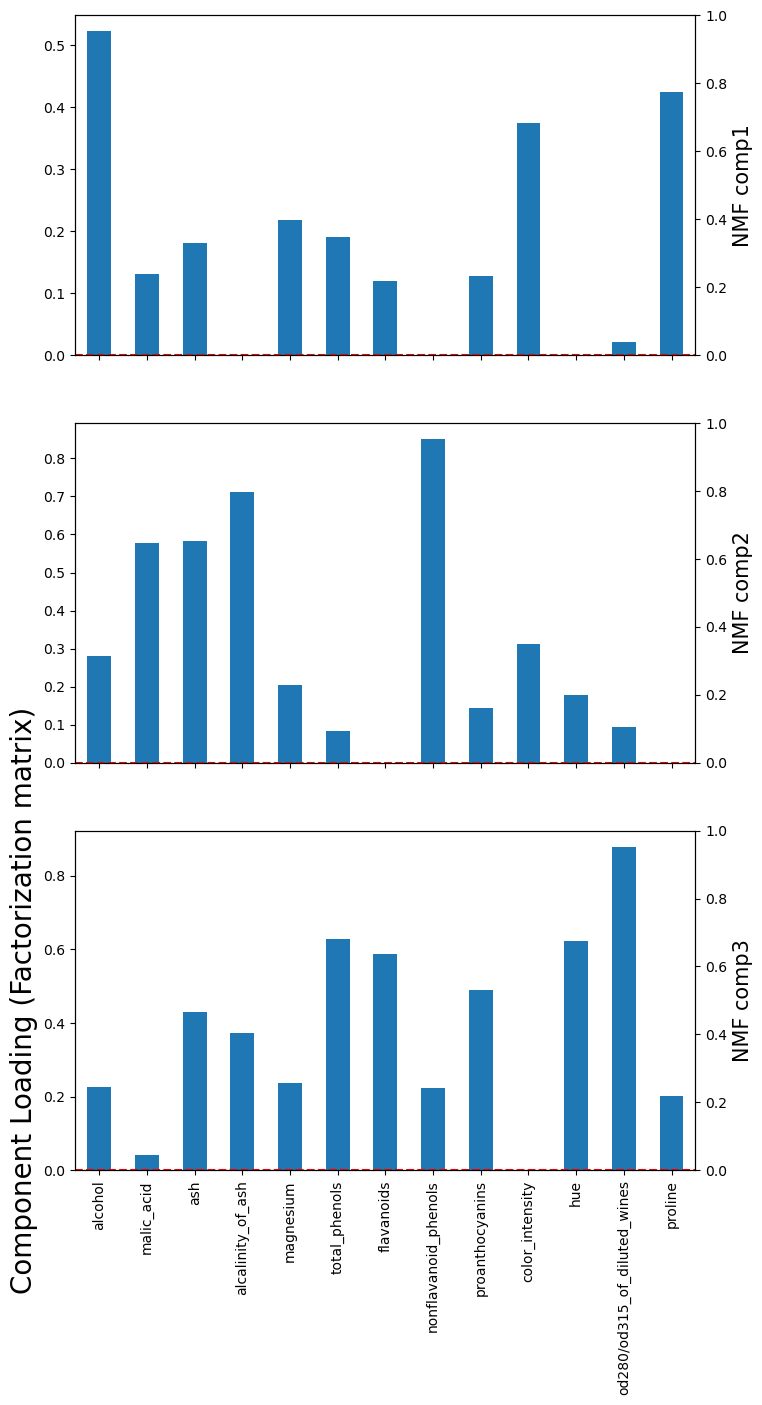

In [3]:
# 데이터 불러오기
from pandas import DataFrame
from sklearn.datasets import load_wine
from matplotlib import pyplot as plt

load = load_wine()
X = DataFrame(load['data'], columns = load['feature_names'])
y = load['target']

print("feature {}개, data {}개". format(X.shape[1], X.shape[0]))

# 데이터 표준화 (0~1사이에 데이터가 오도록 MinMaxScaler를 사용)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
scaled_X = DataFrame(mm.fit_transform(X), columns=X.columns)

# NMF 적합
from sklearn.decomposition import NMF
best_dim = 3
model = NMF(n_components=3, init= 'random', max_iter=2000)
model.fit(scaled_X)
NMF_result = model.transform(scaled_X) # W에 해당

# H에 해당(Factorization matrix)
NMF_comp = DataFrame(model.components_, index=['NMF comp%s'%i for i in range(1,best_dim+1)], columns=load['feature_names'])
print("NMF 성분 요약:\n", NMF_comp.iloc[:, :5], "\n") # 5개 feature까지만 조회


# 각 성분의 feature별 시각화
fig, axes = plt.subplots(best_dim, 1, figsize=(8,15))
for i, ax in enumerate(axes):
    NMF_comp.iloc[i, :].plot.bar(ax=ax, rot=90)
    ax.set_xticks(list(range(len(NMF_comp.columns))))
    ax.set_xticklabels([" " for i in range(len(NMF_comp.columns))])
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(NMF_comp.index[i], fontsize=15)
    ax.axhline(y=0, linestyle='dashed', color='red')
ax.set_xticks(list(range(len(NMF_comp.columns))))
ax.set_xticklabels(list(NMF_comp.columns ))
axes[round(best_dim/2)].set_ylabel("Component Loading (Factorization matrix)", fontsize=20)
plt.show()

### 다차원 척도법

In [2]:
## 이미 계산된 dissimilarity matrix가 있는 경우
# 유럽 도시 간 거리 데이터
from pandas import read_excel, DataFrame
dist = read_excel('../data/10-1_eurodist.xlsx').set_index('city')

# 최적의 차원 수 찾기
Slist = []
from sklearn.manifold import MDS
import numpy as np
for i in range(2,7):
    mnds = MDS(n_components=i, metric=True, dissimilarity='precomputed', random_state=0)
    mds.fit(dist)
    d_matrix = mds.dissimilarity_matrix_
    sklearn_stress = mds.stress_ #stress from Scikit learn
    kruskal_stress = np.sqrt(sklearn_stress / (0.5 * np.sum(d_matrix**2)))
#Kruskal's stress
    Slist.append(kruskal_stress)
    print("차원 수 {}일 때, stress {}".format(i, kruskal_stress))

    
# scree plotting
from matplotlib import pyplot as plt
plt.title("Scree plot")
plt.plot(list(range(2,7)), Slist, marker='o')
plt.plot(3, Slist[1], marker='o', color='red') # elbow!
plt.xlabel("number of dimension")
plt.ylabel("Kruskal's stress")
plt.show()

## 3차원이 될 때 stress가 가장 크게 감소한다.

FileNotFoundError: [Errno 2] No such file or directory: '../data/10-1_eurodist.xlsx'

In [1]:
# 3차원으로 고정 후 적합
mds = MDS(n_components=3, metric=True, dissimilarity='precomputed', random_state=0)
result = DataFrame(mds.fit_transform(dist)) # 차원 축소 결과
d_matrix = mds.dissimilarity_matrix_
sklearn_stress = mds.stress_
kruskal_stress = np.sqrt(sklearn_stress / (0.5 * np.sum(d.matrix**2)))

d_matrix = DataFrame(mds.dissimilarity_matrix_) # 데이터 간 비유사성 매트릭스

# 이미 계산된 비유사성 매트릭스와 동일한 결과를 반환한다
print("sklearn stress: {:.3f}, Kruskal_stress: {:.3f}".format(sklearn_stress, kruskal_stress))
print("dissimilarity matrix: \n", d_matrix.iloc[:5, :5]) #일부만 조회
print("result: \n", result.head(3)) # 각 데이터를 3차원의 데이터로 feature extraction
## 0에 가까운 Kruskal stress 값을 가지므로 적합이 잘 되었다고 볼 수 있다.

import seaborn as sns
from pandas import Dataframe
import numpy as np
from matplotlib import pyplot as plt
fig, ax = plt.subplots(3,1, figsize=(10, 30))

reduced_data = DataFrame(result.values, columns=['dim1', 'dim2', 'dim3'])

sns.scatterplot(x='dim1', y='dim2', data=reduced_data, ax=ax[0])
for i, name in enumerate(dist.index):
    ax[0].text( reduced_data.loc[i, 'dim1'], reduced_data.loc[i, 'dim2'], name)
    ax[0].axhline(0, 0, ls='--', color='#ff6600')
    ax[0].axvline(0, 0, ls='--', color='#ff6600')
                  

sns.scatterplot(x='dim1', y='dim3', data=reduced_data, ax=ax[1])
for i, name in enumerate(dist.index):
    ax[1].text( reduced_data.loc[i, 'dim1'], reduced_data.loc[i, 'dim3'], name)
    ax[1].axhline(0, 0, ls='--', color='#ff6600')
    ax[1].axvline(0, 0, ls='--', color='#ff6600')

sns.scatterplot(x='dim2', y='dim3', data=reduced_data, ax=ax[2])
for i, name in enumerate(dist.index):
    ax[2].text( reduced_data.loc[i, 'dim2'], reduced_data.loc[i, 'dim3'], name)
    ax[2].axhline(0, 0, ls='--', color='#ff6600')
    ax[2].axvline(0, 0, ls='--', color='#ff6600')             
    
plt.show()
## MDS에 의해 축소된 feature로 그린 산점도로부터 도시 간 거리가 시각화된 비유사도를 확인할 수 있다.

NameError: name 'MDS' is not defined

In [ ]:
## 개체들의 feature 값으로 dissmilarity matrix를 계산하는 경우
# 미국 주별 1인당 범죄빈도 데이터
from pandas import read_excel
crime = read_excel("../data/10-1_us_crime.xlsx").groupby(['주이름']).sum()
crime2 = crime.iloc[:, 1:]
for i, pop in enumerate(crime['인구수']):
    crime2.iloc[i, :] = crime.iloc[i, 1:] / pop

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
crime2 = DataFrame(ss.fit_transform(crime2), columns=crime2.columns, index = crime2.index)

# 최적의 차원 수 찾기
from sklearn.manifold import MDS
Slist = []
for i in range(2, 7):
    mds = MDS(n_components=i, metrix=True, dissimilarity='euclidean', random_state=0)
    mds.fit(crime2)
    d_matrix = mds.dissimilarity_matrix_
    sklearn_stress = mds.stress_ # stress from Scikit learn
    kruskal_stress = np.sqrt(sklearn_stress / (0.5 * np.sum(d_matrixs**2)))
#Kruskal's stress
    Slist.append(kruskal_stress)
    print("차원 수 {} 일 때, stress {}".format(i, kruskal_stress))

# scree plotting
from matplotlib import pyplot as plt
plt.title("Scree plot")
plt.plot(list(range(2,7), Slist, marker='o')
plt.plot(3, Slist[1], marker='o' color= 'red') # elbow!
plt.xlabel("number of dimension")
plt.ylabel("Kruskal's stress")
plt.show()

## 3차원 일 때 stress가 가장 많이 감소한다.

In [ ]:
# 3차원으로 고정 후 적합
mds = MDS(n_components=3, metric=True, dissimilarity='euclidean', random_state=0)
result = DataFrame(mds.fit_transform(crime2)) # 차원 축소 결과
d_matrix = mds.dissimilarity_matrix_
sklearn_stress = mds.stress_
# DE = eucliean_distances(scaled_X)
# sklear_stress = 0.5 * numpy.sum((DE - scaled_X.values)**2)
kruskal_stress = np.sqrt(sklearn_stress / (0.5 * np.sum(d.matrix**2)))
d_matrix = DataFrame(mds.dissimilarity_matrix_) # 데이터 간 비유사성 매트릭스

# 이미 계산된 비유사성 매트릭스와 동일한 결과를 반환한다
print("sklearn stress: {:.3f}, Kruskal_stress: {:.3f}".format(sklearn_stress, kruskal_stress))
print("dissimilarity matrix: \n", d_matrix.iloc[:5, :5]) #일부만 조회
print("result: \n", result.head(3)) # 각 데이터를 3개의 feature로 축소한 결과

## 0에 가까운 Kruskal stress 값을 가지므로 적합이 잘 되었다고 볼 수 있다.

import seaborn as sns
from pandas import Dataframe
import numpy as np
from matplotlib import pyplot as plt
fig, ax = plt.subplots(3,1, figsize=(10, 30))

reduced_data = DataFrame(result.values, columns=['dim1', 'dim2', 'dim3'])

sns.scatterplot(x='dim1', y='dim2', data=reduced_data, ax=ax[0])
for i, name in enumerate(dist.index):
    ax[0].text( reduced_data.loc[i, 'dim1'], reduced_data.loc[i, 'dim2'], name)
    ax[0].axhline(0, 0, ls='--', color='#ff6600')
    ax[0].axvline(0, 0, ls='--', color='#ff6600')
                  

sns.scatterplot(x='dim1', y='dim3', data=reduced_data, ax=ax[1])
for i, name in enumerate(dist.index):
    ax[1].text( reduced_data.loc[i, 'dim1'], reduced_data.loc[i, 'dim3'], name)
    ax[1].axhline(0, 0, ls='--', color='#ff6600')
    ax[1].axvline(0, 0, ls='--', color='#ff6600')

sns.scatterplot(x='dim2', y='dim3', data=reduced_data, ax=ax[2])
for i, name in enumerate(dist.index):
    ax[2].text( reduced_data.loc[i, 'dim2'], reduced_data.loc[i, 'dim3'], name)
    ax[2].axhline(0, 0, ls='--', color='#ff6600')
    ax[2].axvline(0, 0, ls='--', color='#ff6600')             
    
plt.show()
## MDS에 의해 축소된 feature로 그린 산점도로부터 범죄율이 높은 도시(DC, New Mexico, Louisiana, ...)와 낮은 도시(New Hampshire, Massachusetts, New Jersey, ...)의 비유사도를 확인할 수 있다.

In [ ]:
# 데이터 불러오기
from pandas import DataFrame
from sklearn.datasets import load_wine

load = load_wine()
X = DataFrame(load['data'], columns = load['feature_names'])
y= load['target']
print("feature {}개, data {}개". format(X.shape[1], X.shape[0]))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_X = DataFrame(ss.fit_transform(X), columns=X.columns)

# MDS 적합
from sklearn.manifold import MDS
best_dim = 3
model = MDS(n_components=best_dim)
MDS_result = model.fit_transform(scaled_X)

### t-SNE

In [ ]:
# 개체들의 feature 값으로 dissimilarity matrix를 계산하는 경우
# 미국 주별 1인당 범죄빈도 데이터
from pandas import read_excel
crime = read_excel("../data/10-1_us_crime.xlsx").groupby([ ' 주이름 ']).sum()
crime2 = crime.iloc[:, 1:]
for i, pop in enumerate(crime['인구수']):
    crime2.iloc[i, :] = crime.iloc[i, 1:] / pop


# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
crime2 = DataFrame(ss.fit_transform(crime2), columns = crime2.columns, index=crime2.index)

# 3차원으로 고정 후 적합
from sklearn.manifold import TSNE
best_dim = 3
tsne = TSNE(n_components=best_dim, random_state=0)
result = DataFrame(tsne.fit_transform(crime2))

import seaborn as sns
from pandas import Dataframe
import numpy as np
from matplotlib import pyplot as plt
fig, ax = plt.subplots(3,1, figsize=(10, 30))

reduced_data = DataFrame(result.values, columns=['dim1', 'dim2', 'dim3'])

sns.scatterplot(x='dim1', y='dim2', data=reduced_data, ax=ax[0])
for i, name in enumerate(crime2.index):
    ax[0].text( reduced_data.loc[i, 'dim1'], reduced_data.loc[i, 'dim2'], name)
    ax[0].axhline(0, 0, ls='--', color='#ff6600')
    ax[0].axvline(0, 0, ls='--', color='#ff6600')
                  

sns.scatterplot(x='dim1', y='dim3', data=reduced_data, ax=ax[1])
for i, name in enumerate(crime2.index):
    ax[1].text( reduced_data.loc[i, 'dim1'], reduced_data.loc[i, 'dim3'], name)
    ax[1].axhline(0, 0, ls='--', color='#ff6600')
    ax[1].axvline(0, 0, ls='--', color='#ff6600')

sns.scatterplot(x='dim2', y='dim3', data=reduced_data, ax=ax[2])
for i, name in enumerate(crime2.index):
    ax[2].text( reduced_data.loc[i, 'dim2'], reduced_data.loc[i, 'dim3'], name)
    ax[2].axhline(0, 0, ls='--', color='#ff6600')
    ax[2].axvline(0, 0, ls='--', color='#ff6600')             
    
plt.show()

In [ ]:
# 데이터 불러오기
from pandas import DataFrame
from sklearn.datasets import load_wine

load = load_wine()
X = DataFrame(load['data'], columns = load['feature_names'])
y= load['target']
print("feature {}개, data {}개". format(X.shape[1], X.shape[0]))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_X = DataFrame(ss.fit_transform(X), columns=X.columns)

# TSNE 적합
from sklearn.manifold import TSNE
best_dim = 3
model = TSNE(n_components=best_dim)
TSNE_result = model.fit_transform(scaled_X)

### 원본 데이터와 차원 축소 데이터로 적합한 모델 성능 비교

In [7]:
from sklearn. linear_model import LinearRegression
from sklearn.model_selection import train_test_split
data_list = [scaled_X, PCA_result, LSA_result, FA_result, ICA_result, NMF_result, MDS_result, TSNE_result]
title_list = ['original', 'PCA', 'LSA', 'FA', 'ICA', 'NMF', 'MDS', 't-SNE']
y = load['target']
for x, title in zip(data_list, title_list):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
    lr= LinearRegression().fit(X_train, y_train)
    trainS, testS = lr.score(X_train, y_train), lr.score(X_test, y_test)
    print("{} data: ".format(title))
    print("train score: {:.3f}, test score: {:.3f}\n".format(trainS, testS))
    
## 13개의 feature를 사용한 original data 와 비교했을 때 3개의 차원으로 축소한 data들의 성능을 확인할 수 있다.

NameError: name 'scaled_X' is not defined

## 10-2 군집분석


### 10-2-1 계층적 군집분석

In [ ]:
# 합병형 군집분석
from pandas import DataFrame
import numpy as np
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

# 데이터 불러오기
load = load_iris()
X = load['data']
y = load['target']
columns = list(map(lambda x: x.replace("(cm)", "").replace(" ", "_"), load['feature_names']))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = DataFrame(ss.fit_transform(X), columns=columns)

# 군집화 상세내역 매트릭스
Z = linkage(df, method='complete')

# 군집화 결과 시각화
distance_setting=5
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
dendrogram(Z, labels=list(df.index), color_threshold=distance_setting)
plt.xticks(rotation=90)
ax.axhline(y=distance_setting, linestyle='dashed', color='red')
plt.show()

# n_cluster로 정한 군집의 개수를 기반으로 각 데이터의 군집을 반환
n_cluster=3
Hclustering_result = cut_tree(Z, n_cluster).flatten()

# 타당성 평가: clustering한 군집번호와 target의 군집번호가 꼭 일치할 필요는 없고, 유사한 데이터들끼리 군집화만 잘 되어 있으면 된다.
from sklearn.metrics import silhouette_score, completeness_score
print("실루엣 계수: %.3f" %silhouette_score(df, Hclustering_result))
print("completeness_score: %.3f" %completeness_score(y, Hclustering_result))

In [ ]:
# 비유사도 측정 지표 별 군집 결과 비교
from pandas import merge
from collections import Counter
import seaborn as sns
from sklearn.metrics import silhouette_score, v_measure_score
fig, axes = plt.subplots(2, 2, figsize=(10,10))
plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
plt.subplots_adjust(hspace=0.3)
methods = ['single', 'average', 'complete', 'ward']
for ax, method in zip(axes.ravel(), methods):
    Z = linkage(df, method=method)
    cluster = DataFrame({'cluster': cut_tree(Z,3).flatten()})
    ddf = merge(df, cluster, left_index=True, right_index=True)
    sns.scatterplot(x='petal_length_', y='petal_width_', data=ddf, hue='cluster',
                   style='cluster', s=60, ax=ax, palette='Accent')
    ax.text(1.8, -0.9, 'silhouette index: %.3f' %silhouette_score(df, ddf['cluster']), horizontalalignment='right')
    cluster_size = dict(Counter(ddf['cluster']))
    ax.text(1.8, -1.3, 'cluster size: {}'.format(cluster_size), horizontalalignment='right')
    ax.set_title(method, fontsize=20)
plt.show()

### 10-2-2 비계층적 군집 분석

### K-means clustering

In [ ]:
# K-means clustering
from pandas import DataFrame
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 데이터 불러오기
load = load_iris()
X = load['data']
y = load['target']
columns = list(map(lambda x : x.replace("(cm)","").replace(" ", "_"), load['feature_names']))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = DataFrame(ss.fit_transform(X), columns=columns)

# 적정한 군집 개수 정하기
print("적정한 군집 개수 정하기:")
I = [] # 오차제곱합
for k in range(1,14):
    kmeans=KMeans(n_clusters=k).fit(df)
    I.append(kmeans.inertia_) # 오차제곱합
plt.plot(list(range(1, 14)), I, marker='o')

n_cluster=3
plt.scatter(n_cluster, I[n_cluster-1], color='red', alpha=0.5, s=100)
plt.xticks(list(range(1,14)), list(range(1,14)))
plt.xlabel("Cluster 개수: K")
plt.ylabel("클러스터 중심과 데이터들의 오차제곱합 : inertia_")
plt.show()

# n_cluster로 정한 군집의 개수를 기반으로 각 데이터의 군집을 반환
model = KMeans(n_clusters=n_cluster, random_state=0)
distances = model.fit_transform(df)
kmeans_result = DataFrame(model.labels_, columns=['cluster'])

# 군집 정보 확인
print("클러스터 구성:", Counter(model.labels_))
centers = DataFrame(model.cluster_centers_, columns=df.columns, index=["cluste%s" %i for i in range(n_cluster)])
                    
print("클러스터 중심:\n{}\n".format(centers))

# 
from sklearn.metrics import silhouette_score, completeness_score
print("실루엣 계수: %.3f" %silhouette_score(df, kmeans_result.values.ravel()))
print("comleteness_score: %.3f" %completeness_score(y, kmeans_result.values.ravel()))
ddf = merge(df, kmeans_result, left_index=True, right_index=True)

# 군집 결과 시각화
fig, ax = plt.subplots(1,1)
sns.scatterplot(x='petal_length_', y='petal_width_', data=ddf,
               hue='cluster', style='cluster', s=60, ax=ax, palette='Accent')
plt.show()

### DBSCAN

In [ ]:
# DBSCAN
from pandas import DataFrame
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# 데이터불러오기
load = load_iris()
X=load['data']
y=load['target']
columns=list(map(lambda x:x.replace("(cm)","").replace(" ", "_"), load['feature_names']))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = DataFrame(ss.fit_transform(X), columns=columns)

# 
print("적정한 eps 정하기")
eps_list = [0.5, 0.8, 1, 1.2] # eps 후보군
fig, axes = plt.subplots(1,4,figsize=(15,5))
for ax, eps in zip(axes, eps_list):
    db = DBSCAN(eps=eps, min_samples=5).fit(df)
    temp_df = df.copy()
    temp_df['label']=db.labels_
    sns.scatterplot(x='petal_length_', y='petal_width_', data=temp_df, hue='label', style='label', s=60,
                   ax=ax, palette='pastel')
    score=silhouette_score(df, db.labels_)
    ax.set_title("eps {}, score {:.3f}".format(eps, score))
plt.show()

In [ ]:
# 확정한 eps를 기반으로 각 데이터의 군집을 반환
eps = 1
model = DBSCAN(eps=eps, min_samples=10).fit(df)
DB_result = DataFrame(model.labels_, columns=['cluster']) # 각 데이터의 군집 반환

# 군집 정보 확인
print("클러스터 구성:", Counter(model.labels_))
print("핵심 데이터 인덱스:", model.core_sample_indices_, '\n')

In [ ]:
# 타당성 평가
from sklearn.metrics import silhouette_score, completeness_score
print("실루엣 계수: %.3f" %silhouette_score(df, DB_result.values.ravel()))
print("completeness_score: %.3f" %completeness_score(y, DB_result.values.ravel()))
ddf = merge(df, DB_result, left_index=True, right_index=True)

# 군집 결과 시각화
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.scatterplot(x='petal_length_', y='petal_width_', data=ddf, hue='cluster', style='cluster',
               s=70, ax=ax, palette='Accent')
plt.show()

In [ ]:
# 확정한 eps를 기반으로 각 데이터의 군집을 반환
eps = 1
model = DBSCAN(eps=eps, min_samples = 10).fit(df)
DB_reuslt = DataFrame(model.labels_, columns=['cluster'])

# 군집 정보 확인
print("클러스터 구성: ", Counter(model.labels_))
print("핵심 데이터 인덱스:", model.core_sample_indices_,'\n')

# 타당성 평가
from sklearn.metrics import silhouette_score, completeness_score
print("실루엣 계수: %.3f" %silhouette_score(df, DB_result.values.ravel()))
print("completeness_score: %.3f" %completeness_score(y, DB_result.values.ravel()))
ddf = merge(df, DB_result, left_index=True, right_index=True)

# 군집 결과 시각화
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.scatterplot(x='petal_length_', y='petal_width_', data=ddf,
               hue='cluster', style='cluster', s=70, ax=ax, palette='Accent')
plt.show()

### 혼합분포군집

In [ ]:
# 혼합분포 군집
from pandas import DataFrame
import numpy as np
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# 데이터 불러오기
load = load_iris()
X = load['data']
y = load['target']
columns = list(map(lambda x:x.replace("(cm)", "").replace(" ", "_"), load['feature_names']))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = DataFrame(ss.fit_transform(X), columns=columns)

# 적정한 분포 개수 정하기
print("적정한 분포 개수 정하기:")
dist_list=[2,3,4,5] # 분포 개수 후보군
fig, axes = plt.subplots(1,4, figsize=(15,5))
for ax, k in zip(axes, dist_list):
    gm = GaussianMixture(n_components=k, covariance_type='full').fit(df)
    temp_df = df.copy()
    temp_df['label'] = gm.predict(df)
    sns.scatterplot(x='petal_length_', y='petal_width_', data=temp_df,
                   hue='label', style='label', s=70, ax=ax, palette='pastel')
    aic,bic = gm.aic(df), gm.bic(df)
    score = silhouette_score(df, temp_df['label'])
    ax.set_title("k={}, score {:.2f}, BIC {:.2f}".format(k, score, bic))
plt.show()

In [ ]:
# 확정한 k를 기반으로 각 데이터의 군집을 반환
k = 3
model = GaussianMixture(n_components=k).fit(df)
labels = model.predict(df)
GM_result = DataFrame(labels, columns=['cluster']) # 각 데이터의 군집 반환

# 군집 정보 확인
print("클러스터 구성: ", Counter(labels))
print("distribution 별 feature 평균: \n {} \n {}".format(model.means_[0], model.means_[1]))
print("distribution 별 가중치:", model.weights_)
print("모델의 로그 가능도: {:.3f}\n".format(model.score(df)))

# 타당성 평가
from sklearn.metrics import silhouette_score, completeness_score
print("실루엣 계수: %.3f" %silhouette_score(df, labels))
print("completeness_score: %.3f" %completeness_score(y, labels))
ddf = merge(df, GM_result, left_index=True, right_index=True)

# 군집 결과 시각화
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.scatterplot(x='petal_length_', y='petal_width_', data=ddf, hue='cluster', style='cluster',
               s=70, ax=ax, palette='Accent')
plt.show()

### SOM

In [ ]:
pip install sklearn-som

In [ ]:
# SOM
from pandas import DataFrame
import numpy as np
from sklearn.datasets import load_iris
from sklearn_som.som import SOM

# 데이터 불러오기
load = load_iris()
X = load['data']
y = load['target']
columns = list(map(lambda x: x.replace("(cm)", "").replace(" ", "_"), load['feature_names']))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = DataFrame(ss.fit_transform(X), columns=columns)

# 적정한 네트워크의 크기 정하기(=군집 개수 정하기)
print("적정한 네트워크의 크기 정하기")
mn_list=[(2,1), (3,1), (2,2), (5,1)]
fig, axes = plt.subplots(1,4,figsize=(15,5))
for ax, (M, N) in zip(axes, mn_list):
    som=SOM(m=M, n=N, dim=df.shape[1])
    som.fit(df.values)
    labels = som.predict(df.values)
    clusterNo = len(Counter(labels))
    temp_df = df.copy()
    temp_df['label'] = som.predict(df.values)
    sns.scatterplot(x='petal_length_', y='petal_width_', data=temp_df, hue='label',
                   style='label', s=70, ax=ax, palette='pastel')
    score=silhouette_score(df, temp_df['label'])
    ax.set_title("MxN={}x{}, k={}, score {:.2f}".format(M,N,clusterNo, score))
plt.show()

In [ ]:
# 확정한 k를 기반으로 각 데이터의 군집을 반환
M, N = (3,1)
model = SOM(m=M, n=N, dim=df.shape[1])
model.fit(df.values)
labels = model.predict(df.values)
SOMmap = model.transform(df.values)
som_result = DataFrame(labels, columns=['cluster'])

# 군집 정보 확인
print("클러스터 구성: ", Counter(labels))
print("SOM map: \n", SOMmap[:5], '\n')

# 타당성 평가
from sklearn.metrics import silhouette_score, completeness_score
print("실루엣 계수: %.3f" %silhouette_score(df, labels))
print("completeness_score: %.3f" %completeness_score(y,labels))
ddf = merge(df,som_result, left_index=True, right_index=True)

# 군집 결과 시각화
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.scatterplot(x='petal_length_', y='petal_width_', data=ddf,
               hue='cluster', style='cluster', s=70, ax=ax, palette='Accent')
plt.show()

## 10-3. 연관규칙학습

In [ ]:
# Transaction data(거래내역 데이터) 생성하기
from pandas import DataFrame
from mlxtend.preprocessing import TransactionEncoder

dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans' , 'Eggs', 'Yogurt'],
['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Yogurt'],
['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = DataFrame(te_ary, columns=te.columns_).applymap(lambda x: 1 if x else 0)
print(df)
# 각 거래품목에 대한 거래 여부를 표시하는 데이터로 전처리 완료

In [ ]:
# APRIORI 알고리즘으로 연관규직학습
# 빈발항목집합 생성
from mlxtend.frequent_patterns import apriori
fset = apriori(df, min_support=0.6, use_colnames=True, verbose=0)
print('빈발항목집합:\n', fset.sort_values(by='support', ascending=False), '\n')

# 연관규칙 생성
from mlxtend.frequent_patterns import association_rules
# metric = ('support', 'confidence', 'lift', 'Leverage', 'conviction '}
# min threshold = metric 파라미터 값의 최솟값 설정
rule = association_rules(fset, metric='confidence', min_threshold=0.7)
rule['len_ant'] = rule['antecedents'].apply(lambda x: len(x))
rule['len_con'] = rule['consequents'].apply(lambda x: len(x))

# consequents 항목이 1이고, lift가 1.2이상인 rule만 확인
print('\n연관규칙:')
print(rule[(rule['len_con']==1) & (rule['lift']>=1.2)])

In [ ]:
# FP Growth 알고리즘으로 연관규칙학습

# 빈발항목집합 생성
from mlxtend.frequent_patterns import fpgrowth
fset = fpgrowth(df, min_support=0.6, use_colnames=True, verbose=0)
print('빈발항목집합: \n', fset.sort_values(by='support', ascending=False), '\n')

# 연관규칙 생성
from mlxtend.frequent_patterns import association_rules
# metric = {'support', 'confidence', 'lift', 'leverage', conviction'}
# min threshold = metric 파라미터 값의 최솟값 설정
rule = association_rules(fset, metric='confidence', min_threshold=0.7)
rule['len_ant'] = rule['antecedents'].apply(lambda x: len(x))
rule['len_con'] = rule['consequents'].apply(lambda x: len(x))

# consequents 항목이 1이고, lift가 1.2이상인 rule만 확인
print ("\n연관규칙:")
print(rule[(rule['len_con']==1) & (rule['lift']>=1.2)])

# 11장. 모델 평가 지표와 거리 지표

# 12장. 시계열 분석

## 12-1. 시계열 탐색적 분석
### 12-1-1. 일반적 EDA

In [1]:
# 일변량 시계열 데이터 불러오기
# 출처: 보건복지부_코로나19 시도 발생현황, 공공데이터 포털
from pandas import read_csv
ts = read_csv('/kaggle/input/adp-pythoncodebook1/12_data_seoul_covid19.csv', encoding = 'euc-kr').filter(['날짜', '전일대비증감수'])
ts['날짜'] = ts['날짜'].astype('datetime64') # 날짜 데이터로 설정
ts = ts.set_index('날짜') # 인덱스를 날짜로 셋팅
ts_head = ts.head(334) # 2021년 1~11월 데이터
ts_tail = ts.tail(31) # 2022년 12월 데이터
print(ts_head)

            전일대비증감수
날짜                 
2021-01-01      357
2021-01-02      250
2021-01-03      198
2021-01-04      329
2021-01-05      199
...             ...
2021-11-26     1742
2021-11-27     1888
2021-11-28     1676
2021-11-29     1393
2021-11-30     1186

[334 rows x 1 columns]


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(

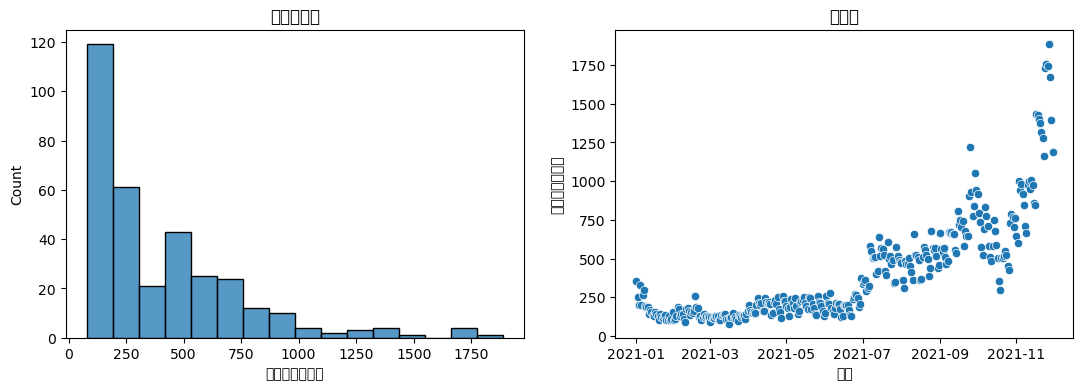


 [요약통계량]
         count        mean         std   min    25%    50%    75%     max
전일대비증감수  334.0  405.152695  336.013188  79.0  152.0  252.5  556.0  1888.0


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['font.size']= 10
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'D2Coding'

fig, axes = plt.subplots(1, 2, figsize=(13,4))

# 히스토그램
axes[0].set_title("히스토그램")
sns.histplot(x='전일대비증감수', data=ts_head, ax=axes[0])

# 산점도
axes[1].set_title("산점도")
sns.scatterplot(x='날짜', y='전일대비증감수', data=ts_head, ax=axes[1])
plt.show()

# 요약 통계량
print("\n [요약통계량]")
print(ts_head.describe().T)

### 12-1-2. 시계열에 특화된 EDA

#### 정상성 확인

ADF Statistics: 0.762, p-value: 0.991
KPSS Statistics: 2.210, p-value: 0.010


/tmp/ipykernel_32/1745456988.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(ts_head, regression='c', nlags='auto')


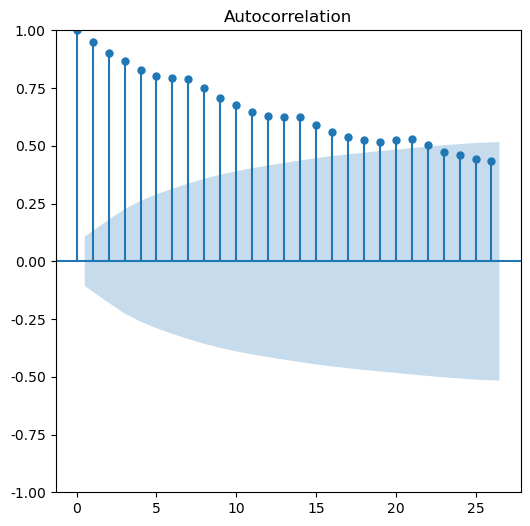

In [3]:
# 정상성 검정1 - ADF
# H0: 단위근을 포함한다 (비정상)
# H1: 단위근을 포함하지 않는다 (정상)
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_head, regression='c', autolag='AIC')
print("ADF Statistics: {:.3f}, p-value: {:.3f}".format(result[0], result[1]))
# ts_head가 비정상 시계열이라는 결론울 얻었다.

# 정상성 검정2 - KPSS
# H0: 정상시계 열과 차이가 없다 (정상)
# H1: 정상시계열과 차이가 있다 (비정상)
from statsmodels.tsa.stattools import kpss
result = kpss(ts_head, regression='c', nlags='auto')
print("KPSS Statistics: {:.3f}, p-value: {:.3f}".format(result[0], result[1]))
# ts_head가 비정상 시계열이라는 결론을 얻었다.

# 정상성 검정3 - ACF 그래프
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts_head)
plt.show()

# tshead가 비정상 시계열이라는 결론을 얻었다.

#### 자기상관 확인

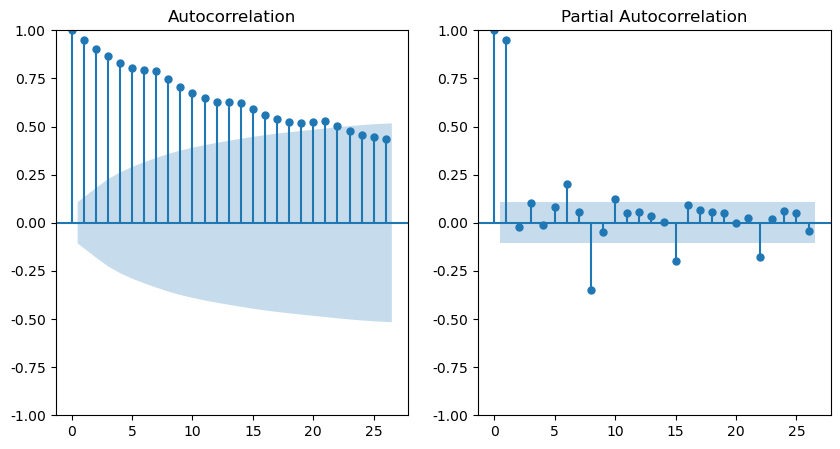

융박스 테스트:
       lb_stat      lb_pvalue
1   304.691106   3.131578e-68
2   579.605498  1.381228e-126
3   833.394832  2.474556e-180
4  1067.333259  9.111938e-230
5  1286.641140  5.005454e-276 In


In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

# 자기상관 검정1 - ACF/PACF 그래프
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1,2, figsize=(10,5))
plot_acf(ts_head, ax=ax[0])
plot_pacf(ts_head, ax=ax[1])
plt.show()

## ACF 그래프의 임계영역을 벗어나는 값들을 볼 때, 자기 상관이 있음을 알 수 있다.
## PCF 그래프의 임계영역을 벗어나는 시차 1, 3, 6, 8 등이 자기 상관이 있음을 알 수 있다.

# 자기상관 검정2 - Ljung-box test
# H0: 데이터가 일련의 상관관계를 나타내지 않는다.
# H1: 데이터가 일련의 상관관계를 나타낸다.
from statsmodels.stats.diagnostic import acorr_ljungbox
print("융박스 테스트:")
result = acorr_ljungbox(ts_head, return_df=True, auto_lag=True).head(5)
print(result, "In")
# ts_head가 자기상관이 있다는 결론을 얻었다.

# 자기상관 점정3 - Durbin-watson test
# 통계량이 2에 가까우면 자기 상관이 없다
# 통제량이 0 혹은 4에 가까우면 자기 상관이 있다.
from statsmodels.stats.stattools import durbin_watson
result = durbin_watson(ts_head)
# ts_head가 자기상관이 있다는 결론을 얻었다

#### 시계열 분해

In [ ]:
# 이동평균법: 계절 변동과 불규칙 변동 제거
fig, ax = plt.subplots(1,1, figsize=(12,3))
titles = ['original', 'rolling window=10', 'rolling window=30']
rw10= ts_head.rolling(window=10).mean().dropna()
rw30= ts_head.rolling(window=30).mean().dropna()
data_list = [ts_head, rw10, rw30]
ls_list = ['dashed', 'dotted', 'solid']
for title, data, ls in zip(titles, data_list, ls_list):
    ax.plot(data, label=title, linestyle=ls)
plt.legend()
plt.show()

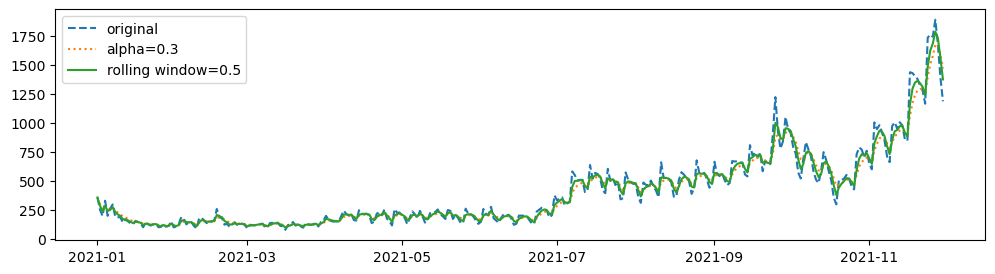

In [5]:
# 지수평활법: 불규칙변동 제거
fig, ax = plt.subplots(1,1, figsize=(12,3))
titles = ['original', 'alpha=0.3', 'rolling window=0.5']
ewm03 = ts_head.ewm(alpha=0.3).mean()

ewm05 = ts_head.ewm(alpha=0.5).mean()
data_list = [ts_head, ewm03, ewm05]
ls_list = ['dashed', 'dotted', 'solid']

for title, data, ls in zip(titles, data_list, ls_list):
    ax.plot(data, label=title, linestyle=ls)
plt.legend()
plt.show()

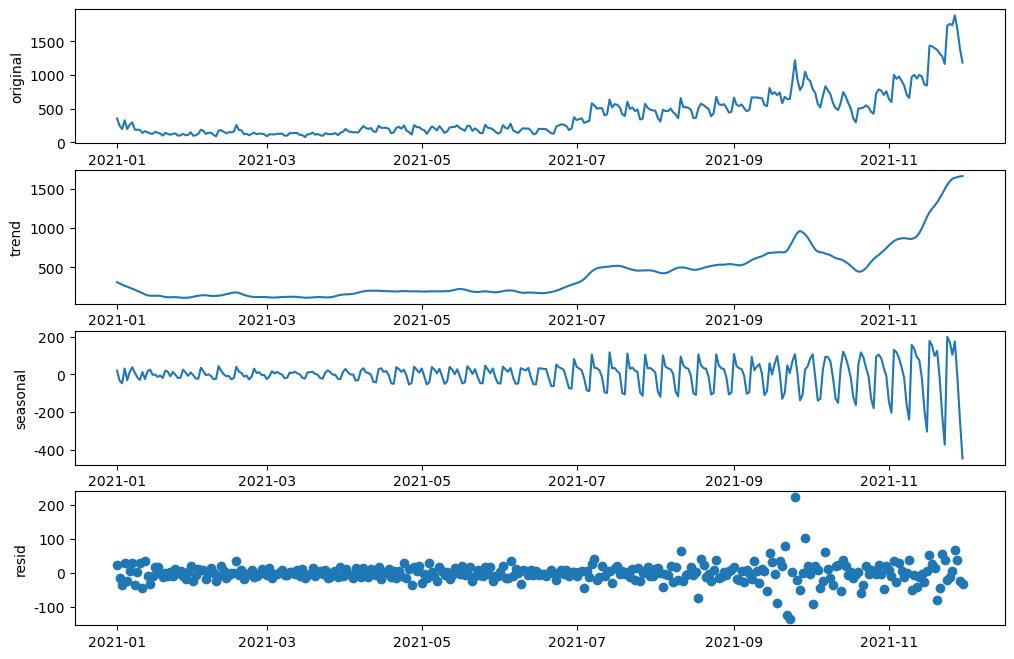

In [6]:
# STL 분해
from statsmodels.tsa.seasonal import STL
# seasonal = Length of the seasonal smoother
# trend = Length of the trend smoother
fitted = STL(ts_head.전일대비증감수, seasonal=7, trend=9).fit()
resid = fitted.resid # 잔차
seasonal = fitted.seasonal # 추정된 계절 요소
trend = fitted.trend # 추정된 트렌드 요소

titles = ['original', 'trend', 'seasonal', 'resid' ]
data_list = [ts_head, trend, seasonal, resid]
fig, axes = plt.subplots(4,1, figsize=(12,8))
for title, data, ax in zip(titles, data_list, axes):
    ax.set_ylabel(title)
    if title != 'resid':
        ax.plot(data)
    else:
        ax.scatter(x=data. index, y=data.values)
plt.show()
## plotting2 fitted.plot()로 한번에 할 수도 있다.

## 12-2. 시계열 데이터 전처리

#### 시계열 데이터 다루기

In [ ]:
import datetime as dt
import pandas as pd
import time
from pandas import read_csv
ts = read_csv('/kaggle/input/adp-pythoncodebook1/12_data_seoul_covid19.csv', encoding='euc-kr')

# 날짜 테이터로 타입 변경하기 - (1) object - datetime
print("object: ", ts['날짜'].dtypes)
ts['날짜'] = ts['날짜'].astype('datetime64')
print("object to datetime: ", ts['날짜'].dtypes, "\n")

# 날짜 테이터로 타입 변경하기 - (2) string - datetime
string = "2018-09-13 22:39:04"
print("string: ", type(string))
# string에서 나타내는 년월일 정보와 대응하도록 format을 적어줘야 해당 날짜로 인식 가능
datetime = dt.datetime.strptime(string, "%Y-%m-%d %H:%M:%S")
print("string to datetime: ", type(datetime))
string2 = datetime. strftime("%Y-%m-%d %H:%M:%S")
print("datetime to string: ", type(string2), "\n")
                                
# 날짜 테이터로 타입 변경하기 - (3) timestamp - datetime
timestamp = 2551780740 #timestamp
datetime = dt.datetime.fromtimestamp(timestamp)
timestamp2 = time.mktime(datetime.timetuple())
print("timestamp: ", timestamp)
print("timestamp to datetime: ", datetime)
print("datetime to timestamp: ", timestamp2, "\n")

In [ ]:
# 날짜 데이터 생성하기 - (1) dt.datetime
date1 = dt.datetime(2023, 3, 20, 16, 0, 0)
#year, month, day, hour, minute, second, ...
date2 = dt.datetime.now()
date_only = dt.date(2019,1,1)
time_only = dt.time(10, 0, 5)
print("직접 지정해서 만든 날짜 데이터: ", date1)
print("현재 시간을 반환하는 날짜 데이터: ", date2)
print("date_only: ", date_only)
print('time_only: ', time_only, "\n")

# 날짜 데이터 생성하기 - (2) pd.date_ range, pd.period_ range
## 시작날짜, 종료날짜, 날짜 개수(periods), 날짜의 간격 단위(freq)를 입력
## freq={'A(년) ', '₩(월)', 'D(일))', 'T(분) '='min(분)' 'S(초)', '0(분기)','W(주)'}
date_list1 = pd.date_range('2016-01-01', periods=3, freq="D")
date_list2 = pd.date_range('2016-01-01', periods=4, freq="W")
date_list3 = pd.date_range('2016-01-01', '2016-01-02', freq='30T') #시간은 '60T'
print('일 단위 날짜들 3개:\n', date_list1)
print('주 단위 날짜들 4개:\n', date_list2)

print('시작-종료날짜 사이 30분 단위 날짜들:\n', date_list3[:5], "\n") #앞의 다섯개만 print

date_list4 = pd.period_range('2012-01-01', freq='A', periods=2)
date_list5 = pd.period_range('2012-01-01', freq='Q', periods=3)
print('년 단위 날짜들 2개:\n', date_list4)
print('분기 단위 날짜들 3개:\n', date_list5)

In [ ]:
# 날짜 데이터의 형태, 값 변경하기
date3 = dt.datetime(2023, 3, 20, 0, 1, 10)
date3_c1 = date3.strftime("%Y-%m-%d") #네자리 년도, 월, 일
date3_c2 = date3.strftime("%y년 %m-%d %H:%M") #두자리 년도, 월, 일, 시간, 분
print("형태 변경 전: ", date3)
print("형태 변경 후 1: ", date3_c1)
print("형태 변경 후 2: ", date3_c2, "\n")

date4 = date3.replace(year = 2022, minute=2)
# year, month, day, hour, minute, second, ...
print("값 변경 전: ", date3)
print("값 변경 후: ", date4, "\n")

date_only = dt.date(2019,1,1)
time_only = dt.time(10, 0, 5)
datetime = dt.datetime.combine(date_only, time_only)
print("값 병합 전: ", date_only, time_only)
print("값 병합 후: ", datetime, "\n")

In [ ]:
# 날짜 데이터 간 연산하기
## weeks, days, hours, minutes, ...
weeks1 = dt.timedelta(weeks = 1)
today = dt.date(2023,2, 10)
print("오늘: ", today)
print("오늘로부터 1주 전: ", today - weeks1)
print("오늘로부터 1주 후: ", today + weeks1)

In [ ]:
# 년, 월, 일, 요일명, 요일인텍스 추출하기
print("\n 년, 월, 일, 요일명, 요일인덱스 추출하기: ")
ts['날짜'] = ts['날짜'].astype('datetime64') #날짜의 데이터 타입 변경
ts['년'] = ts['날짜'].dt.year #날짜 feature에서 년 정보를 추출
ts['월'] = ts['날짜'].dt.month
ts['일'] = ts['날짜'].dt.day
ts['요일명'] = ts['날짜'].dt.weekday
ts['요일인덱스'] = ts['날짜'].dt.day_name() #0~6(월요일~일요일)
print(ts.head(5))

#### 시계열 빈도 변경(업샘플링, 다운샘플링)

In [ ]:
from pandas import read_csv
ts = read_csv('/kaggle/input/adp-pythoncodebook1/12_data_seoul_covid19.csv', encoding='euc-kr')

# 날짜 column의 데이터 타입을 변경하고 인덱스로 셋팅한다.
ts['날짜'] = ts['날짜'].astype('datetime64')
ts = ts.set_index('날짜')
# rule = 'A(년)', '₩(월) ', 'D(일))', 'T(분)'='min(분)' 'S(초)', 'Q(분기)', W(주)
# aggregating = .asfreq(), .sum(), .mean()
print("[원본 데이터]")
print(ts.loc[ '2021-03-31', :], "\n")

print("[freq='Q', asfreq]") # 해당 기간의 대표 날짜의 데이터를 반환
print(ts.resample(rule='Q').asfreq(), "\n")
print("[freq='Q', sum] ") # 해당 기간의 데이터 합을 반환
print (ts.resample(rule='Q').sum(), "\n")
print("[freq='Q', mean] ") # 해당 기간의 데이터 평균율 반환
print(ts.resample(rule='Q').mean(), "\n")

#### 결측치 처리

In [ ]:
# 데이터 불러오기
from pandas import read_csv
ts = read_csv('/kaggle/input/adp-pythoncodebook1/12_data_seoul_covid19.csv', encoding='euc-kr').filter(['날짜', '전일대비증감수'])
ts['날짜'] = ts['날짜'].astype('datetime64')
ts = ts.set_index('날짜')
print('결측치 확인: ', ts.isna().sum(), "\n")

#결측치 있는 데이터로 만들기
ts_na = ts.copy()
import numpy as np
random_numbers = np.random.randint(0, len(ts)-1, 50)
for num in random_numbers:
    ts_na.iloc[num, :] = np.nan
print("결측치 확인: ", ts_na.isna().sum(), "\n")


#### 차분과 변환

In [ ]:
# 각종 보간 후, 실제 데이터와의 비교
linear = ts_na.interpolate(method='linear')
nearest = ts_na.interpolate(method='nearest')
zero = ts_na.interpolate(method="zero")
quadratic = ts_na.interpolate(method='quadratic') # polynomial order=2와 동일
cubic = ts_na.interpolate(method='cubic') # polynomial order=3과 동일
spline = ts_na.interpolate(method='spline', order=2)
polynomial = ts_na.interpolate(method='polynomial', order=3)

titles = ['linear', 'nearest', 'zero', 'quadratic', 'cubic', 'spline', 'polynomial']
data_list = [linear, nearest, zero, quadratic, cubic, spline, polynomial]
sqrd_error = []
for title, data in zip(titles, data_list):
    sqrd_e = sum((ts - data)['전일대비증감수']**2)
    sqrd_error.append(int(sqrd_e))
result = pd.DataFrame({'title':titles, 'error':sqrd_error}).sort_values(by='error', ascending=False)

# 보간법별 에러 비교
result.plot. bar(x='title', y='error', label="squared error", rot=45, fontsize=13)
plt.show()

In [ ]:
# 차분 전후 비교
from statsmodels.tsa.stattools import adfuller, kpss

fig, ax = plt.subplots(1,1, figsize=(12,3))

titles = ['original', 'diff(1)', 'diff(2)']
diff1 = ts_head.diff(periods=1).dropna()
diff2 = ts_head.diff(periods=2).dropna()
data_list = [ts_head, diff1, diff2]
alpha_list = [0.4, 0.6, 0.9]

for title, data, a in zip(titles, data_list, alpha_list):
    ax.plot(data, label=title, alpha=a)
    ap = adfuller(data)[1]
    kp = kpss(data)[1]
    print("{}: ADF p-value {:.3f}, KPSS p-value {:.3f}".format(title, ap, kp))
plt.legend()
plt.show()

## 1번의 차분으로 정상시계열이 되었다

In [ ]:
# 변환 전후 비교
from statsmodels.tsa.stattools import adfuller, kpss
from sklearn.preprocessing import PowerTransformer
import numpy as np

fig, ax = plt.subplots(1,1, figsize=(12,3))

# 로그변환
log= np.log(ts_head)
# 박스콕스 변환
pt = PowerTransformer(method='box-cox')
rescaled = pt.fit_transform(ts_head)
boxcox = pd.DataFrame(rescaled, index=ts_head.index, columns=ts_head.columns)
# 차분 1회
log= log.diff(1).dropna()
boxcox = boxcox.diff(1).dropna()

titles = ['log', 'box-cox']
data_list = [ log, boxcox]
ls_list = ['dotted', 'solid']
for title, data, ls in zip(titles, data_list, ls_list):
    ax.plot(data, label=title, linestyle=ls)
    ap = adfuller(data)[1]
    kp = kpss(data)[1]
    print("{}: ADF p-value {:.3f}, KPSS p-value {:.3f}".format(title, ap, kp))
plt.legend()
plt.show()

## 12-3. 시계열 모델링 및 평가

### 12-3-1. 통계 모델

In [ ]:
# 박스-젠킨스 방법
# 차분 1회 및 boxcox 변환을 통해 정상화한 시계열 데이터 'boxcox'로 적절한 차수를 찾기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1,2, figsize=(10,5))
plot_acf(boxcox, ax=ax[0])
plot_pacf(boxcox, ax=ax[1])
plt.show()
# 두 plot 모두 가파른 절단이 없는 것으로 보아 ARMA 모델로 적합하며 차수는 plot상의 절단점을 참고하여 p=9, 9-2로 정하고 모델을 적합하기로 한다. 계절성이 있는 것으로 보인다.

In [ ]:
# 모델 예측 및 잔차 분석
# 모델의 비계절성 부분
p = 9 # AR 차수
d = 1 # 차분 횟수
q = 2 # MA 차수

# 모델의 계절성 부분 (계절성이 없으면 생략 가능)
P = 0
D = 0
Q = 1 #CF lag7에서 뽀족한 막대를 가지고, PACF는 지수적으로 감소
s = 7 #CF lag7에서 뽀족한 막대를 가짐, 계절성 단위 (seasonal period)

from statsmodels. tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
# ARIMA에서 seasonal_ order를 입력하면 SARIMAX와 동일한 결과를 얻음
model = ARIMA(ts_head, order=(p, d, q), seasonal_order=(P, D, Q, s)) #원본 데이터를 입력해야 함
fitted = model.fit()
resid = fitted.resid

# pred1과 pred2는 동일한 값임
pred1 = fitted.forecast(31) #이후 31개 날짜의 값을 예측
pred2 = fitted.predict(start=ts_tail.index[0], end=ts_tail.index[-1]) #시작/종료날짜로 예측
# 잔차의 정규성 확인: Jarque-Bera 검정을 통해 귀무가설을 채택하면, 정규성을 갖는다.
# 잔차의 자기상관 확인: Ljung-Box 검정을 통해 귀무가설을 채택하면, 자기상관이 없다.

print(fitted.summary())
# ACF/PACF plot 관찰을 통해 SARIMA 모델을 적합하였으나, 잔차가 정규성을 만족하지 않기 때문에 추가적인 모델 개선이 필요하다

In [ ]:
# 자동 차수 선택1 - pmdarima의 auto_arima
from pmdarima import auto_arima
auto_arima(ts_head, start_p=1, start_q=1, max_p=5, max_q=5, start_P=0, start_Q=0, max_P=5, max_Q=5, m=12, seasonal=True, trace=False, error_action='warn', suppress_warnings=True)

In [ ]:
import pandas as pd

model = ARIMA(ts_head, order=(5, 1, 4), seasonal_order=(1, 0, 0, 12))
fitted = model.fit()
resid = fitted.resid
pred3 = fitted.forecast(31) # 이후 31개 날짜의 값을 예측
pred4 = fitted.predict(start=ts_tail.index[0], end=ts_tail.index[-1]) # 날짜 데이터를 통해 값을 예측
# 잔차의 정규성 확인: Jarque-Bera 검정을 통해 귀무가설을 채택하면, 정규성을 갖는다.
# 잔차의 자기상관 확인: Ljung-Box 검정을 통해 귀무가설을 채택하면, 자기상관이 없다.

print(fitted.summary())
# auto_arima를 통해 SARIMA 모델을 적합하였으나, 잔차가 정규성을 만족하지 않기 때문에 추가적인 모델 개선이 필요하다.

In [ ]:
# 자동 차수 선택2 - 반복문 사용
from warnings import filterwarnings
filterwarnings('ignore')

from statsmodels.tsa.arima.model import ARIMA
import itertools
p = range(0,4)
d = range(1,2)
q = range(0,3)
Q = D = P = range(0,2)
m = [4, 7, 12]
combis = list(itertools.product(p,d,q, P,D,Q,m))

dict_model = {}
for i, combi in enumerate(combis):
    try:
        no_seasonal = combi[:3]
        seasonal = combi[3:]
        model = ARIMA(ts_head, order=(no_seasonal), seasonal_order=(seasonal))
        fitted = model.fit()
        dict_model[combi]=[fitted.llf, fitted.aic]
        # llf(likelihood)는 높을수록 좋은
        # AICE는 낮을수록 좋은
    except:
        print("except: ", i, combi) # LU decomposition error 발생하는 경우 pass
        continue

result = pd.DataFrame.from_dict(dict_model, orient ="index", columns =["llf", "AIC"]).sort_values(by='AIC', ascending=True)
print(result)

In [ ]:
model = ARIMA(ts_head, order=(3, 1, 1), seasonal_order=(0, 1, 1, 7))
fitted = model.fit()

resid = fitted.resid
pred5 = fitted.forecast(31) # 이후 31개 날짜의 값울 예측
pred6 = fitted.predict(start=ts_tail.index[0], end=ts_tail.index[-1]) # 날짜 데이터를 통해 값을 예촉
# 잔차의 정규성 확인: Jarque-Bera 검정올 통해 귀무가설을 채택하면, 정규성을 갖는다.
# 잔차의 자기상관 확인: Ljung-Box 검정을 통해 귀무가설을 채택하면, 자기상관이 없다.

print(fitted.summary())
# 반복문을 통해 SARIMA 모델을 적합하였으나, 잔차가 정규성을 만족하지 않기 때문에 추가적인 모델 개선이 필요하다.

In [ ]:
# 예측 성능 비교
from sklearn.metrics import r2_score
import numpy as np

def MAPE(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred)/y_true))*100
    return mape

titles = ["box-jenkins", "auto_arima", "for loop"]
ts_tail1d = ts_tail.values.ravel()
preds = [pred1.values, pred3.values, pred5.values]
for title, pred in zip(titles, preds):
    r2= r2_score(ts_tail1d, pred)
    mape = MAPE(ts_tail1d, pred)
    print("{}: R2 {:.3f}, MAPE {:.3f}".format(title, r2, mape))
## 'for loop' 모델이 가장 낮은 오차율 MAPE, 비교적 높은 설명력 R2를 가진 것으로 나타났다.

### 12-3-2. 머신러닝 모델

In [ ]:
# Randomforest 모델링, 예측 및 평가
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from pandas import DataFrame
# 일별로 예측한 예측값을 담을 데이터프레임 생성
pred_dates = ts_tail.index
pred8 = DataFrame(index=ts_tail.index, columns=['예측값'])

                  
# 일별 예측하기
for pred_date in pred_dates:
    start_date = pred_date-dt.timedelta(300)
    refer_data = ts.loc[start_date : pred_date, :]
    # 학습 데이터 특징 추출
    refer_data['year'] = refer_data.index.year
    refer_data['month'] = refer_data. index.month
    refer_data['day'] = refer_data.index.day
    refer_data['weekday'] = refer_data.index.weekday
    refer_data['lag1'] = refer_data['전일대비증감수'].shift(1)
    refer_data['lag7'] = refer_data['전일대비증감수'].shift(7)
    refer_data['rolling_mean7'] = refer_data['전일대비증감수'].rolling(7).mean()
    refer_data['rolling_std7'] = refer_data['전일대비증감수'].rolling(7).std()
    refer_data = refer_data.dropna()
    # 학습 진행
    X= refer_data.drop(['전일대비증감수'], axis=1).iloc[:-1, :] #pred_date의 데이터는 삭제
    y = refer_data.iloc[:-1, :]['전일대비증감수'] #pred_date의 테이터는 삭제
    rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=21)

    rf.fit(X, y)

    # 예측하기
    pred_x = refer_data[refer_data.index==pred_date].filter(X.columns)
    pred = float(rf.predict(pred_x))
    pred8.loc[pred_date, '예측값'] = pred

# 평가
from sklearn.metrics import r2_score
import numpy as np
def MAPE(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred)/y_true))*100
    return mape

r2 = r2_score(ts_tail['전일대비증감수'], pred8['예측값'])
mape = MAPE(ts_tail['전일대비증감수'], pred8['예측값'])
print("Random forest: R2 {:.3f}, MAPE {:.3f}".format(r2, mape))

# 끝